In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def coth(a):
    if a>0: return (1+tf.math.exp(-2*a))/(1-tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)+1)/(tf.math.exp(2*a)-1)
    if a==0: return 0

def tanh(a):
    if a>0: return (1-tf.math.exp(-2*a))/(1+tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)-1)/(tf.math.exp(2*a)+1)
    if a==0: return 0

In [152]:
data=100
layer=10
n_ini=1.0
n_fin=0.1
dn=-0.1
m2=-1
lam=1
c_reg1=0.1
c_reg2=0.01

<tf.Variable 'Variable:0' shape=(10,) dtype=float64, numpy=
array([ 1.11841764,  2.52452808, -0.39134065,  0.4366761 ,  1.37615196,
        0.99654758,  1.35598324,  2.27607578,  6.28916476, 10.88911829])>
tf.Tensor(
[ 3.01490951  3.02722263  3.04978824  3.09134316  3.16854751  3.31437385
  3.59861219  4.18820179  5.58607614 10.29821491], shape=(10,), dtype=float64)


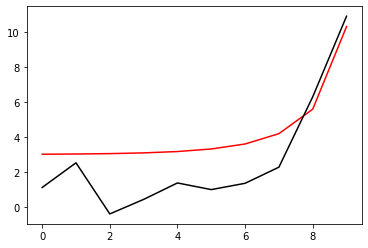

In [153]:
h=tf.zeros(layer)
h_in=[]
#h_in=[3.0205426, 3.022307 , 3.0291433, 3.04402  , 3.0732646, 3.131582 ,
# 3.2585216, 3.5762587, 4.59116  , 9.752249]
for i in range (layer):
#   midd=np.float64(10.0)
#    h_in.append(midd)
#    midd=3*coth(3*((i-layer)*dn)).numpy()
#    h_in.append(midd)
    mu=1/(1-i/10)
    h_inn=np.float64(np.random.normal(mu, 1))
    h_in.append(h_inn)
h=tf.Variable(h_in)
print(h)

h_real=tf.zeros(layer)
middd=[]
for i in range (layer):
    midd=3*coth(3*((i-layer)*dn)).numpy()
    middd.append(midd)
h_real=tf.constant(middd)
print(h_real)
plt.plot(h_real, 'r-')
plt.plot(h.numpy(), 'k-')
plt.show()

In [154]:
m2=tf.constant(np.float64(-1.0))
m2_2=tf.Variable(np.float64(np.random.uniform(-1.5, -0.5)))
print(m2_2)

lam=tf.constant(np.float64(1.0))
lam2=tf.Variable(np.float64(np.random.uniform(0.5, 1.5)))
print(lam2)

<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=-0.7185254522636305>
<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.2512324330450717>


In [119]:
def F_func(m, la, a,b):
    return 2*b/n_fin-m*a-la*(a**3)

def t_func(a):
    return 0.5*(tf.math.tanh(100*(a-0.1))-tf.math.tanh(100*(a+0.1))+2)

In [120]:
def LP2(hh, m, la, phi, pi):
    for j in range (layer-1):
        phi1=phi+dn*pi
        pi1 =phi*m*dn+(1-dn*hh[j])*pi+dn*la*(phi1**3)
        phi=phi1
        pi=pi1
    return phi, pi
def NN_func_p(hh, m, la):
    Positive=[]
    while len(Positive)<data:
        phi1=np.random.uniform(0.0, 1.5, 10000)
        pi1=np.random.uniform(-0.2, 0.2, 10000)
        phi_1, pi_1=LP2(hh, m, la, phi1, pi1)
        for i in range (10000):
            if len(Positive)>=100: break
            if tf.math.abs(F_func(m, la, phi_1[i], pi_1[i]))<0.1: Positive.append([phi1[i], pi1[i]])
            else: continue
    return Positive
def NN_func_n(hh, m, la):
    Negative=[]
    while len(Negative)<data:
        phi1=np.random.uniform(0.0, 1.5, 200)
        pi1=np.random.uniform(-0.2, 0.2, 200)
        phi_1, pi_1 = LP2(hh, m, la, phi1, pi1)
        for i in range (200):
            if len(Negative)>=100: break
            if tf.math.abs(F_func(m, la, phi_1[i], pi_1[i]))>=0.1: Negative.append([phi1[i], pi1[i]])
            else: continue
    return Negative
def NN_func_01(hh, m, la, list1):
    PP=[]
    NN=[]
    for i in range (data):
        phi=list1[i][0]
        pi=list1[i][1]
        if tf.math.abs(LP2(hh, m, la, phi, pi)[1])<0.1: PP.append([phi, pi])
        else: NN.append([phi, pi])
    return PP, NN

In [121]:
for i in range (10):
    Positive[i]=NN_func_p(h_real, m2, lam)
    Negative[i]=NN_func_n(h_real, m2, lam)

In [155]:
for i in range (10):
    [Positive0[i], Positive1[i]]=NN_func_01(h, m2_2, lam2, Positive[i])
    [Negative0[i], Negative1[i]]=NN_func_01(h, m2_2, lam2, Negative[i])

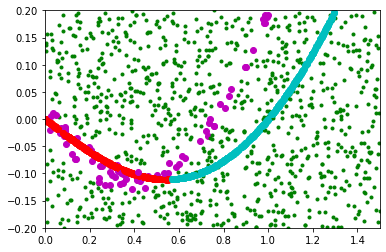

In [156]:
x_data1=[]
y_data1=[]
x_data2=[]
y_data2=[]
x_data3=[]
y_data3=[]
x_data4=[]
y_data4=[]
for i in range (10):
    x_data1.insert(i, [v[0] for v in Positive0[i]])
    y_data1.insert(i, [v[1] for v in Positive0[i]])
    x_data2.insert(i, [v[0] for v in Positive1[i]])
    y_data2.insert(i, [v[1] for v in Positive1[i]])
    x_data3.insert(i, [v[0] for v in Negative0[i]])
    y_data3.insert(i, [v[1] for v in Negative0[i]])
    x_data4.insert(i, [v[0] for v in Negative1[i]])
    y_data4.insert(i, [v[1] for v in Negative1[i]])
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'co')
    plt.plot(x_data1[i], y_data1[i], 'ro')
    plt.plot(x_data3[i], y_data3[i], 'mo')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.show()

# Error function

$E=\sum_{data} \left\vert y(\bar{x}^{(1)}) - \bar{y} \right\vert+E_{reg}(W)$
, $E_{reg}=c_{reg}^{(1)}\sum_{n=1}^{N-1}(\eta^{(n)})^{4}(h(\eta^{(n+1)})-h(\eta^{(n)}))^{2}+c_{reg}^{(2)}(h(\eta^{(N)})-1/\eta^{(N)})^{2}$

In [124]:
def Error_func(hh, m, la, list1, list2):
    phi0=np.array([v[0] for v in list1])
    pi0=np.array([v[1] for v in list1])
    phi1=np.array([v[0] for v in list2])
    pi1=np.array([v[1] for v in list2])
    phi_0, pi_0=LP2(hh, m, la, phi0, pi0)
    phi_1, pi_1=LP2(hh, m, la, phi1, pi1)
    PPlist=t_func(pi_0)
    NNlist=t_func(pi_1)
    sum_p=sum(PPlist)
    sum_n=data-sum(NNlist)

    inside=0
    for k in range (layer-1):
        second=((n_ini+k*dn)**4)*((hh[k+1]-hh[k])**2)
        inside=inside+second
    E_reg1=c_reg1*inside
    E_reg2=c_reg2*((hh[layer-1]-1/n_fin)**2)
    return E_reg1+E_reg2+sum_p+sum_n

In [125]:
for i in range (10):
    print(Error_func(h_real, m2, lam, Positive[i], Negative[i]))
for i in range (10):
    print(Error_func(h, m2_2, lam2, Positive[i], Negative[i]))

tf.Tensor(5.009337288588924, shape=(), dtype=float64)
tf.Tensor(2.472379757106024, shape=(), dtype=float64)
tf.Tensor(2.484154243145666, shape=(), dtype=float64)
tf.Tensor(1.3245676114474692, shape=(), dtype=float64)
tf.Tensor(2.0094634372917692, shape=(), dtype=float64)
tf.Tensor(2.99925963507927, shape=(), dtype=float64)
tf.Tensor(1.996923466438987, shape=(), dtype=float64)
tf.Tensor(2.00264941360914, shape=(), dtype=float64)
tf.Tensor(1.0155828856820495, shape=(), dtype=float64)
tf.Tensor(4.99597613298352, shape=(), dtype=float64)
tf.Tensor(94.41952747819447, shape=(), dtype=float64)
tf.Tensor(98.8668886884097, shape=(), dtype=float64)
tf.Tensor(91.59336528024605, shape=(), dtype=float64)
tf.Tensor(94.51087135131341, shape=(), dtype=float64)
tf.Tensor(104.22537036742511, shape=(), dtype=float64)
tf.Tensor(94.99545502492816, shape=(), dtype=float64)
tf.Tensor(96.52652990251939, shape=(), dtype=float64)
tf.Tensor(99.4920689788054, shape=(), dtype=float64)
tf.Tensor(102.13891036776126,

In [126]:
def run(i):
    with tf.GradientTape() as g:
        loss=Error_func(h, m2_2, lam2, Positive[i], Negative[i])
        gradients=g.gradient(loss, [h, m2_2, lam2])
    optimizer.apply_gradients(zip(gradients, [h, m2_2, lam2]))

201 60.61016138769777 -0.7305299375713844 1.2085024162447877
[ 1.1612446   2.50660959 -0.32010298  0.47806883  1.41134645  1.03721048
  1.37961114  2.27386591  6.25413806 10.68726403]


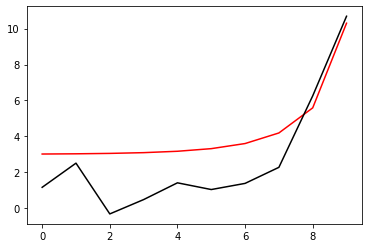

402 51.64197853286991 -0.730628837457744 1.2085013296082676
[ 1.16458609  2.44948133 -0.28049226  0.49043659  1.42367088  1.06325082
  1.40406183  2.29588059  6.26713468 10.51800051]


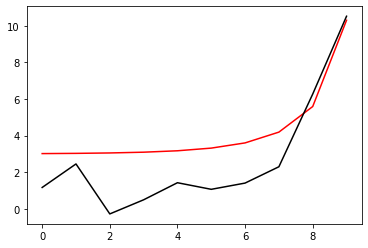

603 49.5785976333823 -0.7310014110234825 1.2085541734567677
[ 1.16697555  2.39330187 -0.2402783   0.50331685  1.43625672  1.08988237
  1.42898068  2.31833468  6.28060184 10.37238917]


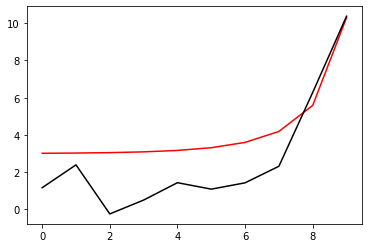

804 54.38226385800435 -0.7314515879993106 1.2086940762817455
[ 1.16866229  2.3390063  -0.19988174  0.51715169  1.44965206  1.11757818
  1.45496141  2.34180459  6.29498871 10.25099815]


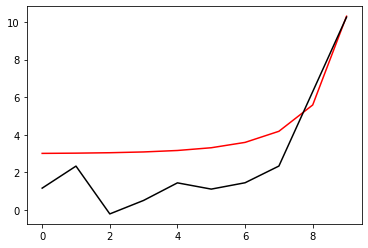

1005 54.87109778190789 -0.7321520126955514 1.2087491178786083
[ 1.1699302   2.28754246 -0.15929933  0.53255513  1.46467525  1.14720816
  1.48311969  2.36762707  6.31185268 10.1537439 ]


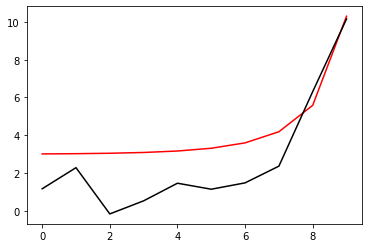

1206 48.163209317719954 -0.7329387304040983 1.2092215676186135
[ 1.17027761  2.23896774 -0.11925643  0.54923219  1.4811887   1.17860658
  1.5134198   2.39586778  6.3314001  10.0795588 ]


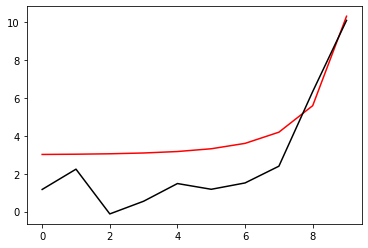

1407 56.84470879816007 -0.7337486394308907 1.2098847740097
[ 1.16846234  2.19183287 -0.08159409  0.56503132  1.49657179  1.2084482
  1.54166694  2.42124664  6.34727047 10.02618542]


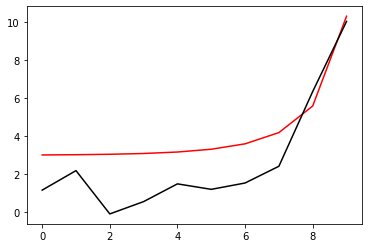

1608 53.25661508629658 -0.7343409437161424 1.2102567589177151
[ 1.16430922  2.14541033 -0.04696485  0.57880582  1.50915295  1.23438472
  1.56461488  2.43942966  6.35403019  9.99026138]


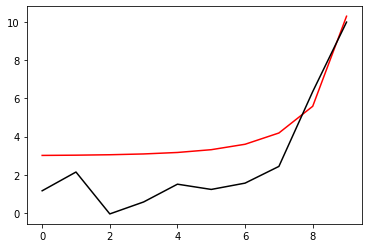

1809 57.57346952506583 -0.7346091732707924 1.2101908488240267
[ 1.15856478  2.10004061 -0.0147777   0.59099833  1.51935428  1.25683928
  1.58272602  2.45095267  6.35230245  9.96779317]


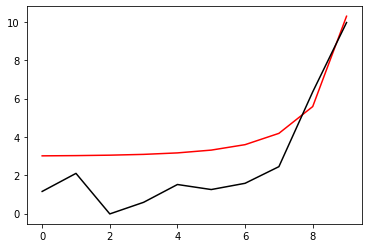

2010 53.89590551389232 -0.7345420061175658 1.2098303859780621
[1.15184459 2.05604472 0.01560082 0.60224658 1.52801013 1.2769326
 1.59754511 2.45790106 6.34472781 9.9548024 ]


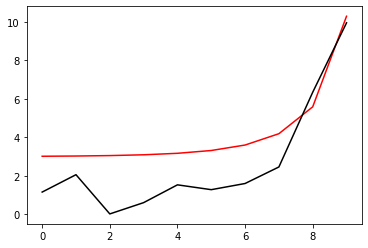

2211 59.49155827800374 -0.7343321584478251 1.2091753806068692
[1.14450798 2.01354304 0.04459164 0.61297682 1.53572203 1.29551591
 1.61028514 2.46194959 6.33345469 9.94787309]


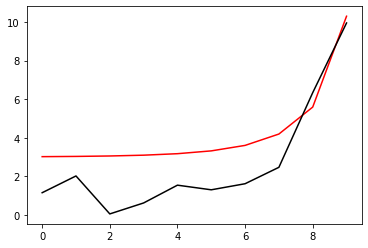

2412 50.58231406690559 -0.7338808937874405 1.2084026674464134
[1.13682112 1.97261714 0.0725501  0.62354434 1.54297515 1.31324912
 1.62185189 2.46431176 6.31999991 9.94444361]


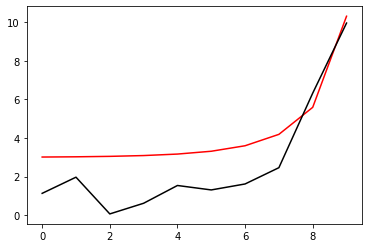

2613 48.62679636656578 -0.7335422888689723 1.2074224067954036
[1.12872485 1.93302983 0.09945419 0.63389314 1.5497968  1.33028695
 1.63258957 2.46559225 6.3052475  9.94282629]


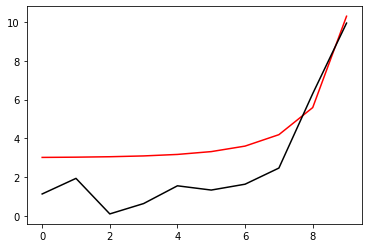

2814 53.61206267666935 -0.7330506385150912 1.2066150083582723
[1.12020096 1.89464696 0.1253798  0.64409041 1.55633034 1.34686939
 1.64286899 2.46632992 6.28990196 9.94204351]


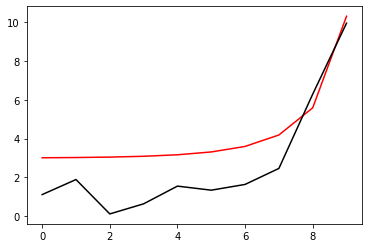

3015 54.53746217304066 -0.7325092614795182 1.2057831428072079
[1.1114655  1.85754792 0.15054089 0.65429108 1.56272591 1.36314036
 1.65283192 2.46667556 6.27412736 9.94159933]


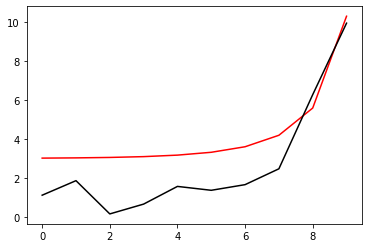

3216 47.858152359841206 -0.7319949113517067 1.2050484608445537
[1.10231112 1.82143837 0.17479454 0.66432931 1.56885493 1.37901923
 1.66246126 2.4667044  6.25810279 9.94127516]


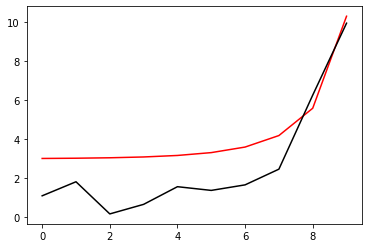

3417 56.71391144114965 -0.7315985859721899 1.204200691903434
[1.09292983 1.78640165 0.19831902 0.67432997 1.57482688 1.3945938
 1.67181723 2.46644913 6.24183402 9.94098832]


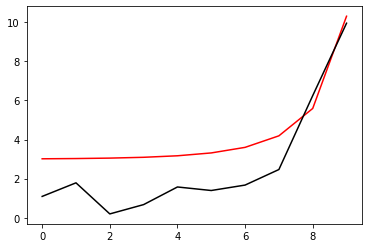

3618 53.05861653016091 -0.7312905787850628 1.2032752994334193
[1.08335115 1.75239057 0.22117059 0.68432195 1.58068476 1.40992297
 1.68097905 2.46601977 6.22546247 9.94071249]


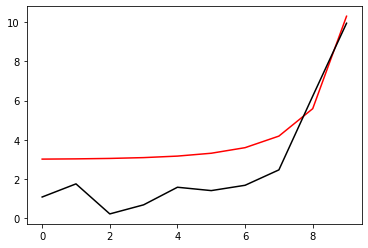

3819 57.3843353806606 -0.7310121570210727 1.2023107502547257
[1.0736073  1.71936869 0.24340264 0.69432909 1.58645574 1.42503387
 1.68997039 2.46543994 6.20901343 9.9404408 ]


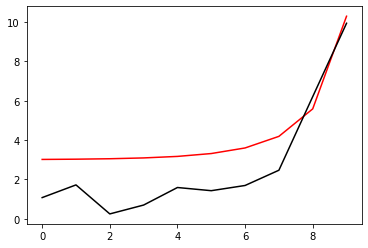

4020 53.65356951628261 -0.7306157044045626 1.2014055050894952
[1.06381584 1.68739962 0.26516647 0.70449109 1.59230334 1.44011585
 1.6990121  2.46496658 6.1927693  9.94017184]


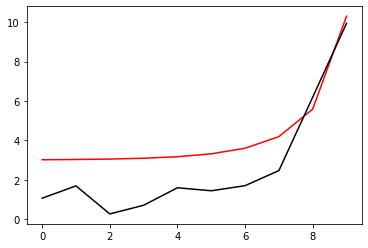

4221 59.237087118737264 -0.7301868478902533 1.2004637452835178
[1.05399382 1.65644278 0.28649083 0.71480775 1.59822424 1.45515762
 1.70807864 2.46456124 6.17668314 9.93990542]


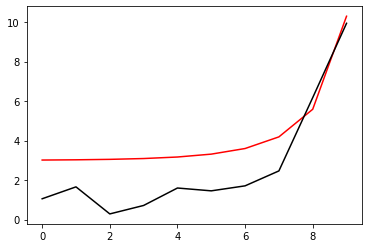

4422 50.21611298315737 -0.7296063743580277 1.1995335476525884
[1.04420592 1.62652022 0.30746791 0.7253527  1.60429424 1.47022826
 1.71722138 2.46424811 6.16074477 9.93964149]


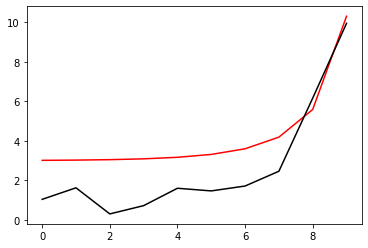

4623 48.393895617082045 -0.7291570901852457 1.1984989149453082
[1.03427587 1.59739272 0.32790844 0.73590534 1.61029523 1.4851226
 1.7262585  2.46389235 6.14488399 9.93938001]


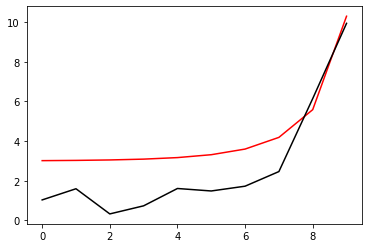

4824 53.22320712974094 -0.7285795465873665 1.1977124842053628
[1.02410717 1.56893952 0.34776594 0.74642064 1.61621013 1.499854
 1.73523712 2.46358023 6.12922128 9.93912093]


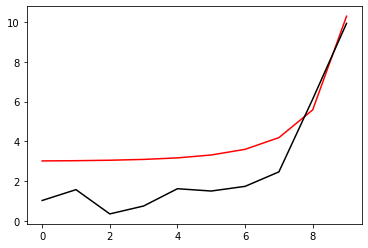

5025 54.38314001884949 -0.7279630328042844 1.196930706490279
[1.01387444 1.54127816 0.36718387 0.7569999  1.62210926 1.51444916
 1.74412573 2.46321202 6.11359226 9.93886418]


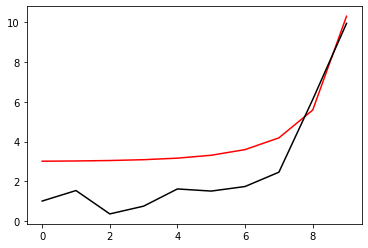

5226 47.49047780368309 -0.7274662965795441 1.1961749654395035
[1.00336181 1.51416796 0.38598236 0.7674596  1.62783068 1.52877305
 1.75282271 2.46273365 6.09799761 9.93860972]


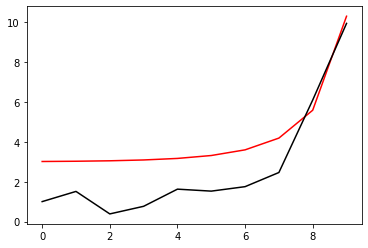

5427 56.54437619074387 -0.7271008164243287 1.1952951691684068
[0.99271663 1.48770566 0.40427995 0.77788422 1.63343701 1.54285681
 1.76131706 2.46208329 6.08232435 9.93835747]


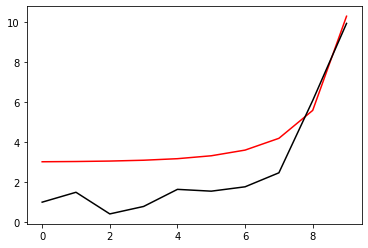

5628 52.90434368402642 -0.7268380627530688 1.1943252643353293
[0.98195188 1.46187493 0.42210076 0.78828847 1.63895336 1.55673571
 1.76965637 2.46132364 6.06664755 9.93810736]


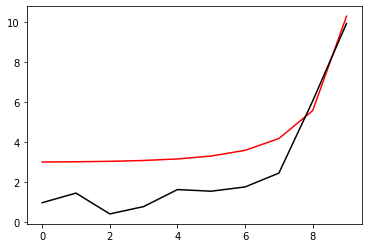

5829 57.25521776167614 -0.7266006011201822 1.1933154653818285
[0.97110551 1.43668678 0.43949152 0.79870657 1.64441589 1.57044225
 1.77786545 2.46046892 6.05096915 9.93785932]


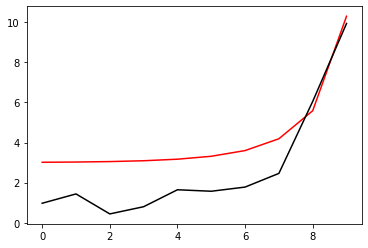

6030 53.5396531525154 -0.7262370961969297 1.192384838625381
[0.96029028 1.41223689 0.45658941 0.80927968 1.64999054 1.58416737
 1.78616542 2.45976878 6.03555304 9.93761327]


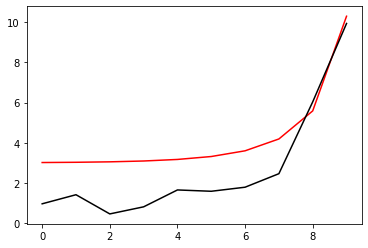

6231 59.11035820164458 -0.7257880739004815 1.1914847969376219
[0.94950955 1.38850323 0.4734009  0.81999882 1.65566473 1.59788766
 1.79451658 2.45916534 6.02032701 9.93736913]


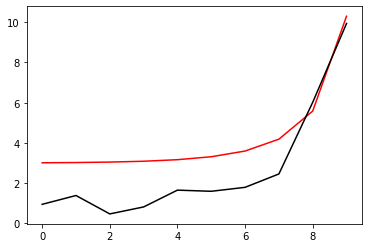

6432 49.969711442913386 -0.7252124175147179 1.1905908009154218
[0.93882577 1.36553185 0.49000364 0.83093265 1.66150742 1.61166114
 1.80295613 2.45866354 6.00525686 9.93712682]


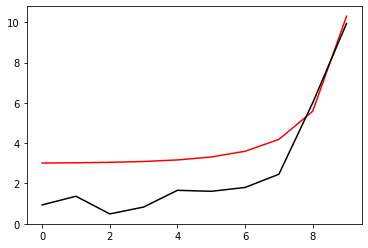

6633 48.260311982279035 -0.7247190966176396 1.1896443040158287
[0.92806066 1.343109   0.50620413 0.84187164 1.66731531 1.62529877
 1.81132147 2.45814651 5.99028476 9.93688626]


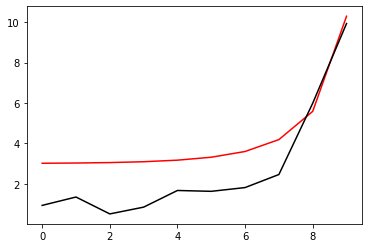

6834 52.96062000134374 -0.7241109909111703 1.1889710533307973
[0.91710384 1.32112183 0.52193428 0.85275845 1.67305924 1.63879971
 1.81964448 2.45768114 5.97550638 9.93664738]


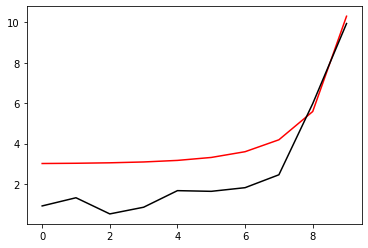

7035 54.29868788078425 -0.7234748241049395 1.1882987763122186
[0.90614026 1.29971799 0.53734087 0.86370487 1.67881999 1.65219777
 1.82789893 2.45717018 5.960757   9.9364101 ]


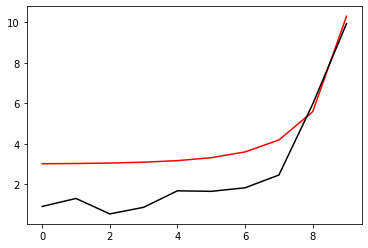

7236 47.20803068872425 -0.7230379711262076 1.1875353423992168
[0.8949677  1.27868673 0.55224917 0.87454026 1.68444885 1.66536894
 1.83599348 2.45656573 5.94603641 9.93617437]


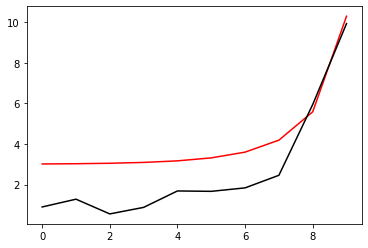

7437 56.42756030062109 -0.722726272036857 1.1866472965833703
[0.88370234 1.25811176 0.56674592 0.88532463 1.68998646 1.67832241
 1.84389759 2.45578979 5.93122017 9.93594011]


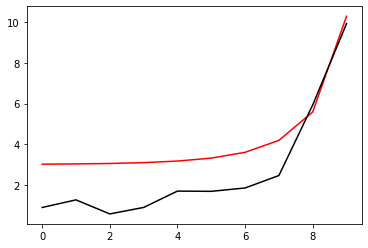

7638 52.79886608579997 -0.7225180407338835 1.1856695464362357
[0.87235013 1.23798362 0.58084343 0.89606657 1.69545301 1.69108725
 1.85165262 2.45489713 5.91637301 9.93570724]


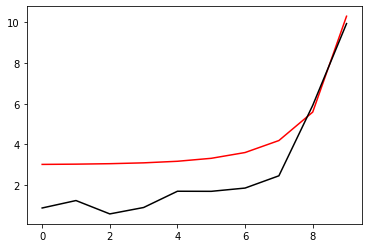

7839 57.17991283880778 -0.7223176337247037 1.1846696863660884
[0.86097112 1.2183483  0.59460668 0.90682358 1.70090948 1.70371929
 1.85930629 2.45392264 5.90151385 9.93547567]


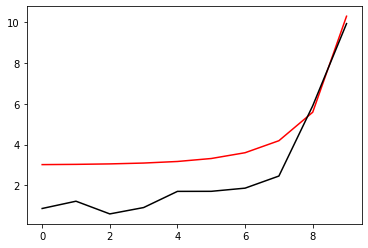

8040 53.47287660330758 -0.7219937239127089 1.1837660126041998
[0.84967463 1.19930903 0.60816629 0.91773462 1.70652181 1.71640941
 1.86707971 2.45311384 5.88690164 9.93524529]


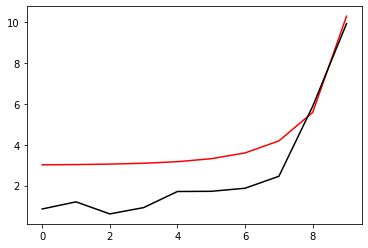

8241 59.04725156499845 -0.7215492170694433 1.182956798275219
[0.83845233 1.18084155 0.62151329 0.92877793 1.71226473 1.72911924
 1.87491763 2.45239724 5.87244948 9.93501601]


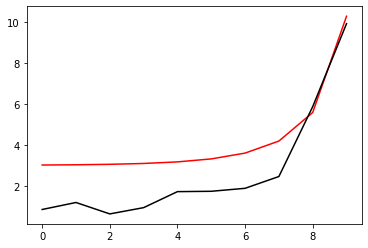

8442 49.78929453714319 -0.721017307583141 1.1821395284166296
[0.82736447 1.16299519 0.63471454 0.94001119 1.71819456 1.741891
 1.88284016 2.45176109 5.85810899 9.93478777]


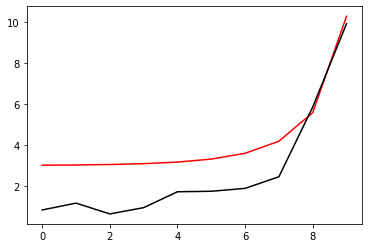

8643 48.1848635304737 -0.7205221803202875 1.1813228314841142
[0.81623616 1.1455692  0.64758163 0.95123599 1.72412356 1.75455402
 1.89070746 2.45111346 5.84384543 9.93456051]


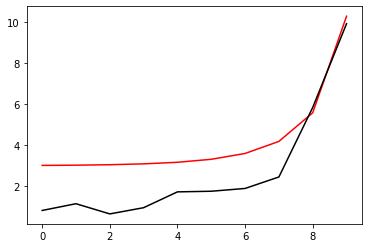

8844 52.77412774250285 -0.71993148269343 1.1807565787586314
[0.80494521 1.12844405 0.6600301  0.96237961 1.73000733 1.76709142
 1.89853533 2.45050473 5.82973748 9.93433418]


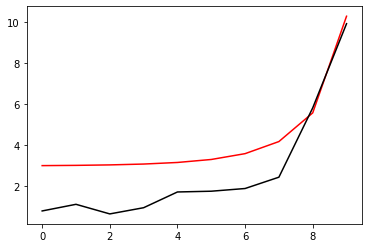

9045 54.25445760128152 -0.7193224499857294 1.180181433334419
[0.7936917  1.11178624 0.6722164  0.97356242 1.73593413 1.7795418
 1.90630144 2.44984256 5.81562742 9.9341088 ]


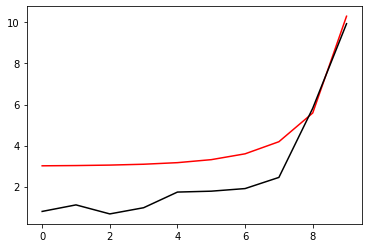

9246 46.96963426549965 -0.7189508348759643 1.1794348611969827
[0.78228307 1.09539754 0.68397022 0.98461883 1.74176083 1.7917869
 1.91392155 2.44908655 5.80152085 9.93388434]


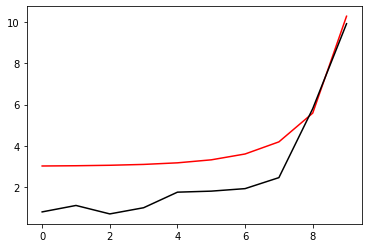

9447 56.34245874248079 -0.7186893993407081 1.1785818488678548
[0.77081151 1.07934279 0.69535525 0.99558653 1.7475068  1.80381559
 1.92134768 2.44814696 5.7872888  9.93366082]


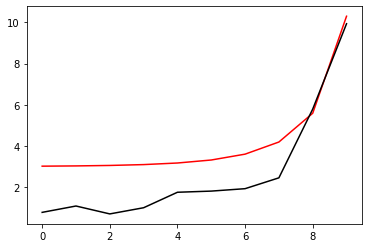

9648 52.72214542009826 -0.7185260635375381 1.1776500917178292
[0.75927714 1.06360941 0.70637578 1.00646598 1.75318464 1.81564995
 1.92861542 2.44707437 5.77299312 9.9334382 ]


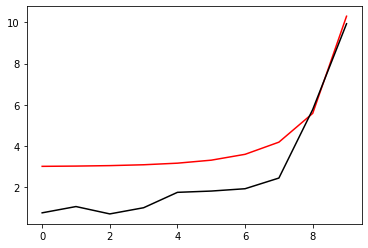

9849 57.13885614340443 -0.7183531134917164 1.1767132978006534
[0.74777031 1.0482766  0.71712589 1.01734356 1.75888457 1.82737495
 1.93580155 2.44593209 5.75867939 9.93321643]


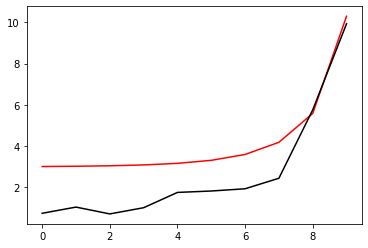

In [158]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, lam2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 59.01225779450063 -0.7178407549292544 1.1756715686051102
[0.7309681  1.02648029 0.7331     1.03410355 1.76804236 1.84564674
 1.94763456 2.44571284 5.73906115 9.93291438]


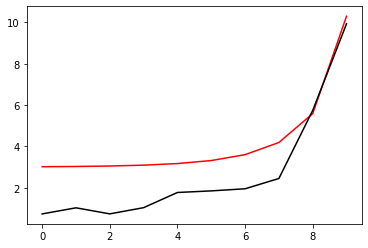

402 49.65937619756634 -0.7174724376853513 1.1750876511463746
[0.72236811 1.01573044 0.74112831 1.04275179 1.77277446 1.85474183
 1.9531841  2.44481742 5.72826381 9.93271915]


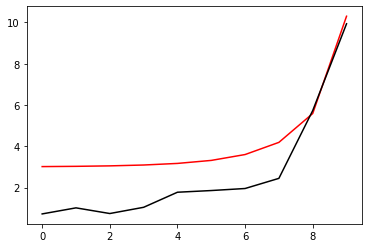

603 48.14744214455287 -0.7171107693229442 1.174526381012014
[0.71377698 1.00517671 0.74899262 1.05138063 1.77752896 1.86378583
 1.95873279 2.44397587 5.71759895 9.932559  ]


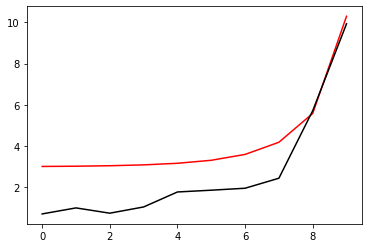

804 52.656133914216625 -0.7166871731692986 1.174126160492169
[0.70509784 0.99472958 0.75660122 1.05990938 1.7822467  1.87274338
 1.96427076 2.44319882 5.70708466 9.93237536]


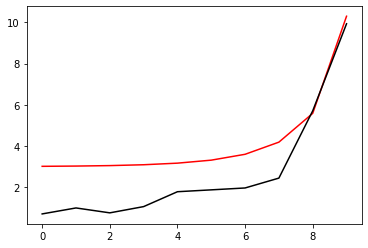

1005 54.240185252674465 -0.716250855504077 1.1737192205236189
[0.69648919 0.98452617 0.76407577 1.06843221 1.7869933  1.88164232
 1.96977727 2.44241059 5.69659363 9.93224745]


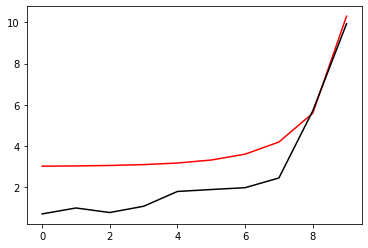

1206 46.76746737596691 -0.7159904265657722 1.1731761025477938
[0.68780015 0.97441626 0.77128147 1.07682054 1.79165579 1.89039156
 1.97518789 2.44157935 5.68612652 9.93206207]


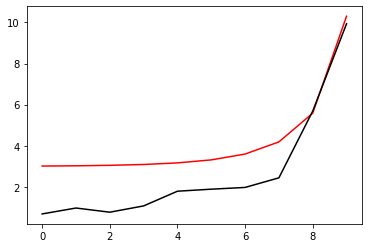

1407 56.281852001445856 -0.7158039964526703 1.1725628805187327
[0.67909347 0.96444674 0.77826232 1.08509975 1.79624181 1.89897617
 1.98045815 2.44062864 5.67557819 9.93191582]


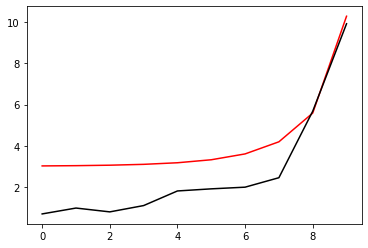

1608 52.673311268108236 -0.7156898343494994 1.1718929285154913
[0.67036212 0.9546057  0.78501724 1.09326809 1.80075625 1.90741022
 1.98561158 2.43959215 5.66499021 9.93172173]


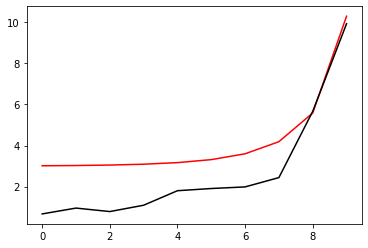

1809 57.12194205983004 -0.7155615285290365 1.1712221088322459
[0.66169236 0.94497608 0.79163935 1.10141508 1.80528853 1.91578002
 1.99072571 2.43853397 5.65441043 9.93158436]


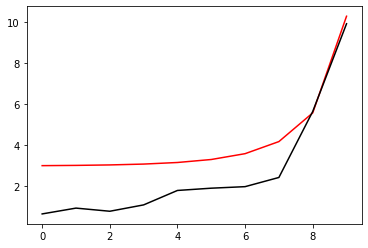

2010 53.39282697217487 -0.7153491839977011 1.1706188345394584
[0.6531514  0.93562751 0.79821644 1.10963778 1.80995467 1.92422363
 1.99596055 2.43763227 5.64402523 9.93139657]


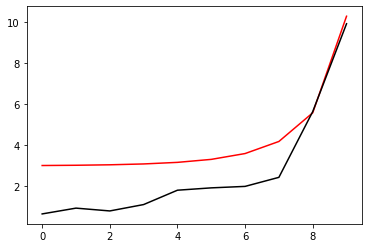

2211 59.004906179830854 -0.7150336952107328 1.1701090162705807
[0.64471597 0.92653064 0.80472507 1.11790373 1.81471469 1.93269074
 2.00125198 2.43681071 5.63375165 9.93125932]


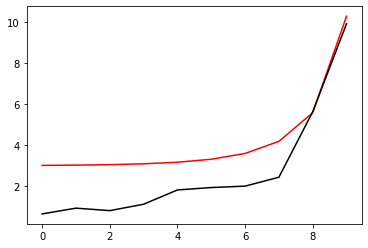

2412 49.57088529473737 -0.7146942561800925 1.1695703702965867
[0.63641579 0.91771066 0.81119735 1.12623777 1.81958742 1.94119014
 2.00659268 2.43604231 5.6235425  9.93105935]


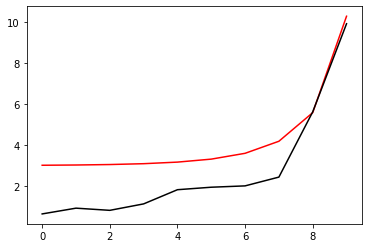

2613 48.13245414752131 -0.714346310919076 1.169062327763864
[0.62813477 0.90904132 0.81751357 1.13451877 1.8244606  1.94962688
 2.01191281 2.43529178 5.61340002 9.93092581]


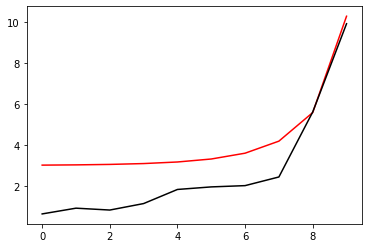

2814 52.57397164665028 -0.7139387091379467 1.1687011280990252
[0.61976794 0.90042519 0.8235973  1.1426812  1.82928667 1.95797511
 2.01720995 2.43458122 5.60336695 9.93075377]


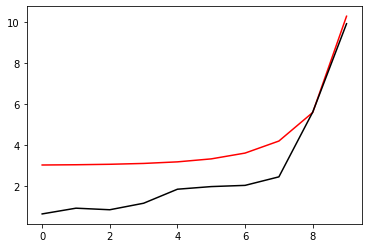

3015 54.2312742310409 -0.7135195375263498 1.1683294410631921
[0.61147556 0.89200251 0.82957722 1.15082703 1.83413833 1.96626966
 2.02247179 2.43384745 5.59333456 9.93061988]


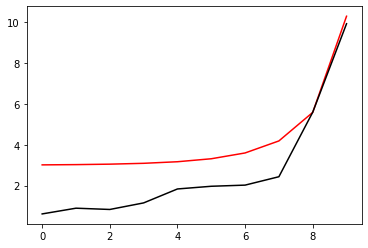

3216 46.62470805209356 -0.7132797234319035 1.1678100336538144
[0.60310909 0.88362624 0.83532196 1.15883203 1.83890674 1.97442344
 2.02763823 2.43306343 5.58330929 9.93042467]


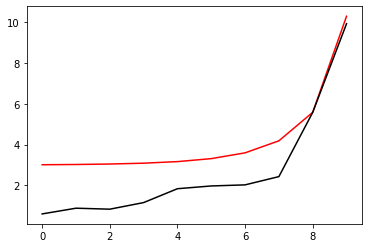

3417 56.23900610344894 -0.7131100323630586 1.167224656051929
[0.59472353 0.87533806 0.84086934 1.1667171  1.84359576 1.98241859
 2.03266423 2.43215547 5.57319212 9.93030718]


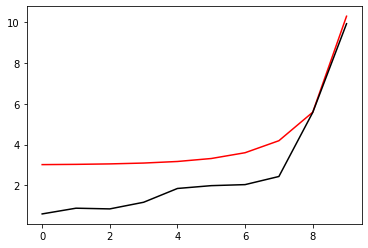

3618 52.63339668991186 -0.7130116798042628 1.1665839651954766
[0.58630904 0.8671247  0.84621485 1.17447807 1.84820792 1.9902668
 2.03757154 2.43115632 5.56302475 9.93011318]


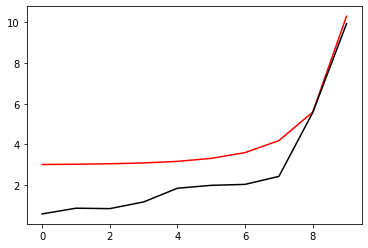

3819 57.10993342263107 -0.7128931868823327 1.1659447997775623
[0.57796886 0.85908762 0.85146758 1.1822211  1.85284898 1.99806988
 2.0424527  2.43014434 5.55286828 9.92997375]


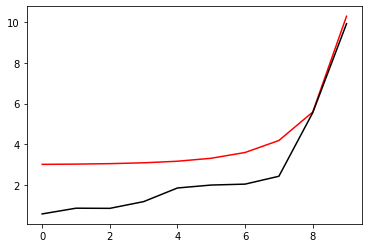

4020 53.37114405264316 -0.7126913345421996 1.1653716245719203
[0.56976337 0.85129109 0.85670793 1.19003694 1.85762876 2.00595972
 2.04746188 2.42929258 5.54290542 9.92980311]


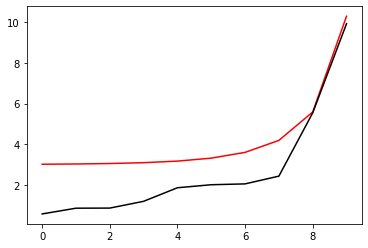

4221 59.00546349688249 -0.7123823858849944 1.164896439891032
[0.56166438 0.84370185 0.86190599 1.19788682 1.86249998 2.01387807
 2.05252707 2.42851722 5.53304615 9.92966075]


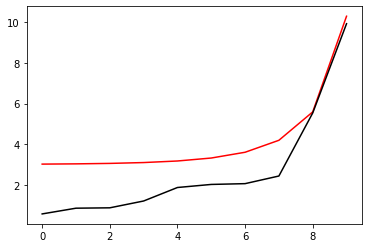

4422 49.4938245882401 -0.7120646273494771 1.1643825146662485
[0.55369491 0.83633883 0.86708486 1.20578685 1.86747242 2.02182512
 2.05763408 2.42778717 5.52324217 9.92949244]


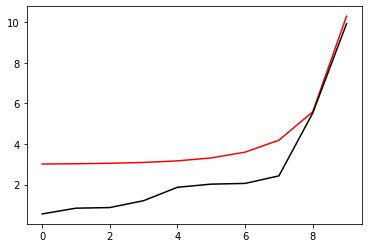

4623 48.127629651152006 -0.711727669509448 1.1639072829292274
[0.54575029 0.82908943 0.8721375  1.21363033 1.87244879 2.029721
 2.06272743 2.42707906 5.51350412 9.92935433]


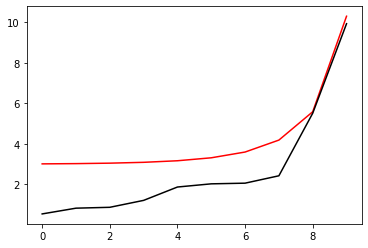

4824 52.50831606496394 -0.7113329759241644 1.163568483484332
[0.5377226  0.82185421 0.87698336 1.22134809 1.87737728 2.03753529
 2.06779967 2.42640939 5.50386878 9.92918604]


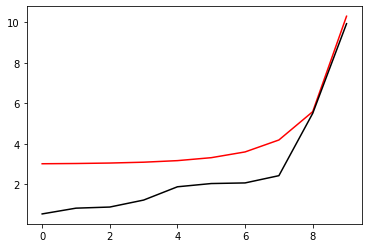

5025 54.22767201081931 -0.710927430075252 1.1632181493497717
[0.52977325 0.81477541 0.88175094 1.22904216 1.88233005 2.04530226
 2.07283888 2.42571695 5.49423063 9.92905242]


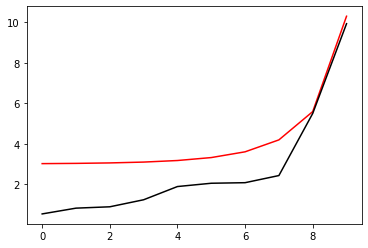

5226 46.49713838008639 -0.7106995930769644 1.1627180056327286
[0.52175348 0.80770651 0.88630753 1.23658766 1.88719733 2.05293391
 2.07778377 2.42497259 5.4845928  9.92888248]


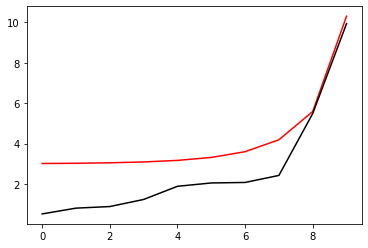

5427 56.200515611190546 -0.7105392354131291 1.1621547941285164
[0.51371382 0.80068661 0.89068745 1.2440032  1.89198091 2.06041124
 2.08258957 2.42410459 5.47485965 9.92874731]


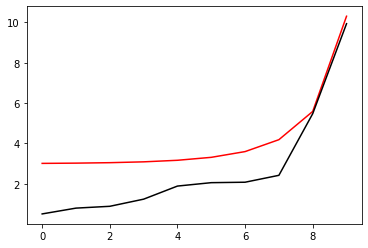

5628 52.59665097049015 -0.7104499780268512 1.1615367739628584
[0.50564159 0.79370073 0.89488314 1.25128233 1.89668077 2.06774351
 2.08727563 2.4231432  5.46507038 9.92857634]


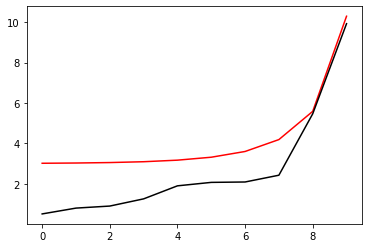

5829 57.10175505180995 -0.710336615271817 1.160920727746259
[0.49765567 0.78686704 0.89901892 1.2585468  1.90141731 2.07504636
 2.09194705 2.42217798 5.45529587 9.92843549]


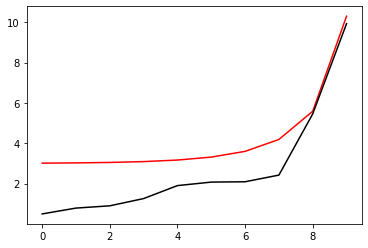

6030 53.35422780069336 -0.7101405045168558 1.160369279070218
[0.48980857 0.78024311 0.90316757 1.26588066 1.90629331 2.08244484
 2.09675115 2.42137529 5.44571325 9.92827329]


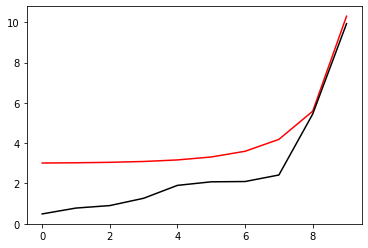

6231 59.01320163889888 -0.7098352531657265 1.1599176303591896
[0.48206777 0.77379208 0.90729389 1.27323994 1.91125515 2.08987382
 2.10160865 2.42064393 5.43622494 9.92813451]


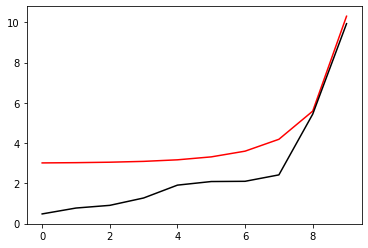

6432 49.42428228364007 -0.7095351625739249 1.1594174198159521
[0.47444872 0.76752586 0.91141259 1.28063293 1.91630462 2.09732652
 2.10650013 2.41995004 5.42678253 9.92797514]


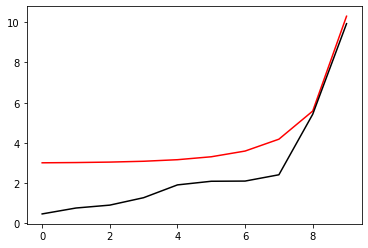

6633 48.13070219124143 -0.7092072472182063 1.1589615298288305
[0.46685874 0.76134565 0.91542985 1.28796748 1.92135873 2.10473692
 2.11138223 2.41927913 5.4174017  9.92784134]


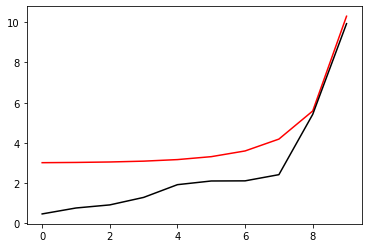

6834 52.455710645098044 -0.7088217174123467 1.158635003636289
[0.45918742 0.7551504  0.91926226 1.29517213 1.92636275 2.11207129
 2.11624348 2.41864272 5.40811363 9.92767232]


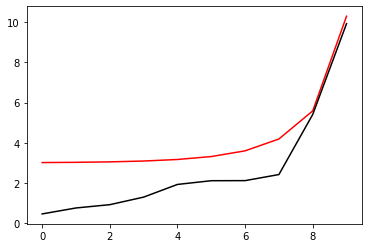

7035 54.22760692997646 -0.7084255686785855 1.158296185089895
[0.45159493 0.74908182 0.92303655 1.30234741 1.93138658 2.11936192
 2.12107077 2.41797985 5.39881431 9.92756163]


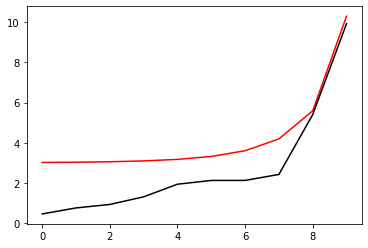

7236 46.38052261409624 -0.7082032409239367 1.1578093440451225
[0.44393024 0.74299188 0.92661729 1.30936653 1.93631819 2.12651847
 2.12579995 2.41725735 5.38950166 9.92737113]


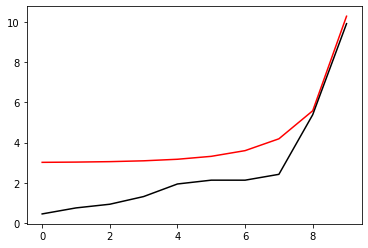

7437 56.1624963303803 -0.708046715144085 1.1572606626786226
[0.4362419  0.73691936 0.93003803 1.31624841 1.94115966 2.13352291
 2.13038806 2.41640632 5.38008361 9.92726526]


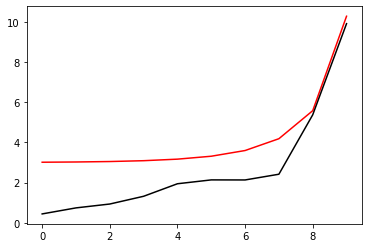

7638 52.55907369504967 -0.7079615663988504 1.15665650920297
[0.42851435 0.7308474  0.93328846 1.32298464 1.94590855 2.140382
 2.1348516  2.4154537  5.37059593 9.92708394]


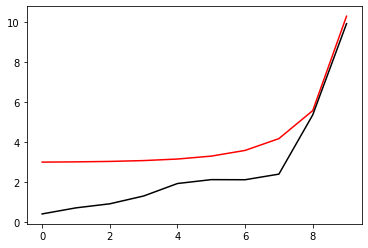

7839 57.095645773594384 -0.7078494263025671 1.1560532434952753
[0.42088055 0.72490909 0.93650666 1.32971094 1.95069797 2.147223
 2.13930581 2.41449762 5.36111668 9.92695158]


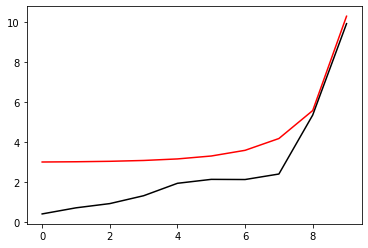

8040 53.344591894057494 -0.707654780514284 1.1555134653932437
[0.41338348 0.71915353 0.9397563  1.33650311 1.95562204 2.15416229
 2.14388909 2.41369575 5.35181548 9.92679634]


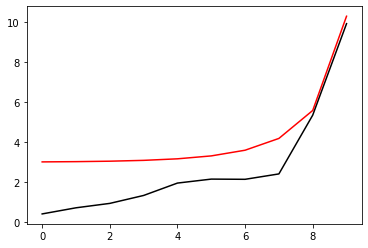

8241 59.0291609086182 -0.7073501102693606 1.1550730876902937
[0.40598787 0.7135417  0.94299855 1.34331359 1.96062228 2.16112906
 2.14851577 2.41294971 5.34258683 9.92666678]


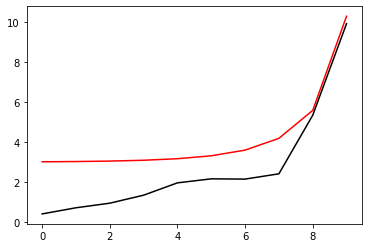

8442 49.35960631251963 -0.7070635358325961 1.1545736388168442
[0.39870133 0.70807847 0.94624022 1.35014371 1.96569375 2.16811091
 2.15316247 2.41222382 5.33338275 9.92648664]


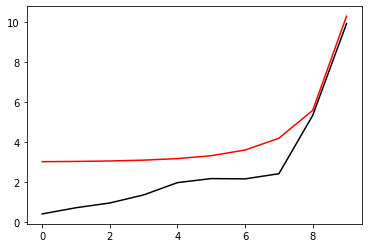

8643 48.1414287595643 -0.7067416303254924 1.154121903761055
[0.39144377 0.70267908 0.94940082 1.35691534 1.97076664 2.17505354
 2.15779488 2.41150875 5.32421998 9.9263861 ]


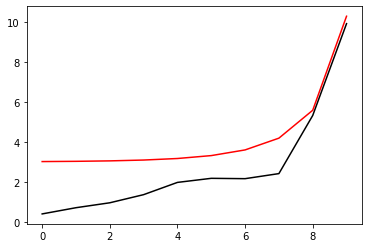

8844 52.414991000982916 -0.7063596892462192 1.153795319005749
[0.38410235 0.69724097 0.95239443 1.36355515 1.9757837  2.1819201
 2.1623974  2.41081063 5.31512349 9.92621199]


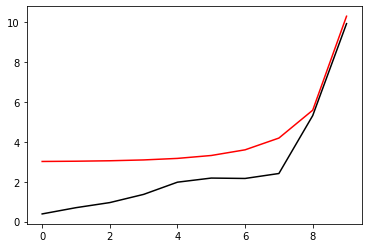

9045 54.23025511631205 -0.7059668818902758 1.1534548498842776
[0.3768332  0.69190246 0.95534331 1.37015939 1.98080979 2.18873772
 2.16695226 2.41006482 5.30598646 9.92608161]


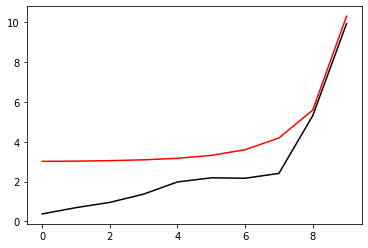

9246 46.266807276222224 -0.7057426451351925 1.1529694563329078
[0.3694804  0.68651154 0.95810707 1.37659701 1.98572815 2.19541079
 2.17138896 2.40923021 5.29679751 9.92592497]


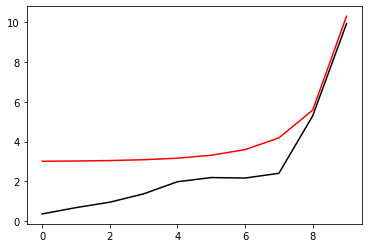

9447 56.11744051513542 -0.7055829056636383 1.1524211142463927
[0.36209241 0.68110832 0.96072007 1.38288843 1.99054197 2.20192208
 2.17566515 2.40823828 5.28746467 9.92581111]


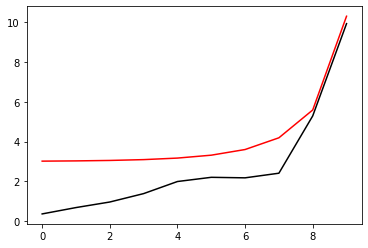

9648 52.51218910032806 -0.7054949199025276 1.1518143551973226
[0.35464968 0.67567301 0.96316821 1.38902193 1.99524469 2.2082733
 2.17979099 2.4071082  5.27801501 9.92562126]


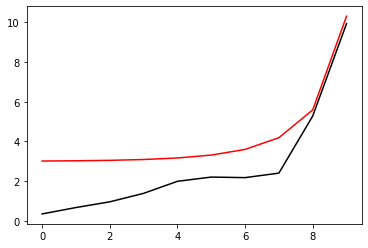

9849 57.09121696314711 -0.7053771472788087 1.151204708519377
[0.34729696 0.67035136 0.9656011  1.39514453 1.99997895 2.21459905
 2.18388642 2.4059401  5.26852632 9.92549265]


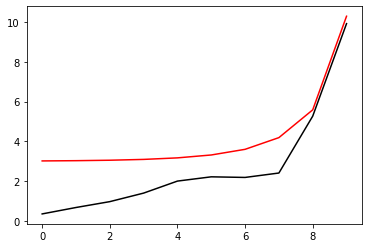

In [159]:
optimizer=tf.optimizers.Adam(learning_rate=0.00075)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, lam2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 59.045953271448134 -0.7050078807306257 1.15060596191014
[0.33738723 0.66330548 0.96928922 1.40417731 2.00738095 2.2245574
 2.19122462 2.40639507 5.25755927 9.92531655]


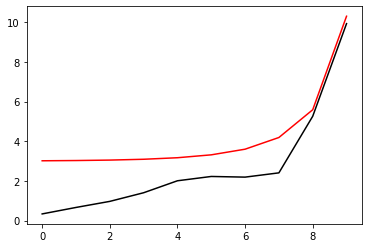

402 49.30632455248935 -0.7048139153142277 1.15024031112995
[0.33263788 0.65992944 0.97084005 1.40816689 2.01049264 2.22861092
 2.19376214 2.40542134 5.25108637 9.9252042 ]


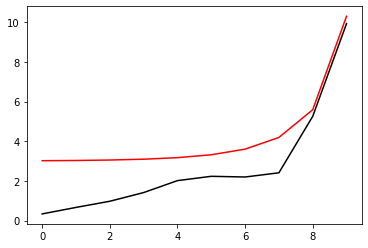

603 48.15818584706942 -0.7045906538938764 1.1499034839853322
[0.32792231 0.65659933 0.97238646 1.41215285 2.01362301 2.23266094
 2.19629807 2.40444977 5.24462677 9.92511454]


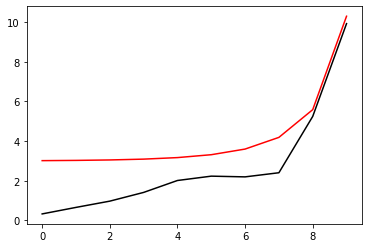

804 52.395168847570986 -0.7043248455270118 1.1496503450739959
[0.32314318 0.65322527 0.97384946 1.41606811 2.01671828 2.2366718
 2.19881498 2.40347947 5.23819061 9.92500906]


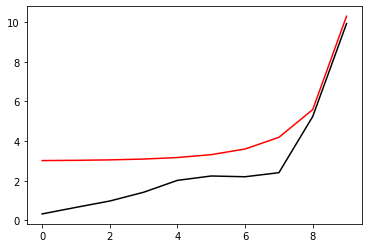

1005 54.23825087011549 -0.7040514240983355 1.1493875007393812
[0.31839553 0.64989128 0.97530111 1.41996823 2.01981245 2.24065194
 2.20129123 2.40245713 5.23169524 9.92492146]


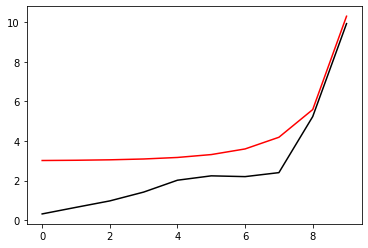

1206 46.14321253190021 -0.7038853144849022 1.149033529373962
[0.31356705 0.64648868 0.97663869 1.42375721 2.02281855 2.24452709
 2.20366782 2.40134134 5.22511709 9.92480231]


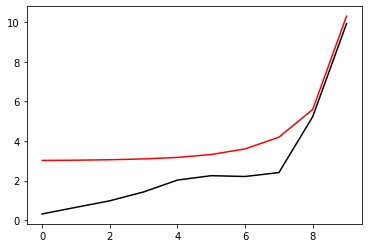

1407 56.05639541114653 -0.7037625058629049 1.1486341989102402
[0.30869263 0.64304771 0.97788683 1.42745029 2.02573902 2.24828382
 2.20591241 2.40007996 5.21838627 9.92470017]


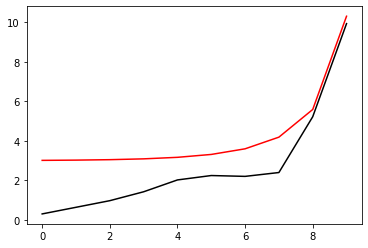

1608 52.45329639555093 -0.7036889381194734 1.1481908590810053
[0.3037544  0.63955134 0.97903052 1.43103399 2.02856256 2.25191393
 2.20801997 2.39867137 5.21150441 9.92458926]


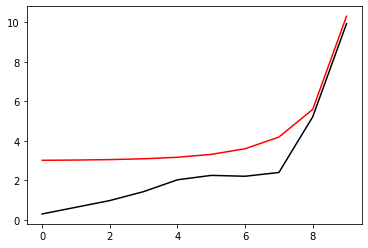

1809 57.091257626570716 -0.7035941423228765 1.147740186530709
[0.29885049 0.63609954 0.98017068 1.43460707 2.031383   2.2555025
 2.21006218 2.39717028 5.2045083  9.92448166]


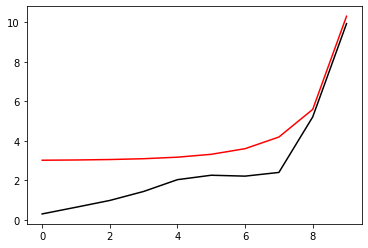

2010 53.38465668682314 -0.7034452943560245 1.147324595387476
[0.29398381 0.6327012  0.98132369 1.43819386 2.03423444 2.2590945
 2.2120945  2.39564111 5.19746853 9.92436706]


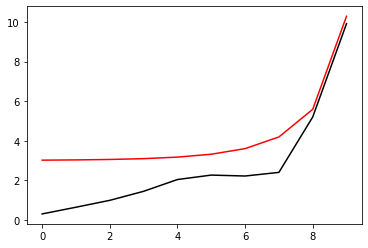

2211 59.102589058218896 -0.7032258036676771 1.146960022153222
[0.28912831 0.62932969 0.98245997 1.4417574  2.03706863 2.26262689
 2.21403669 2.39398722 5.19027663 9.92426171]


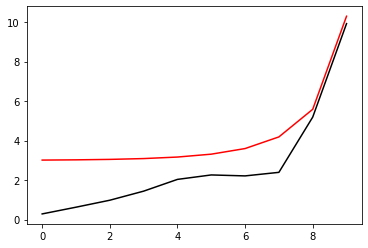

2412 49.273456288626974 -0.7030291904471765 1.146532426122633
[0.28427089 0.6259736  0.98356787 1.44528215 2.03986303 2.2660667
 2.21584225 2.39214727 5.18285781 9.92412879]


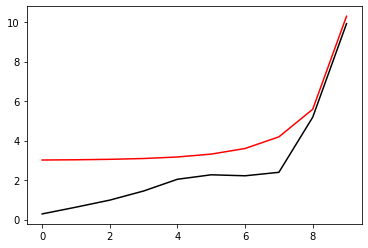

2613 48.20081201403588 -0.702800961504485 1.1461201896134052
[0.27936088 0.6225823  0.98459646 1.4487157  2.04256367 2.26935811
 2.21745382 2.39006392 5.17515747 9.9240303 ]


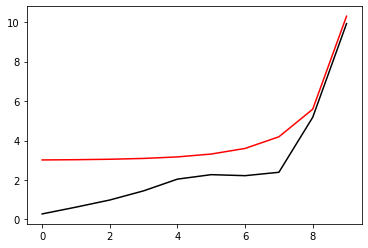

2814 52.412932481553014 -0.7025175307345841 1.145777578796722
[0.27429605 0.61906561 0.98546461 1.45198251 2.04509823 2.2724292
 2.21879746 2.38766019 5.16709658 9.92388276]


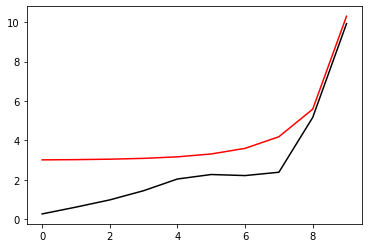

3015 54.24727269671996 -0.7022238194774661 1.145395302864101
[0.26913161 0.61547261 0.98620772 1.45509485 2.04744575 2.2752142
 2.21975446 2.38476226 5.15845365 9.92375975]


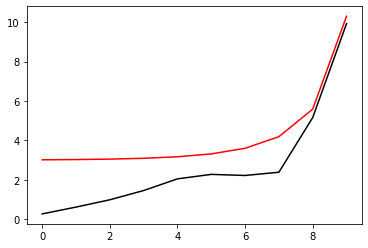

3216 45.94940742874766 -0.7020318482037148 1.1448880021172958
[0.26368892 0.61163679 0.98666435 1.45788954 2.04943507 2.27752668
 2.22011906 2.38114543 5.14899178 9.92360204]


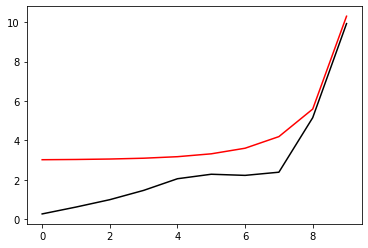

3417 55.885805899200214 -0.7018814992312061 1.1442754933964447
[0.25791944 0.60751795 0.98678683 1.46029503 2.05095295 2.27919075
 2.21963818 2.37647467 5.13830568 9.92344771]


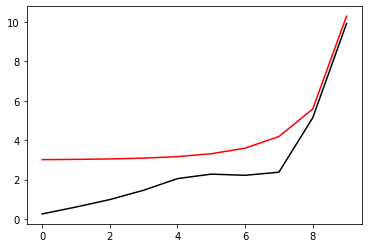

3618 52.224739210170796 -0.7017835516850763 1.1435228918933982
[0.25164692 0.60296288 0.98642185 1.46213576 2.05177752 2.27990915
 2.21791955 2.37025643 5.12581696 9.92322983]


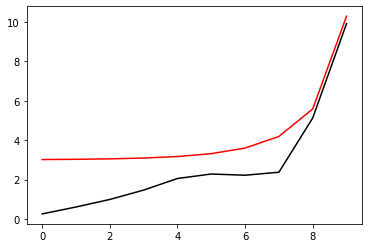

3819 57.10938471440274 -0.7016757778126078 1.142593415800738
[0.24471591 0.59785695 0.98545308 1.46325206 2.05165866 2.27928429
 2.21437729 2.36170035 5.11055894 9.92301125]


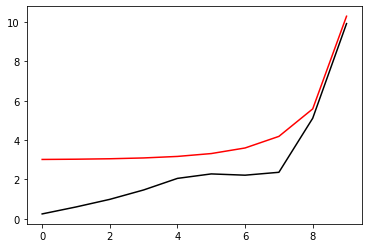

4020 53.67508307097966 -0.7015217719881383 1.14142666044892
[0.2367237  0.59186714 0.98355277 1.46325956 2.05008452 2.27658996
 2.20800919 2.34950582 5.09098076 9.92268337]


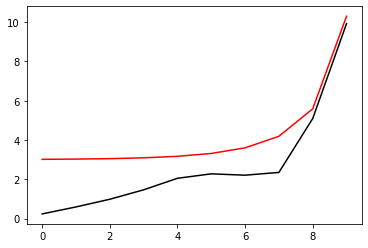

4221 59.45478018084039 -0.7012394962881425 1.139878425740539
[0.22750157 0.58489738 0.98062358 1.46198918 2.0467302  2.27123301
 2.19787059 2.33234548 5.06544038 9.92229846]


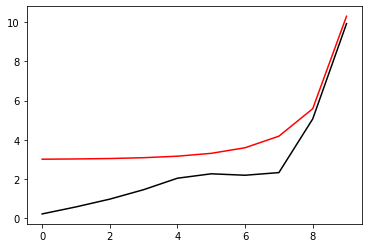

4422 49.275801813601284 -0.7008031469518452 1.1378469001792486
[0.21743254 0.57735382 0.97709834 1.45991532 2.0421258  2.26377906
 2.18454433 2.31081051 5.03456289 9.92179596]


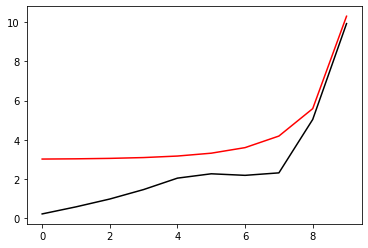

4623 48.57820700021669 -0.7003670763751488 1.1350756915977311
[0.20729192 0.5699212  0.97362983 1.45771985 2.03705526 2.25517421
 2.16919245 2.28631857 5.00002856 9.92126784]


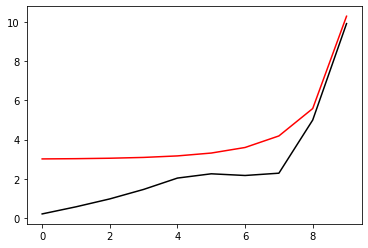

4824 54.29273166915961 -0.7011237861460994 1.1165402273520908
[0.21883194 0.58279102 0.98801684 1.46964323 2.04070236 2.24789915
 2.14623954 2.24473656 4.94015022 9.92031017]


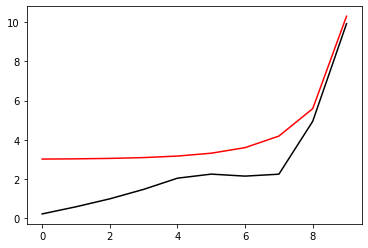

5025 53.65714304369117 -0.6990248427279757 1.113386115169889
[0.20961602 0.57606062 0.98464681 1.46680285 2.0341314  2.23650543
 2.12664633 2.21451354 4.89874981 9.91967332]


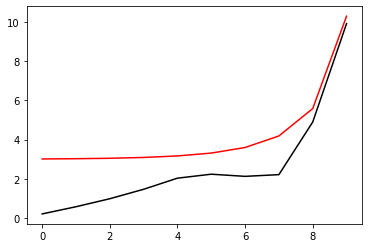

5226 45.734984519149336 -0.6976258981329236 1.1114113814040496
[0.19961467 0.56863213 0.98095028 1.46449534 2.0295453  2.22900804
 2.11320213 2.19259368 4.86718269 9.91915991]


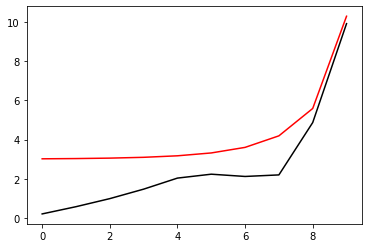

5427 53.77666606775154 -0.6964831604935942 1.1097424954955668
[0.19049305 0.5620599  0.97826601 1.4636445  2.02719989 2.22479782
 2.1042831  2.17634909 4.84200582 9.91878111]


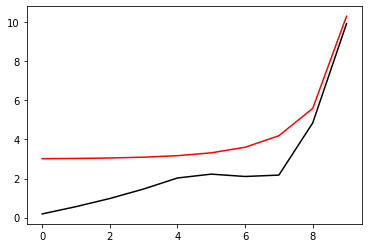

5628 49.769801901768716 -0.6955400504588148 1.1083021951415548
[0.18196877 0.55606685 0.97628189 1.46381678 2.02643347 2.22291932
 2.0985978  2.16418957 4.82143719 9.91843861]


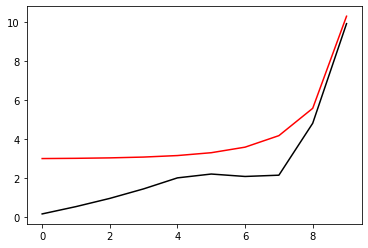

5829 54.058991221172846 -0.6947572250107412 1.1069955991661526
[0.17390392 0.55052431 0.97484885 1.46478424 2.0268661  2.22278903
 2.09532098 2.15506298 4.80426936 9.91818701]


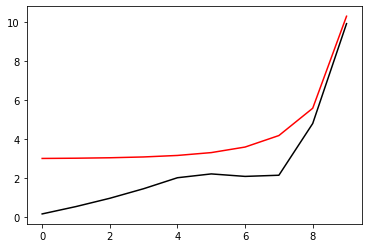

6030 53.40550226016739 -0.6941103267300038 1.1058524400873937
[0.16605817 0.54520233 0.97372861 1.46626522 2.02812874 2.22391986
 2.09382607 2.14821694 4.78967651 9.9179388 ]


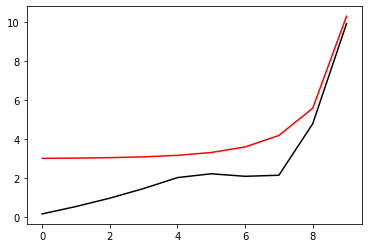

6231 60.41685591528899 -0.6934814602529977 1.104842277446749
[0.15851585 0.5401853  0.97298847 1.46828188 2.03016252 2.2261406
 2.0938036  2.14320192 4.77710195 9.91775764]


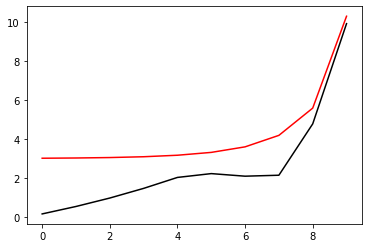

6432 48.428621353065424 -0.6929412627518315 1.1038569887069343
[0.1511924  0.53539702 0.97254886 1.47073431 2.03282577 2.22924889
 2.09497641 2.13966827 4.766149   9.91756963]


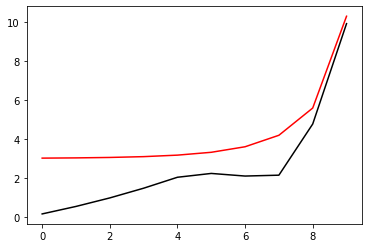

6633 49.61685413117146 -0.6924281185260144 1.1029434037844241
[0.14402717 0.53077428 0.97233412 1.47352233 2.03597871 2.23305083
 2.09708689 2.13729817 4.75646277 9.91743122]


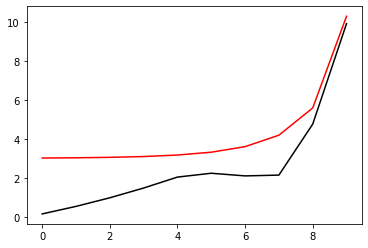

6834 54.82096336275004 -0.6918662833469135 1.1021597289819698
[0.13700914 0.52631226 0.97233782 1.47663025 2.03958696 2.23748208
 2.100033   2.13595206 4.74788016 9.91728224]


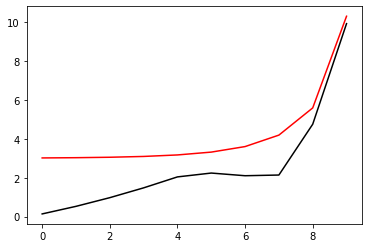

7035 53.456705122869465 -0.6913124147195575 1.101457193570686
[0.13003531 0.52190406 0.97243986 1.47991629 2.04347706 2.24232606
 2.10354872 2.13531798 4.74006357 9.91717431]


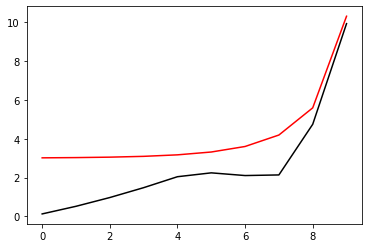

7236 45.725459955102785 -0.6908454414305769 1.1007335952990602
[0.12309112 0.51753196 0.97261425 1.48334332 2.04759727 2.24751003
 2.10753726 2.13527703 4.73288376 9.91704489]


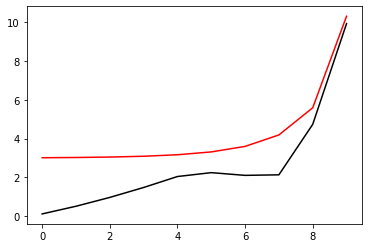

7437 53.612381193442054 -0.690412891236463 1.1000174377565588
[0.11617557 0.51319166 0.97284599 1.48688047 2.05189497 2.25295045
 2.11187845 2.13567174 4.72615682 9.91695678]


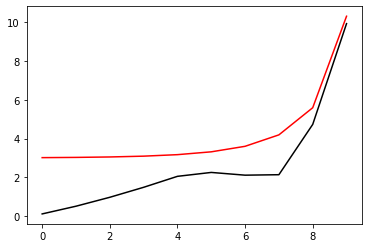

7638 49.67825719491139 -0.6900074834483139 1.0993230498108837
[0.10926645 0.50885932 0.97310542 1.4904912  2.0563259  2.25859143
 2.11650378 2.13642319 4.71980261 9.91683784]


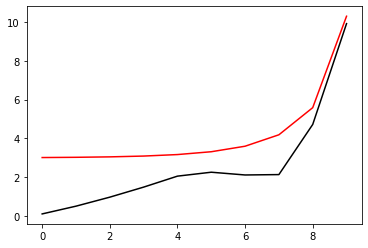

7839 53.96403196337408 -0.6896416902700584 1.0985873089275051
[0.10240399 0.50457535 0.97342738 1.49420161 2.06090425 2.26442831
 2.1213851  2.1374776  4.71374706 9.9167616 ]


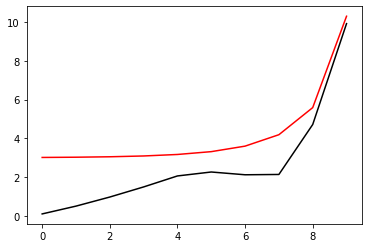

8040 53.30320422375642 -0.6893348118947588 1.0978905340835141
[0.09544784 0.50020104 0.97367288 1.49787425 2.06549707 2.2703338
 2.1264049  2.13873405 4.70791685 9.91665121]


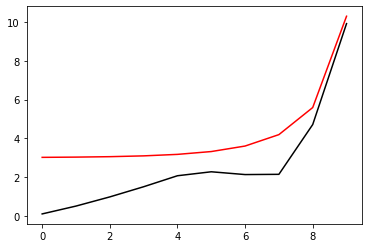

8241 60.41191838599652 -0.6889729343392078 1.0972299895588442
[0.08857258 0.49590358 0.9739966  1.50164805 2.07022418 2.2764011
 2.13162374 2.14021565 4.70229921 9.91657956]


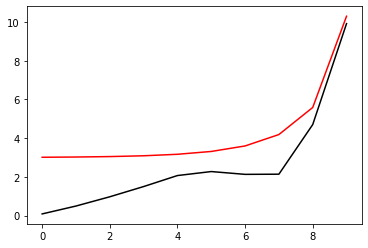

8442 48.36114991221018 -0.6886545423308088 1.0965035171704198
[0.08175712 0.49166499 0.9743815  1.5055074  2.07507255 2.28261851
 2.13703146 2.14191519 4.69689439 9.91647909]


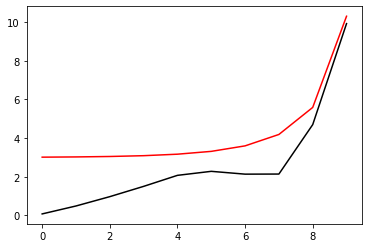

8643 49.60616626121457 -0.6883120453664103 1.0957959323477344
[0.0749904  0.48746725 0.97480056 1.50941644 2.07999839 2.28893327
 2.14256726 2.14376633 4.69163688 9.9164102 ]


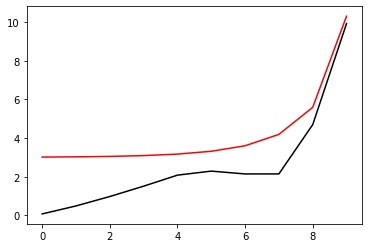

8844 54.809564718632785 -0.6878770632792294 1.095179713351762
[0.06829803 0.48333953 0.97528543 1.51341041 2.08504255 2.29539165
 2.14828332 2.1458278  4.68659377 9.91631713]


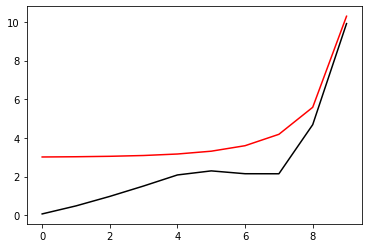

9045 53.44073553656623 -0.687419435253991 1.0946129415701016
[0.06159746 0.4791936  0.97573882 1.5173808  2.09008333 2.30185607
 2.15402552 2.14793116 4.68159055 9.91625352]


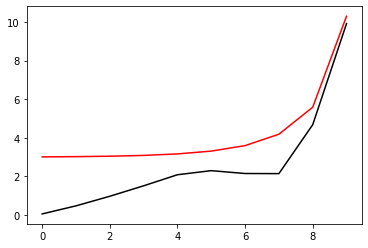

9246 45.69104772023847 -0.6870381316580912 1.093985186763416
[0.05488866 0.47502567 0.97615351 1.52131869 2.09511259 2.30832031
 2.15979138 2.15007986 4.67663979 9.91615908]


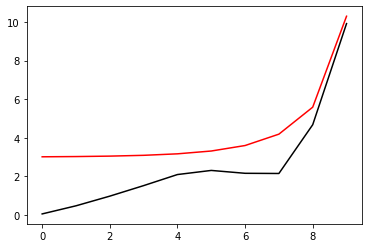

9447 53.604945953693694 -0.68666939289392 1.0933461622879512
[0.04818883 0.47084968 0.97653739 1.52522383 2.10011994 2.31476062
 2.1655413  2.15221709 4.67166967 9.91609879]


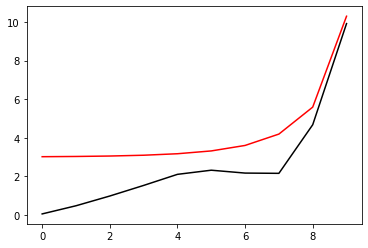

9648 49.690147530615604 -0.6863057597270847 1.0927216026659345
[0.04148646 0.46665308 0.97687709 1.52908323 2.1050948  2.32117006
 2.17127369 2.15434856 4.66669587 9.91600145]


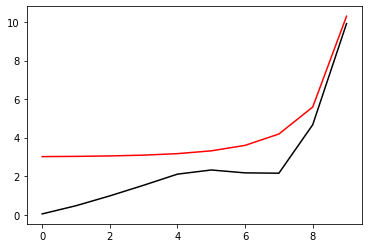

9849 53.90618473682984 -0.6859718915837956 1.0920370762030254
[0.03482902 0.46248437 0.97722001 1.53294154 2.11007747 2.32758182
 2.17701178 2.15648488 4.66171539 9.91594223]


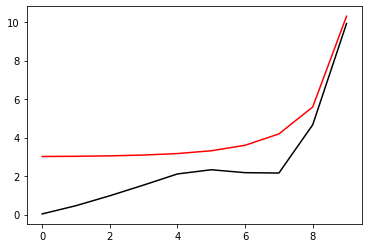

In [160]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, lam2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 60.40539953550523 -0.6855865129344931 1.0911160413298646
[0.02378799 0.45570545 0.97820236 1.54006653 2.11930119 2.33943778
 2.18795875 2.16156599 4.6539359  9.9158102 ]


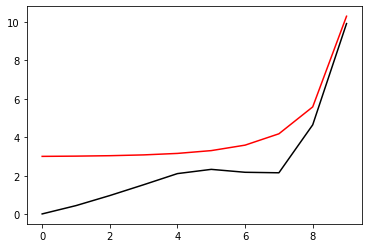

402 48.244671035452754 -0.6852631723952464 1.0903840077375704
[0.01713745 0.45147876 0.97839236 1.54374198 2.12409441 2.34560081
 2.19338505 2.16329707 4.64844945 9.91572104]


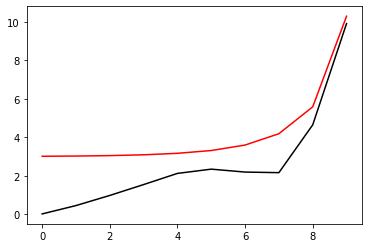

603 49.58468046728686 -0.6849124632688398 1.089672169832263
[0.0105419  0.4472952  0.97861197 1.54745503 2.12895196 2.35184962
 2.19893166 2.1651758  4.64311825 9.91564446]


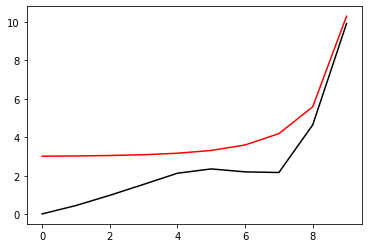

804 54.74525520354229 -0.6844700667597732 1.0890517338407661
[4.03892318e-03 4.43191982e-01 9.78895998e-01 1.55124016e+00
 2.13391109e+00 2.35822290e+00 2.20464143e+00 2.16725555e+00
 4.63801358e+00 9.91555415e+00]


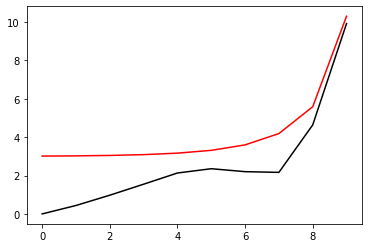

1005 53.43752810812251 -0.6840065169307893 1.088482830734129
[-2.45373811e-03  4.39080876e-01  9.79147090e-01  1.55498839e+00
  2.13884855e+00  2.36458018e+00  2.21035594e+00  2.16936288e+00
  4.63295469e+00  9.91548576e+00]


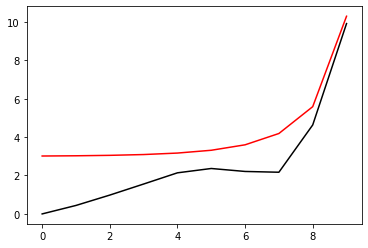

1206 45.65650316274432 -0.6836270495455836 1.0878480615972022
[-8.93963601e-03  4.34955317e-01  9.79356649e-01  1.55869053e+00
  2.14375619e+00  2.37091565e+00  2.21607319e+00  2.17150151e+00
  4.62795281e+00  9.91539180e+00]


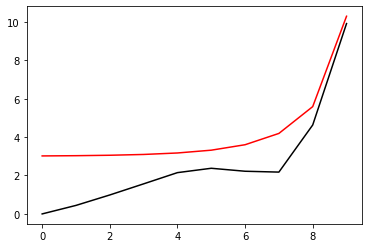

1407 53.6097128741362 -0.6832575058268243 1.087207480141728
[-0.01540213  0.43082956  0.97953436  1.56234911  2.14862637  2.37720833
  2.22175566  2.17361531  4.62293368  9.91533115]


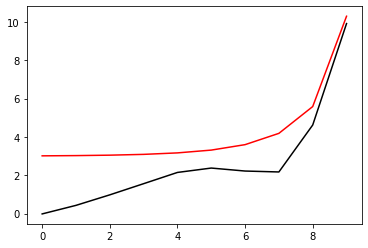

1608 49.71007278777639 -0.6828860975678267 1.086592686676923
[-0.02185362  0.426691    0.97966826  1.56595384  2.1534518   2.38345538
  2.22740625  2.17571422  4.61791521  9.91523331]


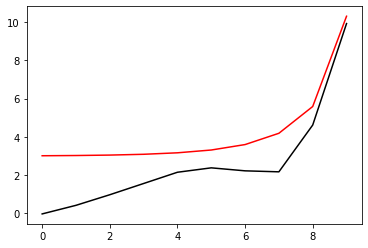

1809 53.85712593881318 -0.6825459847666839 1.0859162873806736
[-0.02824971  0.42258565  0.97980441  1.56954886  2.1582723   2.38968963
  2.23304736  2.17780676  4.61288963  9.91517327]


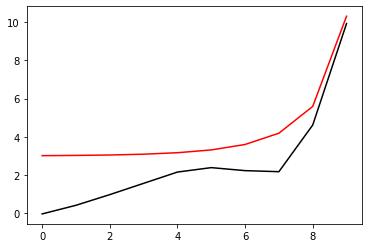

2010 53.25841674265801 -0.6822660073041296 1.0852702136687087
[-0.0347308   0.418377    0.97981223  1.57301231  2.16297849  2.39581921
  2.23860981  2.17985197  4.60784853  9.91507545]


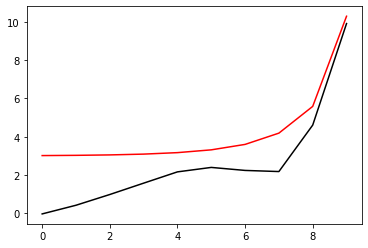

2211 60.4001632625667 -0.6819235604993384 1.0846500549660534
[-0.04111813  0.41423797  0.97985693  1.57649874  2.16771054  2.40196508
  2.24418954  2.18191461  4.60282085  9.91501285]


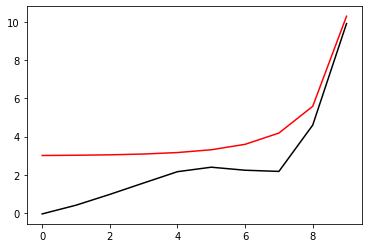

2412 48.138310312859346 -0.6816182537186184 1.0839512576925334
[-0.04742409  0.41016214  0.97993892  1.58001631  2.17248547  2.40815444
  2.24982434  2.18404284  4.59786371  9.91491959]


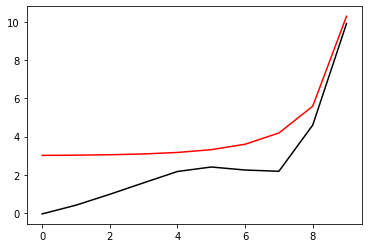

2613 49.56653116213477 -0.6812813251024048 1.0832695355116335
[-0.05366486  0.40612773  0.98003118  1.58353297  2.17726655  2.41434678
  2.25547082  2.18619173  4.59293247  9.91485586]


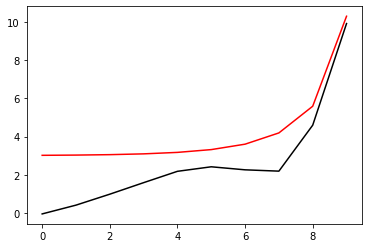

2814 54.68827209033294 -0.6808540181835225 1.0826697350035561
[-0.05981555  0.40216502  0.98017055  1.58709349  2.18210826  2.42060793
  2.26120679  2.18845049  4.58812521  9.91476632]


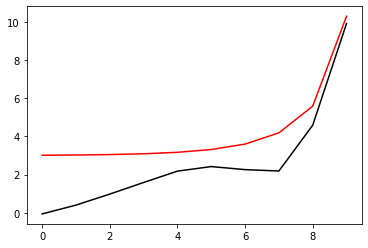

3015 53.43148781588477 -0.6804047666234843 1.0821155523045043
[-0.06595831  0.39818795  0.98026531  1.5905981   2.18690013  2.4268152
  2.26689639  2.19067123  4.58328639  9.91470556]


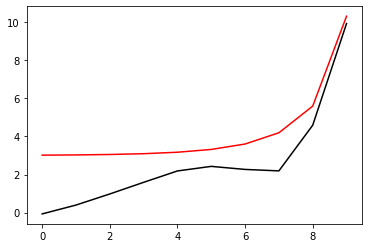

3216 45.623502280832994 -0.6800409666256462 1.0814902075409065
[-0.07209915  0.39418873  0.98030772  1.59404087  2.19164009  2.43297265
  2.27255168  2.19287527  4.57844674  9.91461263]


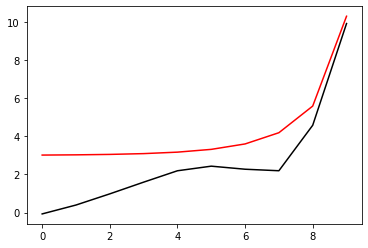

3417 53.61242030760354 -0.679681099169997 1.080863199177809
[-0.07821938  0.39018438  0.98031142  1.59742969  2.19632752  2.43906853
  2.27814686  2.1950205   4.57354726  9.91455357]


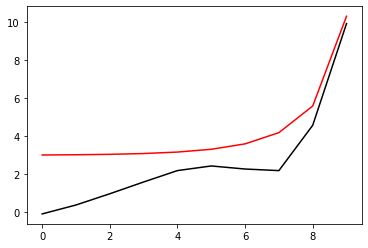

3618 49.72982138356577 -0.67930963534883 1.0802719172224495
[-0.08432959  0.38616456  0.98026757  1.60075849  2.20096079  2.44510763
  2.28369474  2.19712901  4.56861961  9.91445697]


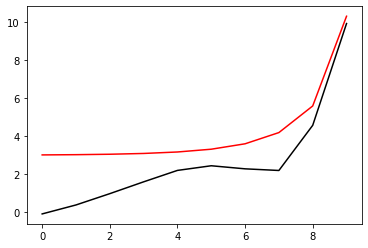

3819 53.81174439692713 -0.6789687882109169 1.0796173668891418
[-0.09038597  0.38217486  0.98022215  1.60407172  2.20558056  2.45112433
  2.28922023  2.19921279  4.56366007  9.91439799]


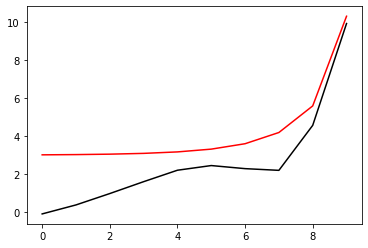

4020 53.23479249682225 -0.6786916177633714 1.0789898053539728
[-0.09652829  0.3780798   0.98004615  1.60724973  2.21008052  2.45703097
  2.29465977  2.20123797  4.55866842  9.91430099]


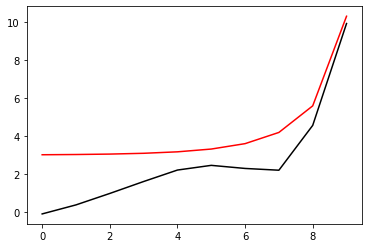

4221 60.396579752685085 -0.678353273523509 1.0783856645733736
[-0.10257872  0.3740515   0.97990419  1.61044671  2.21460068  2.46294853
  2.30010959  2.20326991  4.55367435  9.91423888]


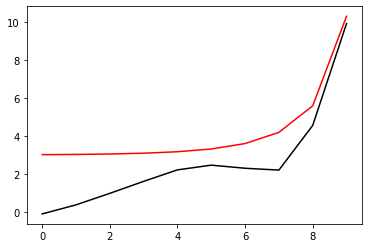

4422 48.039767840163165 -0.6780505094286063 1.0777018084712036
[-0.10854647  0.3700872   0.97980082  1.6136755   2.21916356  2.46891062
  2.30561492  2.20536518  4.54874398  9.91414603]


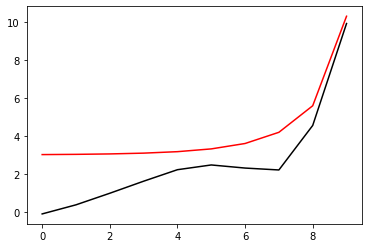

4623 49.55096572840118 -0.6777153969413742 1.077035239795179
[-0.11444933  0.3661636   0.97970759  1.61690266  2.22373102  2.4748753
  2.31113107  2.20747785  4.54383193  9.91408268]


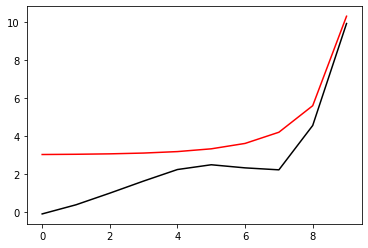

4824 54.636640624492095 -0.6772947894022585 1.0764455105119406
[-0.12026339  0.36231004  0.97966053  1.62017237  2.22835739  2.48090886
  2.31673709  2.20969923  4.53903914  9.91399324]


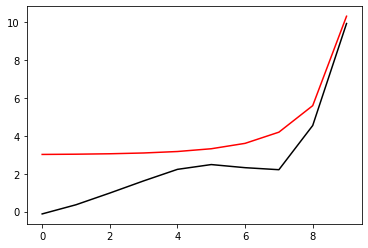

5025 53.4246900029847 -0.6768547206903797 1.0758980246985157
[-0.12606821  0.35844328  0.97957081  1.62338776  2.23293503  2.48689118
  2.32229959  2.2118839   4.53421259  9.9139328 ]


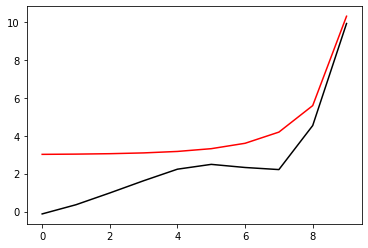

5226 45.59320173019738 -0.6765031942199565 1.07527707796759
[-0.13187277  0.35455291  0.9794284   1.62654088  2.23746022  2.49282514
  2.32783001  2.21405331  4.52938382  9.91383996]


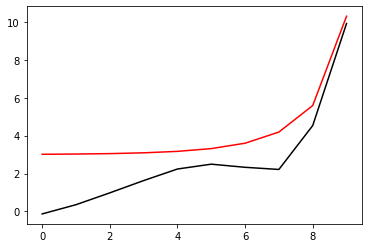

5427 53.61453900065761 -0.6761509320835482 1.0746610599601416
[-0.13765726  0.35065729  0.97924835  1.62964106  2.24193377  2.49870023
  2.33330367  2.2161664   4.52449491  9.91378107]


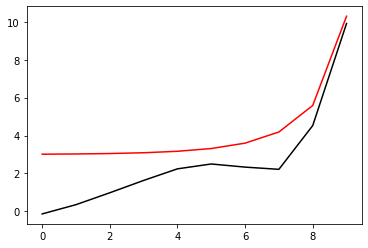

5628 49.749587007803974 -0.6757782908249035 1.0740924589307552
[-0.14343116  0.34674726  0.97902307  1.63268359  2.24635559  2.50452303
  2.33873553  2.21824788  4.51958061  9.91368473]


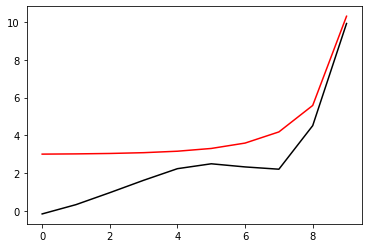

5829 53.771167064839695 -0.6754361286477809 1.073460196116081
[-0.14915136  0.34286765  0.97879759  1.63571164  2.25076471  2.51032574
  2.34414777  2.22030646  4.51463336  9.91362589]


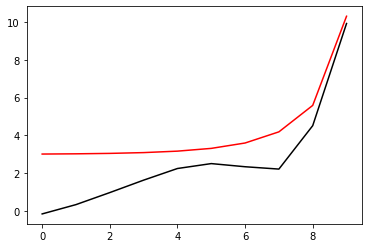

6030 53.210215276388524 -0.6751621243535857 1.0728510957698711
[-0.1549579   0.33888274  0.9784426   1.63860526  2.25505459  2.51602064
  2.34947715  2.22230919  4.50965447  9.91352916]


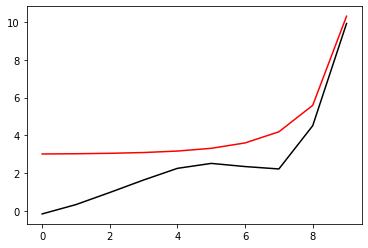

6231 60.393793964811664 -0.6748286975559343 1.072263558563305
[-0.16067392  0.3349638   0.97812191  1.64151776  2.25936422  2.52172733
  2.35481797  2.22431887  4.50467052  9.91346716]


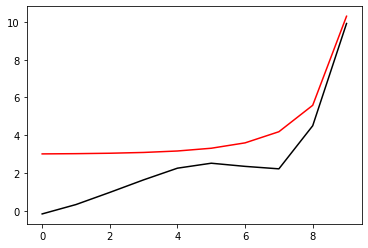

6432 47.95201958892638 -0.6745297466838189 1.071596041562819
[-0.16630644  0.33111045  0.97784263  1.64446481  2.26371928  2.52748292
  2.36021941  2.22639641  4.49975218  9.91337449]


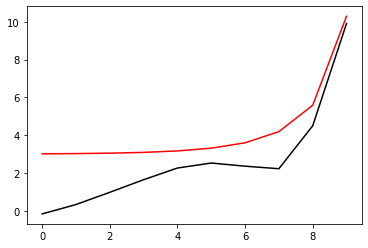

6633 49.53791554465669 -0.6741981050372742 1.070946320246777
[-0.1718745   0.32729815  0.97757495  1.64741141  2.26807984  2.53324339
  2.36563445  2.22849345  4.49485171  9.91331138]


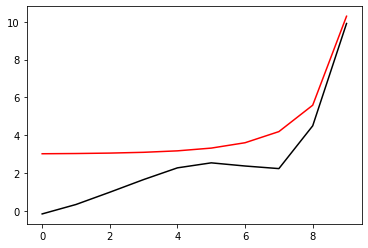

6834 54.59210358895188 -0.6737862186747949 1.0703687127119683
[-0.17735553  0.32355484  0.97735345  1.65040037  2.27249912  2.5390743
  2.37114194  2.23070173  4.49007098  9.91322203]


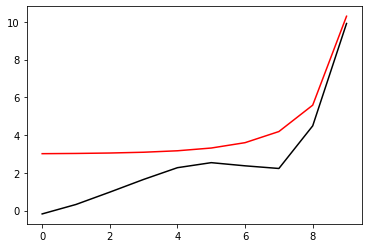

7035 53.41716850648708 -0.6733578938128036 1.0698292065669415
[-0.18282625  0.31980019  0.97709217  1.65333747  2.27687182  2.54485736
  2.37660982  2.23287675  4.48525777  9.9131619 ]


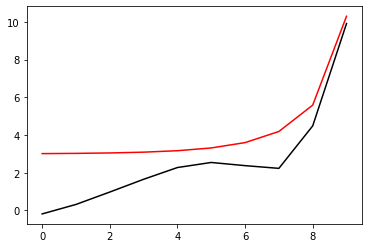

7236 45.56557612657435 -0.6730205665892235 1.0692145750773225
[-0.18829876  0.31602094  0.97677837  1.65621229  2.28119199  2.55059353
  2.38204802  2.23503903  4.48044323  9.91306922]


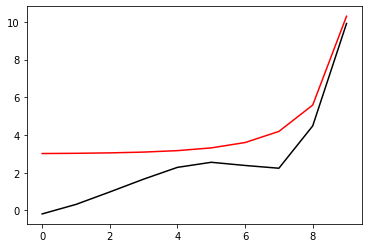

7437 53.61612690947421 -0.6726776146335102 1.068611866368335
[-0.19375215  0.31223669  0.97642847  1.65903548  2.28546169  2.5562733
  2.3874326   2.23714798  4.47556986  9.91301058]


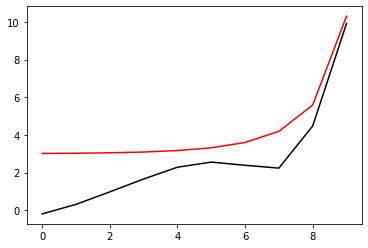

7638 49.76928603371293 -0.6723056499306703 1.0680679579778871
[-0.19919478  0.30843943  0.97603598  1.66180349  2.28968214  2.5619048
  2.39278039  2.2392306   4.470675    9.91291458]


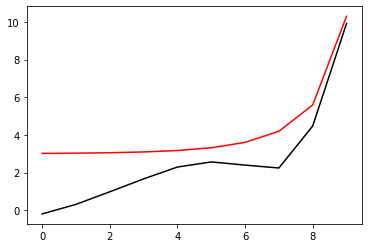

7839 53.734703853511704 -0.6719636340422779 1.0674604191740598
[-0.20458381  0.3046736   0.97564535  1.66455866  2.29389114  2.56751841
  2.39811106  2.24129235  4.46574721  9.91285601]


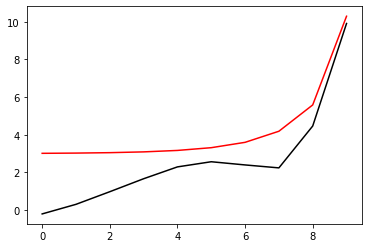

8040 53.185530281552836 -0.6716942073431933 1.0668711075080133
[-0.21006006  0.30080265  0.97512631  1.66717995  2.29798107  2.57302549
  2.40336086  2.24330036  4.46078852  9.91275965]


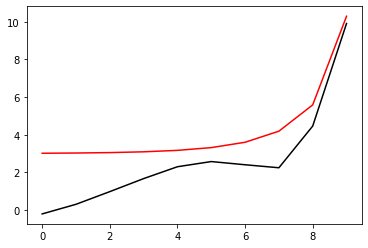

8241 60.391472065522755 -0.6713673121805905 1.0663014896165084
[-0.21544729  0.29699735  0.97464226  1.6698203   2.30209044  2.57854482
  2.40862267  2.24531531  4.4558227   9.91269789]


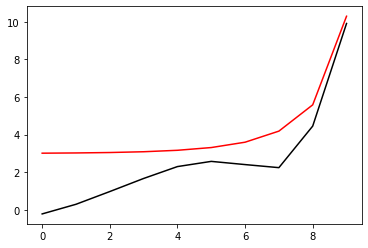

8442 47.873977433981175 -0.6710737286703913 1.065652298103415
[-0.22075084  0.29325911  0.97420221  1.67249746  2.30624732  2.58411629
  2.41394886  2.24740165  4.45092409  9.91260553]


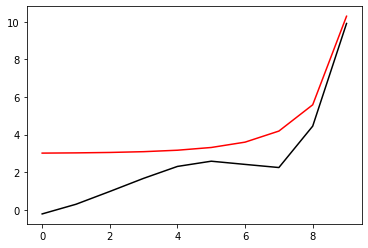

8643 49.52682293818718 -0.6707473178295734 1.0650213173804794
[-0.22599074  0.28956243  0.97377532  1.67517527  2.31041044  2.58969424
  2.41929058  2.24950907  4.44604313  9.91254278]


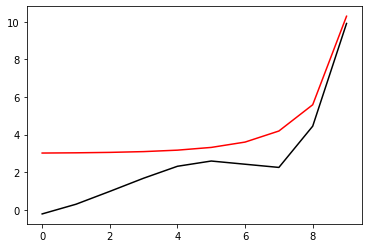

8844 54.55351889559553 -0.6703460878115004 1.06445769735561
[-0.23114586  0.28593367  0.97339457  1.67789505  2.31463176  2.59534345
  2.42472646  2.25172972  4.44128259  9.91245367]


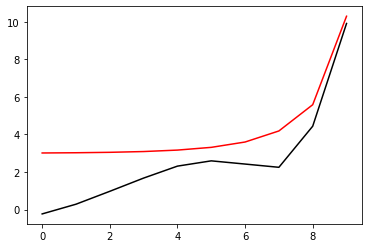

9045 53.40942991543892 -0.6699316705703968 1.0639273711114383
[-0.23628996  0.28229553  0.97297692  1.68056528  2.31880833  2.6009474
  2.4301256   2.2539198   4.43649069  9.91239395]


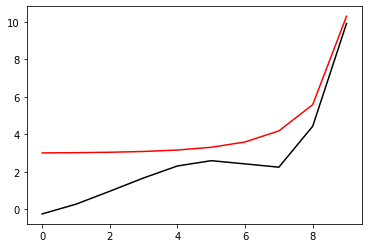

9246 45.54040671170401 -0.6696098408711096 1.0633209569551847
[-0.24143834  0.27863178  0.97250689  1.68317296  2.32293185  2.60650499
  2.43549633  2.25609869  4.431698    9.91230156]


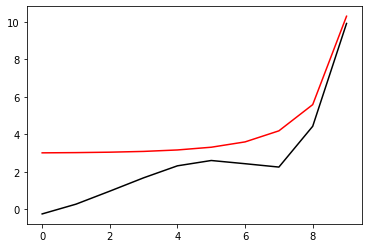

9447 53.617587509822414 -0.6692774133189836 1.06273349700977
[-0.24656894  0.27496334  0.97200224  1.68573014  2.32700572  2.61200788
  2.44081554  2.25822644  4.42684752  9.91224328]


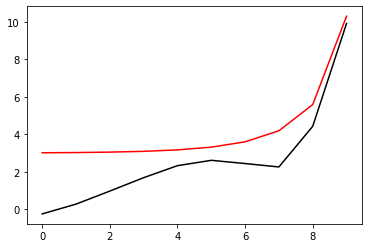

9648 49.788968763351924 -0.6689078787701584 1.0622152375001277
[-0.25168899  0.27128326  0.97145758  1.68823442  2.33103248  2.61746575
  2.44610201  2.26033232  4.42197918  9.91214773]


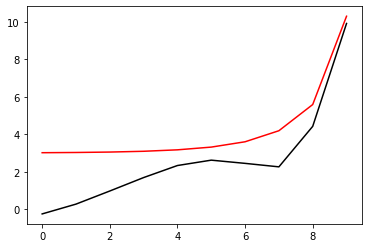

9849 53.701835802153624 -0.6685673768223623 1.0616338481720113
[-0.25675559  0.26763597  0.97091717  1.69072771  2.33504911  2.62290763
  2.4513733   2.26241893  4.41707795  9.91208955]


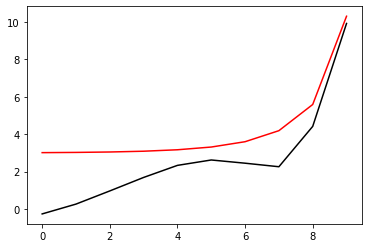

In [161]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, lam2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 60.39032733176323 -0.6681902493132988 1.060828650207408
[-0.26513279  0.26167719  0.97031032  1.69543165  2.34253617  2.63304155
  2.46144914  2.26626083  4.40913164  9.91195521]


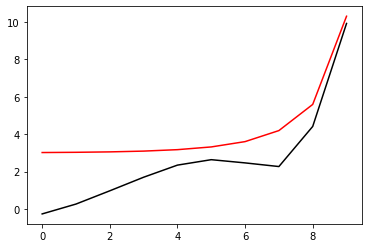

402 47.803547668151474 -0.667884457555071 1.0601769810403145
[-0.27019061  0.25797749  0.96963524  1.6977509   2.34636964  2.6382651
  2.46644716  2.26795088  4.40366043  9.91186234]


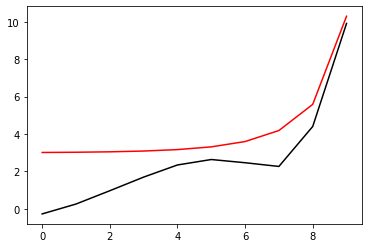

603 49.51725763904115 -0.6675507982473782 1.0595485375594578
[-0.27517937  0.25433397  0.96900149  1.70011254  2.35026872  2.64357938
  2.47157527  2.26980734  4.39837194  9.91178877]


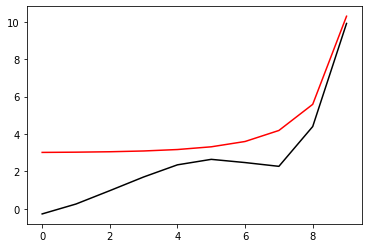

804 54.5190298803451 -0.6671513500772418 1.0589871945112297
[-0.28007595  0.25077056  0.96843263  1.70254118  2.3542612   2.64901525
  2.47686829  2.27187261  4.39332071  9.91169698]


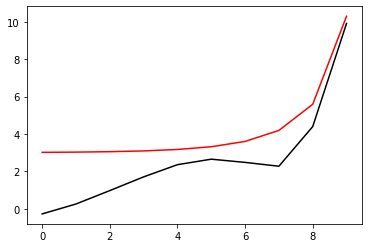

1005 53.40233934656906 -0.666744658053453 1.0584574753804765
[-0.2849527   0.24720978  0.96784245  1.70493827  2.35823216  2.65443764
  2.48216929  2.27397034  4.38831907  9.91163521]


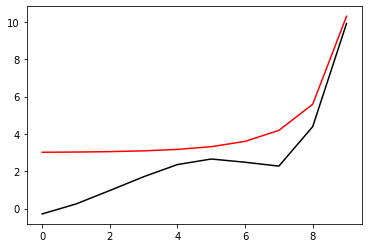

1206 45.517964330042695 -0.6664333616579512 1.0578537086078499
[-0.28982957  0.24363014  0.96720887  1.70728245  2.3621626   2.65983162
  2.48746902  2.27609858  4.38337354  9.91154067]


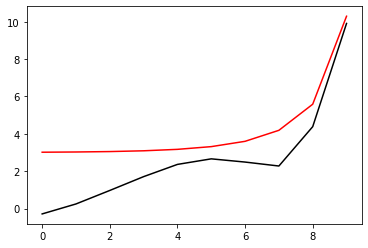

1407 53.619485562057605 -0.6661080731660202 1.0572770999889716
[-0.29468489  0.2400519   0.96654832  1.70958341  2.36605185  2.66518235
  2.49273468  2.27820411  4.37841103  9.91148041]


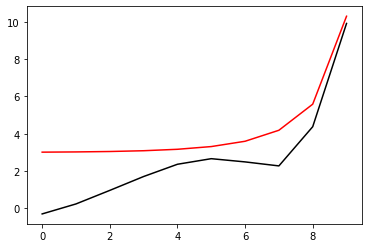

1608 49.80826548249075 -0.6657395072199292 1.056779679594858
[-0.29952588  0.23646781  0.96585464  1.71183747  2.36990037  2.67049641
  2.49798052  2.28030985  4.37346329  9.91138375]


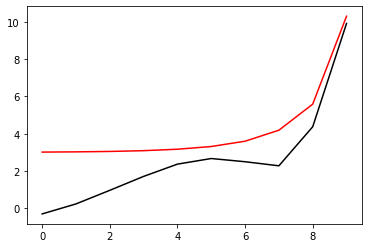

1809 53.67290689746677 -0.6653994965695901 1.0562208527243888
[-0.30431     0.23292176  0.96517121  1.7140851   2.37374276  2.67579907
  2.50321833  2.28241006  4.36850442  9.91132458]


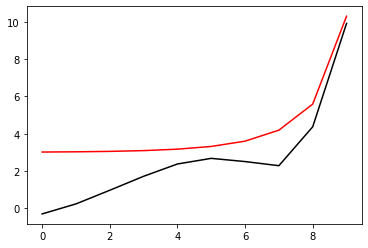

2010 53.13910708035273 -0.6651401966818506 1.0556694860728018
[-0.30918147  0.22927339  0.9643634   1.71620037  2.37746598  2.68099603
  2.50837888  2.28446672  4.3635316   9.91122811]


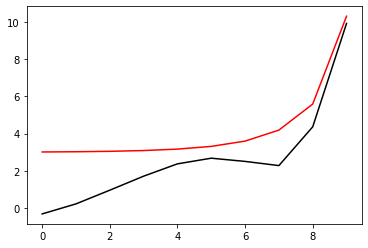

2211 60.38782525707164 -0.664827992831873 1.0551346620759903
[-0.31396478  0.22569302  0.96359449  1.7183364   2.38120853  2.68620528
  2.51355245  2.2865351   4.35856035  9.91116618]


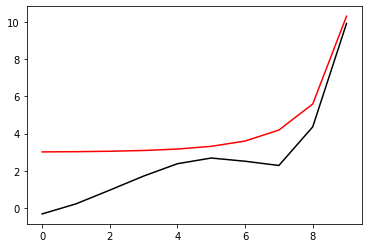

2412 47.74352597777163 -0.6645466092048639 1.0545234205168428
[-0.31866327  0.2221841   0.96287568  1.72051349  2.38500148  2.69147034
  2.51879554  2.28868378  4.35366841  9.91107393]


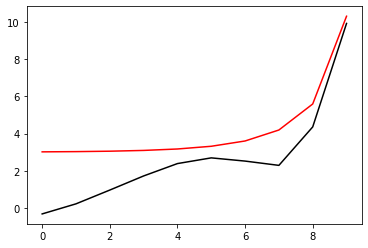

2613 49.50919120120929 -0.664232838886098 1.0539311021608644
[-0.32329888  0.21871928  0.96217426  1.72269343  2.38880112  2.6967426
  2.52405572  2.29085824  4.3488016   9.91101146]


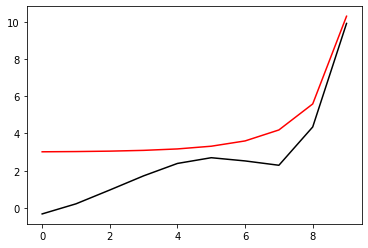

2814 54.49094371571632 -0.663855062836921 1.0533970179238057
[-0.32785373  0.21532139  0.96151962  1.7249143   2.39265677  2.70208522
  2.52941117  2.29315102  4.3440634   9.91092259]


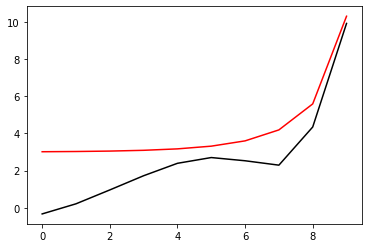

3015 53.39467474322161 -0.663470672491523 1.0528862359723186
[-0.33239614  0.21191868  0.9608342   1.72708964  2.39646971  2.70738466
  2.53473241  2.29541822  4.3393009   9.91086346]


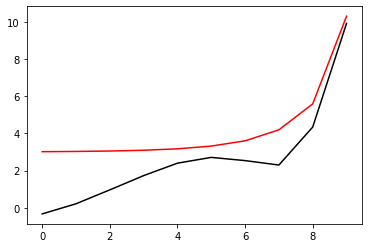

3216 45.49698308750235 -0.6631799348119375 1.0522995053112902
[-0.33694758  0.20848907  0.96009698  1.72920133  2.40022692  2.71263568
  2.54002428  2.29767633  4.33454221  9.91077153]


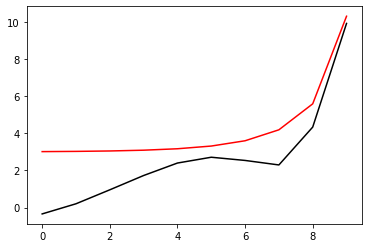

3417 53.62097175196497 -0.6628692921730942 1.0517448791141288
[-0.34148397  0.20505578  0.95932833  1.73126427  2.40393465  2.71783255
  2.54526575  2.29988664  4.32973088  9.91071385]


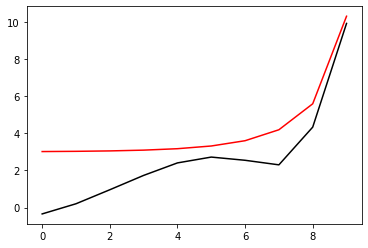

3618 49.827594576091116 -0.662508256025611 1.051275837889866
[-0.34601045  0.20161388  0.95852494  1.73327835  2.40759809  2.72298815
  2.55047939  2.3020827   4.32491117  9.91061912]


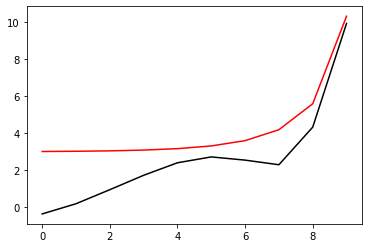

3819 53.64573879666483 -0.6621737101334784 1.0507459064895766
[-0.35048333  0.19820846  0.95773155  1.73528567  2.4112538   2.72813017
  2.55568003  2.30426251  4.32006157  9.91056171]


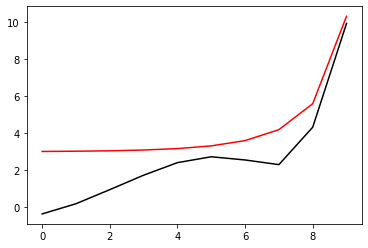

4020 53.11704324391153 -0.6619225170622532 1.050216916294569
[-0.35504756  0.19469845  0.95681291  1.73715982  2.41478861  2.73316481
  2.56080005  2.30639125  4.31518405  9.91046674]


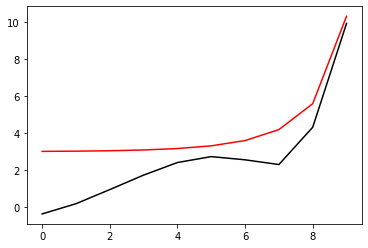

4221 60.386249565669 -0.6616204546742291 1.0497022856170364
[-0.35952778  0.19125411  0.95593243  1.7390542   2.41834153  2.73821069
  2.56593049  2.30852519  4.31029541  9.91040611]


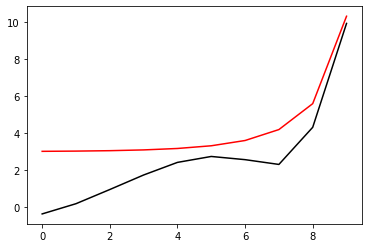

4422 47.687655573703736 -0.6613474061706706 1.04911311931886
[-0.36392601  0.18788029  0.95510278  1.74099071  2.42194555  2.74331375
  2.57113095  2.31073683  4.30547803  9.91031501]


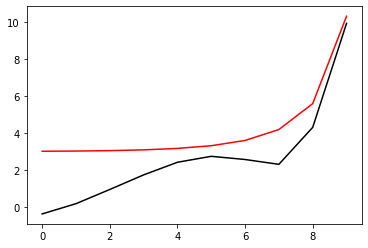

4623 49.501903967875094 -0.6610421340776973 1.0485426591942617
[-0.36826453  0.18454936  0.95429104  1.74293102  2.42555684  2.7484253
  2.57634911  2.31297226  4.30067902  9.91025366]


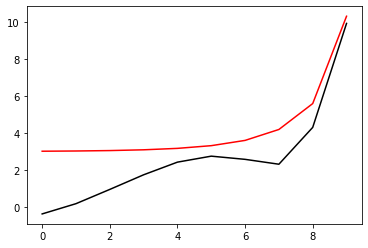

4824 54.46482261593753 -0.6606778490376253 1.048025675776118
[-0.37252683  0.18128267  0.9535251   1.7449117   2.42922352  2.75360776
  2.58166319  2.31532507  4.29600389  9.9101657 ]


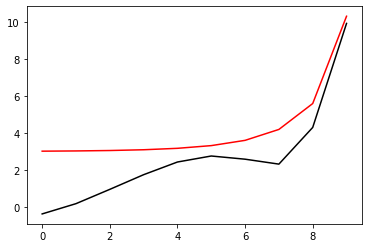

5025 53.38772255842692 -0.6603098704361482 1.0475268724684834
[-0.37677811  0.17801163  0.95273053  1.74684931  2.43284959  2.75874987
  2.58694555  2.31765298  4.29130145  9.9101076 ]


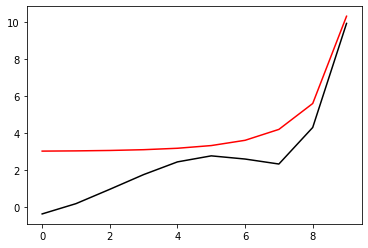

5226 45.477827254923184 -0.6600351207705637 1.0469526948533596
[-0.38104255  0.1747116   0.95188382  1.74872327  2.43641965  2.76384416
  2.59219914  2.31997123  4.28659929  9.91001651]


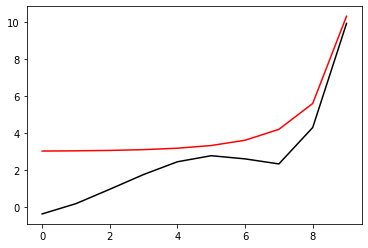

5427 53.62302960474571 -0.6597360704788828 1.0464163772819355
[-0.38529497  0.17140703  0.9510067   1.75054986  2.43994134  2.76888617
  2.59740412  2.32224236  4.28184247  9.90995968]


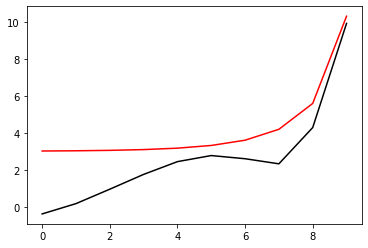

5628 49.84672975330472 -0.6593813383755024 1.0459714634386292
[-0.38953928  0.1680941   0.95009687  1.75233001  2.44342094  2.77389008
  2.60258466  2.32450196  4.27707773  9.90986585]


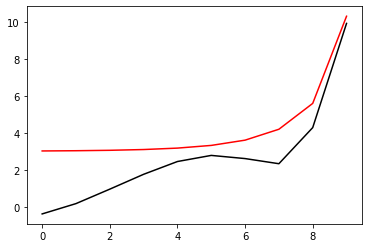

5829 53.62105454233076 -0.659051490068308 1.0454670634235501
[-0.39373102  0.16481864  0.94919972  1.75410622  2.44689512  2.77888314
  2.60775453  2.32674641  4.27228147  9.90980925]


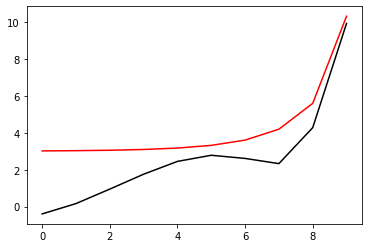

6030 53.09646591456146 -0.6588075247593693 1.0449579755504006
[-0.39801653  0.16143799  0.94817822  1.75575007  2.45024853  2.78376943
  2.61284442  2.32893996  4.26745572  9.90971513]


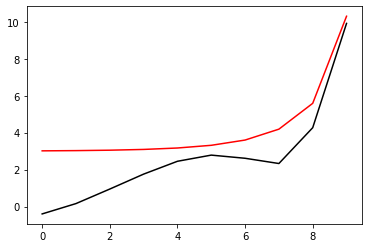

6231 60.38488417055405 -0.6585148382381188 1.0444615744344246
[-0.40222072  0.15812225  0.94719571  1.757415    2.4536202   2.78866737
  2.61794465  2.33113759  4.26261543  9.90965524]


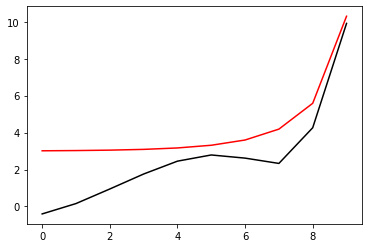

6432 47.637302463593244 -0.6582494522644367 1.0438930440462553
[-0.40634463  0.15487723  0.94626582  1.75912392  2.45704427  2.79362432
  2.62311665  2.33341399  4.25784539  9.90956488]


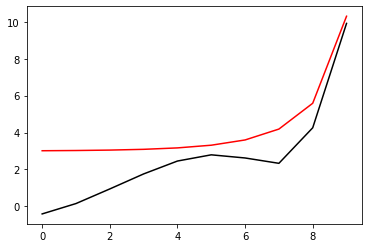

6633 49.49545918542517 -0.6579521843322675 1.0433431286670272
[-0.41041111  0.15167477  0.94535514  1.76083795  2.46047634  2.79859086
  2.62830727  2.33571457  4.25309238  9.90950429]


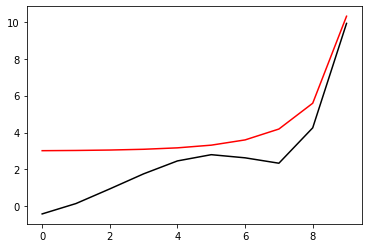

6834 54.44148223805445 -0.6576006605004086 1.042842357851719
[-0.4144051   0.1485346   0.94448986  1.76259207  2.46396309  2.80362846
  2.63359448  2.33813342  4.24846304  9.90941699]


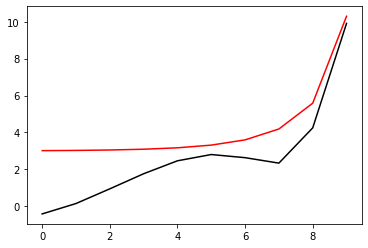

7035 53.38123207469797 -0.6572482452696067 1.0423551065587147
[-0.41838905  0.14539097  0.94359838  1.76430549  2.46741088  2.80862766
  2.6388518   2.34052897  4.24380676  9.90935969]


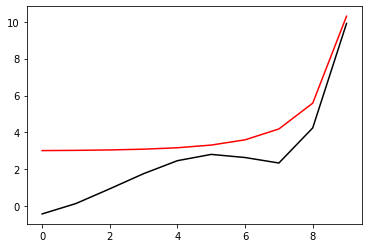

7236 45.460316315934456 -0.6569884272547815 1.0417933800619168
[-0.42238969  0.14221675  0.94265478  1.76595523  2.47080194  2.81357871
  2.64408015  2.3429148   4.2391499   9.90926926]


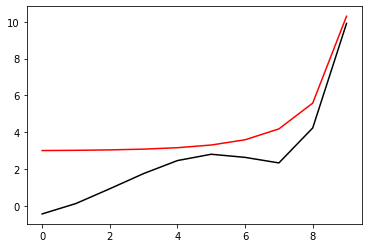

7437 53.62543176292746 -0.6567003054265578 1.0412748082374017
[-0.4263809   0.13903747  0.94168195  1.76755888  2.47414525  2.81847843
  2.64926079  2.34525444  4.23443854  9.90921315]


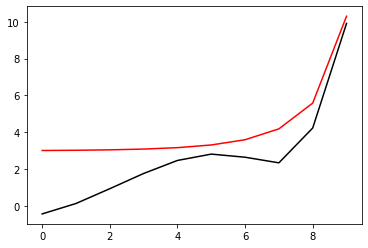

7638 49.865481634909 -0.6563522311986998 1.040852129574385
[-0.4303655   0.1358503   0.94067859  1.76911833  2.47744814  2.82334222
  2.65441938  2.34758527  4.22972142  9.90912009]


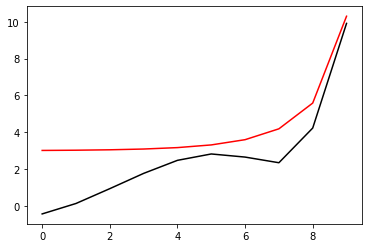

7839 53.59845245825052 -0.6560274255383147 1.0403715084086973
[-0.4342981   0.13270195  0.93969086  1.77067677  2.48074769  2.82819731
  2.65956908  2.34990234  4.22497293  9.90906422]


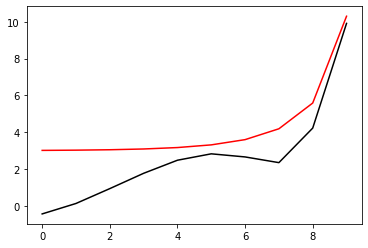

8040 53.077279579526305 -0.6557906153571982 1.039881103376837
[-0.43832659  0.12944802  0.93857982  1.77210363  2.48392626  2.83294553
  2.66463869  2.35216877  4.22019484  9.90897089]


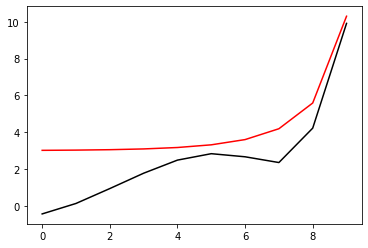

8241 60.383678921854376 -0.6555071076200181 1.0394019018930478
[-0.44227616  0.12625847  0.9375088   1.7735525   2.48712306  2.83770528
  2.66971803  2.35443827  4.21540011  9.90891168]


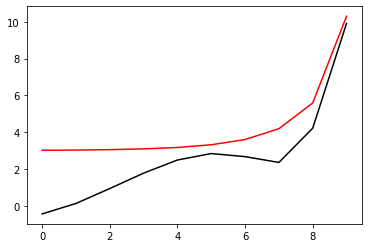

8442 47.591711179494865 -0.6552491365738524 1.0388531378241426
[-0.44614689  0.12313997  0.93649229  1.77504722  2.49037335  2.84252535
  2.67487029  2.35678762  4.21067565  9.90882205]


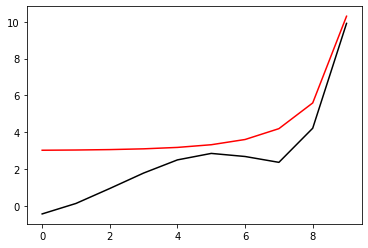

8643 49.48970894776066 -0.6549596541554396 1.0383228797673363
[-0.44996234  0.12006375  0.93549633  1.77654838  2.49363209  2.84735559
  2.68004157  2.35916152  4.20596782  9.90876219]


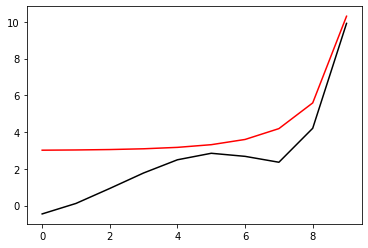

8844 54.420456109387956 -0.6546203264760505 1.0378377622282113
[-0.45370889  0.11704794  0.93454545  1.77808934  2.49694463  2.8522566
  2.68530964  2.36165462  4.20138435  9.90867556]


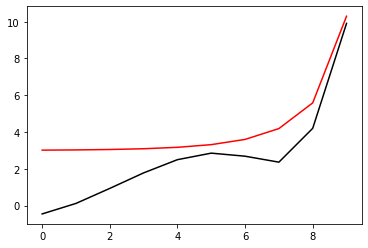

9045 53.37518296200072 -0.6542827153308428 1.037361911224001
[-0.4574464   0.11402944  0.9335707   1.77959189  2.50021963  2.85712072
  2.69054918  2.364126    4.19677505  9.90861906]


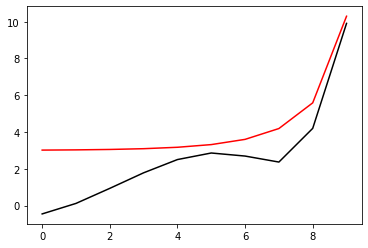

9246 45.44427486064679 -0.6540369108251605 1.0368126171651362
[-0.46120394  0.11097884  0.93254393  1.78103084  2.50343707  2.861936
  2.69575907  2.36658745  4.19216485  9.90852933]


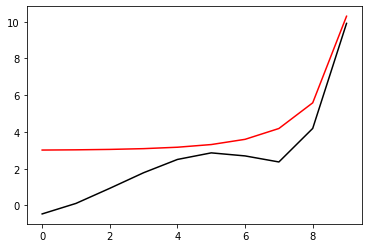

9447 53.62817617078435 -0.6537591369805664 1.0363112873925986
[-0.46495458  0.10792258  0.9314891   1.78242496  2.50660721  2.86670053
  2.70092174  2.36900354  4.18750079  9.90847396]


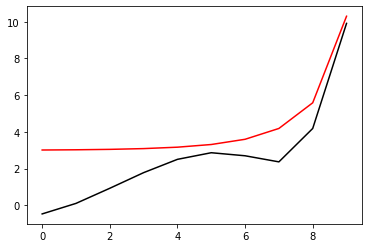

9648 49.88377858040671 -0.65341802074604 1.0359091642667055
[-0.46870009  0.10485882  0.93040581  1.78377709  2.5097384   2.87143086
  2.70606423  2.37141323  4.18283331  9.90838171]


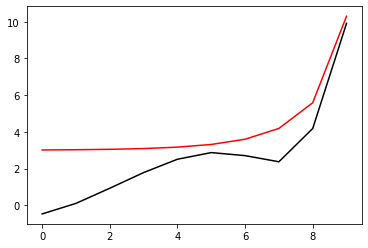

9849 53.57763473588498 -0.6530985682393127 1.0354506512813144
[-0.47239407  0.10183523  0.92934119  1.78513129  2.51286839  2.87615456
  2.71119944  2.37381064  4.17813512  9.9083266 ]


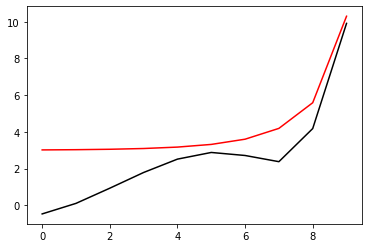

In [162]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, lam2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 60.383363100629566 -0.6527564670367576 1.0347583268805374
[-0.47856545  0.09682756  0.92773656  1.78779155  2.51877214  2.88504527
  2.72109565  2.37829842  4.17067664  9.90820016]


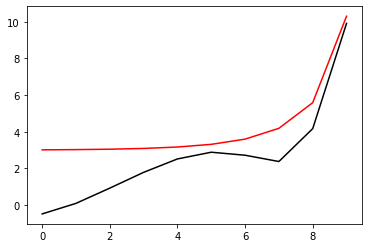

402 47.54905963912559 -0.6524898642577676 1.0342106252488734
[-0.48227179  0.0937563   0.92655603  1.78897689  2.5217129   2.88954995
  2.72597072  2.38032786  4.16542944  9.90811353]


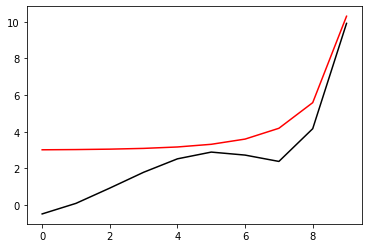

603 49.48445741993839 -0.6521967546793246 1.0336857395211303
[-0.48590989  0.09074691  0.92542711  1.79021271  2.52472223  2.89414771
  2.73097619  2.38252396  4.16036165  9.90804231]


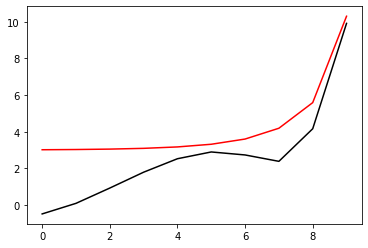

804 54.400447186420884 -0.6518611510115584 1.033205933329698
[-0.48947124  0.08780974  0.92436165  1.79151368  2.52781986  2.89886459
  2.73614537  2.38493047  4.15553149  9.90795453]


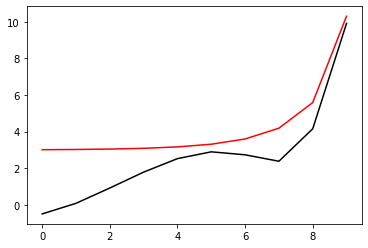

1005 53.36985882912814 -0.6515319679729251 1.0327341923498372
[-0.49301638  0.08488     0.92328681  1.79279444  2.53090273  2.90357488
  2.7413274   2.38737412  4.150753    9.90789403]


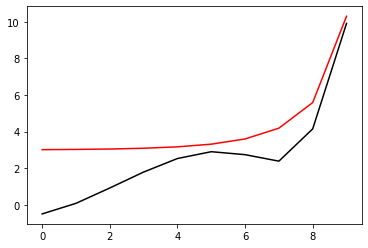

1206 45.429906899162795 -0.651295179140494 1.0321920654513321
[-0.49657864  0.08192355  0.92216847  1.79402201  2.53394053  2.90825305
  2.74650368  2.38984524  4.14602676  9.90780284]


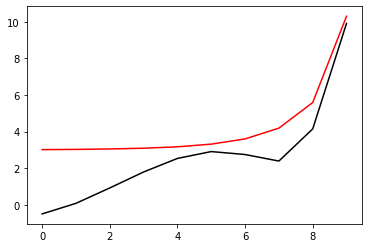

1407 53.63148298713502 -0.6510242120642324 1.031703262128897
[-0.50013209  0.07896565  0.92102891  1.79521266  2.5369396   2.91289113
  2.75164761  2.39229599  4.14128468  9.90774606]


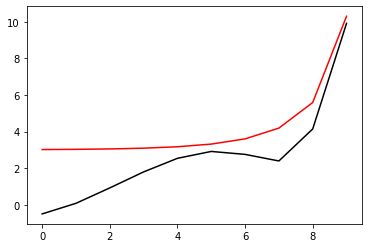

1608 49.90128548282112 -0.6506880734079264 1.0313166445476452
[-0.50367857  0.07600409  0.91986688  1.79636775  2.53990599  2.91750237
  2.75678161  2.39475884  4.13656866  9.90765318]


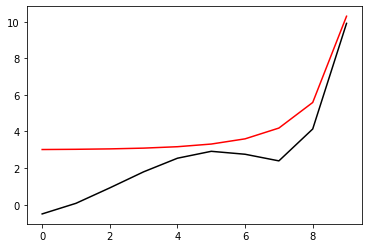

1809 53.558841185692046 -0.6503725679532883 1.0308758385918
[-0.50717124  0.07308688  0.9187296   1.79753108  2.54287654  2.92211229
  2.7619148   2.39722171  4.13184279  9.90759754]


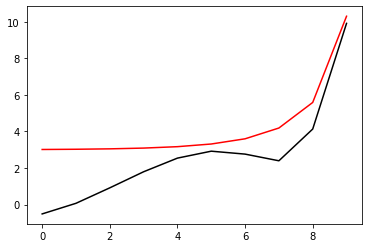

2010 53.04349972675162 -0.6501484837561952 1.0304173409277484
[-0.51076183  0.07006531  0.91747315  1.79856635  2.54572706  2.92661571
  2.76696913  2.39964142  4.12710323  9.90750496]


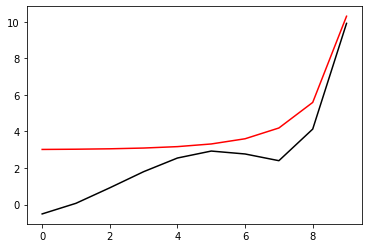

2211 60.381729937239115 -0.6498814058146316 1.0299679211416
[-0.51427623  0.0671088   0.91626062  1.79962728  2.54859698  2.93113075
  2.77203257  2.40206711  4.12235532  9.90744638]


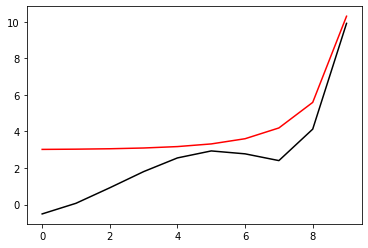

2412 47.51289621399846 -0.6496364005841991 1.0294543540175805
[-0.51771306  0.06422535  0.91510776  1.80073906  2.55152318  2.93570834
  2.77717105  2.40457824  4.11768773  9.90735768]


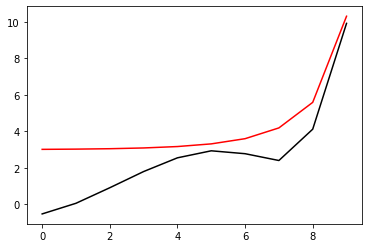

2613 49.479935631103515 -0.6493607213048231 1.0289591912836626
[-0.5210977   0.06138443  0.91397889  1.80186055  2.55445871  2.94029615
  2.78232807  2.40711656  4.11304372  9.90729884]


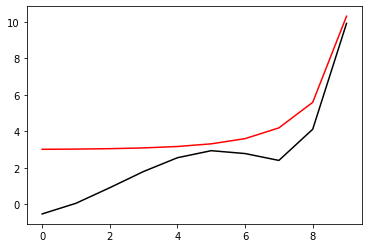

2814 54.38402131511635 -0.6490430063795719 1.0285022969857105
[-0.52441948  0.05860091  0.91289515  1.80302189  2.55744623  2.9449531
  2.78758112  2.40977752  4.10853218  9.90721325]


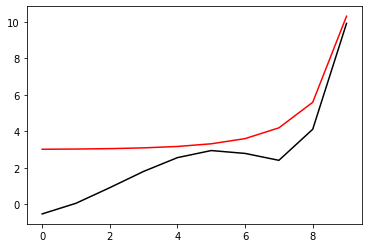

3015 53.36440616533502 -0.6487317497408438 1.0280474780846827
[-0.52773377  0.0558163   0.91179227  1.80414947  2.56039847  2.94957461
  2.79280661  2.41242049  4.10400231  9.90715814]


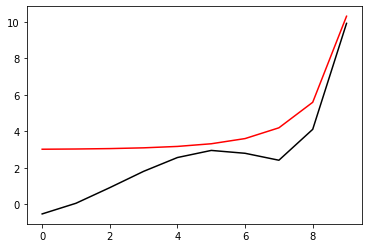

3216 45.41631388871315 -0.6485105883055509 1.027521446593906
[-0.53107364  0.05299726  0.91063814  1.80521405  2.56329129  2.95414462
  2.7979994   2.41505337  4.09947501  9.90706962]


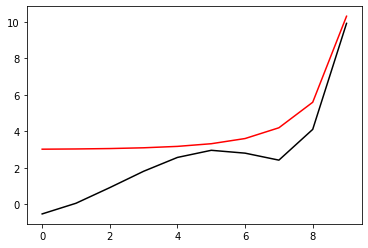

3417 53.63469934942121 -0.648251133156168 1.0270517261211802
[-0.5344111   0.05017156  0.90945837  1.80623646  2.56613732  2.95866367
  2.80314416  2.41764236  4.09489848  9.90701564]


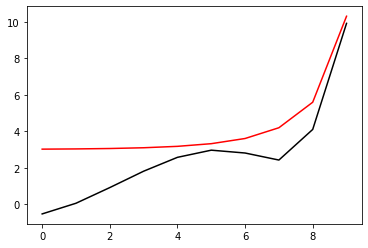

3618 49.91851461543581 -0.6479238077241584 1.0266851078528616
[-0.53774599  0.04733901  0.90825411  1.80722113  2.56894663  2.96315038
  2.80827042  2.4202291   4.09032541  9.9069249 ]


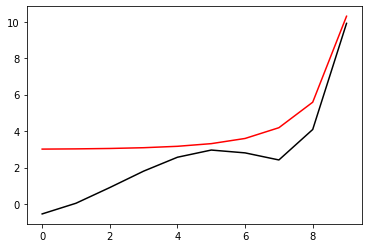

3819 53.5407669369836 -0.6476151579023232 1.0262650080762192
[-0.54102965  0.04454956  0.90707479  1.80821441  2.57175911  2.96763397
  2.81339172  2.42280674  4.08572582  9.90687129]


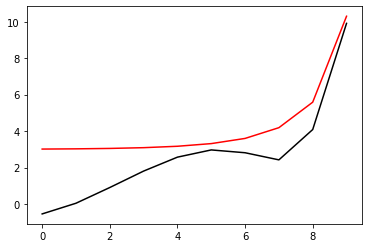

4020 53.02811911213539 -0.6473988426913518 1.0258232304511958
[-0.54441461  0.04165366  0.90577568  1.80907934  2.57445017  2.9720093
  2.81843103  2.42533466  4.08110012  9.90678052]


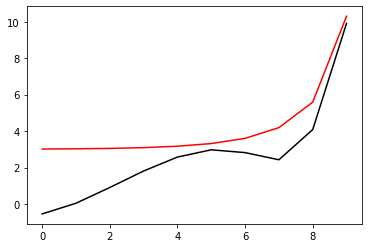

4221 60.38086014655853 -0.6471407857542305 1.0253891887459792
[-0.54772698  0.03882058  0.90451986  1.80996978  2.57715961  2.97639503
  2.82347688  2.4278627   4.07645457  9.90672353]


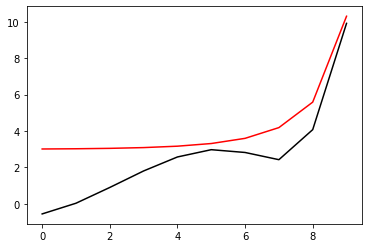

4422 47.477783689976356 -0.6469027769381807 1.0248931874020708
[-0.55096416  0.0360595   0.90332429  1.81091223  2.57992584  2.980844
  2.8285977   2.43047351  4.07188165  9.90663632]


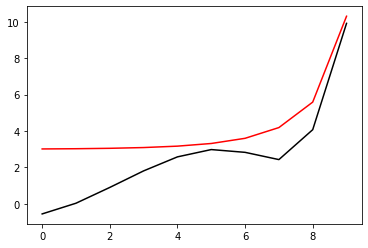

4623 49.47561373824692 -0.6466342581325922 1.0244153140905992
[-0.55415215  0.03333938  0.90215292  1.8118653   2.58270173  2.98530375
  2.83373708  2.43310947  4.06732603  9.90657891]


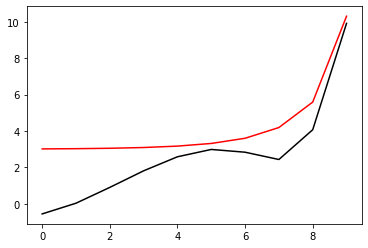

4824 54.367619222534145 -0.6463270142118838 1.0239725056771416
[-0.55728148  0.03067374  0.90102544  1.81285772  2.58552876  2.9898325
  2.83897253  2.43586709  4.06289866  9.90649457]


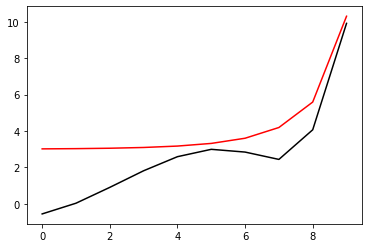

5025 53.3594603326521 -0.6460283094692708 1.023528459262895
[-0.56040521  0.02800654  0.89988018  1.81381849  2.58832221  2.99432793
  2.84418237  2.43860751  4.0584507   9.90644083]


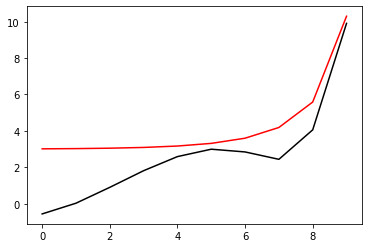

5226 45.40383933082839 -0.6458187607018276 1.0230140923534512
[-0.56355782  0.02530302  0.89868352  1.81471678  2.59105617  2.99877204
  2.84935955  2.44133695  4.05400187  9.90635348]


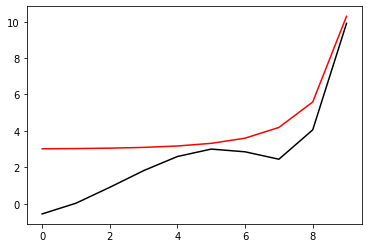

5427 53.63853070009051 -0.6455679845032095 1.0225597300986662
[-0.56671094  0.02259143  0.89746173  1.81557424  2.59374423  3.00316639
  2.85448971  2.44402276  4.04950184  9.90630073]


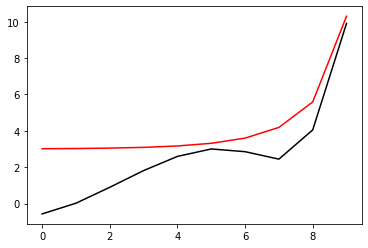

5628 49.93532302322549 -0.6452478255752943 1.0222093993671997
[-0.56986341  0.0198725   0.89621676  1.81639597  2.59639709  3.00753027
  2.85960321  2.44670766  4.04500463  9.9062112 ]


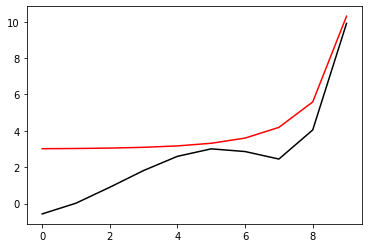

5829 53.52383790271419 -0.6449449006864594 1.021806751842811
[-0.57296528  0.01719749  0.89499936  1.81722971  2.59905597  3.01189395
  2.86471423  2.44938498  4.04048004  9.90615873]


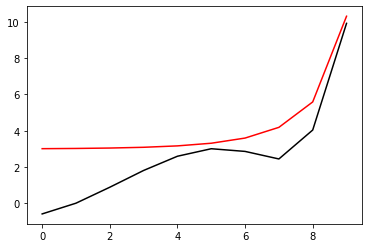

6030 53.01408371598965 -0.6447352826543343 1.0213793527342105
[-0.57617033  0.01441542  0.89366321  1.8179366   2.60159415  3.01615011
  2.86974385  2.45201299  4.03592846  9.90606919]


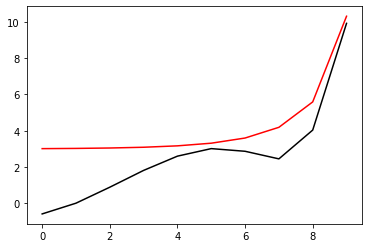

6231 60.380121931630256 -0.6444851588708295 1.020958748812712
[-0.57930515  0.01169514  0.89237104  1.81867029  2.60415125  3.02041704
  2.87477976  2.45464001  4.03135401  9.90601327]


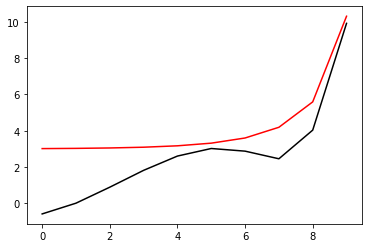

6432 47.445112157028674 -0.6442531522984517 1.0204785101975176
[-5.82366083e-01  9.04682468e-03  8.91140728e-01  1.81945820e+00
  2.60676668e+00  3.02474879e+00  2.87989191e+00  2.45735056e+00
  4.02685115e+00  9.90592718e+00]


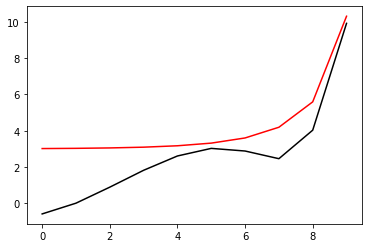

6633 49.47160937808148 -0.6439908710259135 1.0200162461559892
[-5.85380043e-01  6.43857118e-03  8.89935428e-01  1.82025814e+00
  2.60939252e+00  3.02909203e+00  2.88502296e+00  2.46008622e+00
  4.02236417e+00  9.90587086e+00]


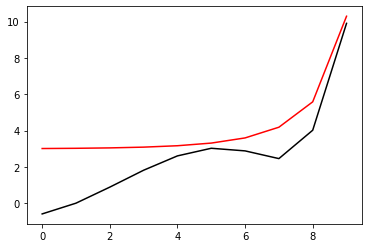

6834 54.35208076728934 -0.6436929946932014 1.0195861783983906
[-5.88338878e-01  3.88244015e-03  8.88773295e-01  1.82109734e+00
  2.61206888e+00  3.03350400e+00  2.89025019e+00  2.46294411e+00
  4.01800531e+00  9.90578755e+00]


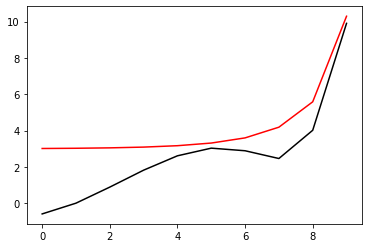

7035 53.35481772859511 -0.6434057239379817 1.0191518924623655
[-5.91293585e-01  1.32456487e-03  8.87594905e-01  1.82190708e+00
  2.61471324e+00  3.03788429e+00  2.89545329e+00  2.46578636e+00
  4.01362668e+00  9.90573497e+00]


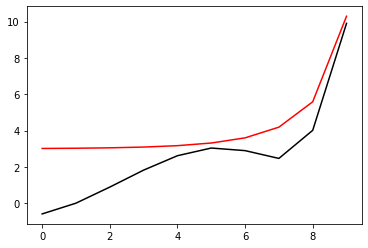

7236 45.39236822094616 -0.6432067166695842 1.01864822266419
[-5.94279851e-01 -1.27104608e-03  8.86365348e-01  1.82265510e+00
  2.61729806e+00  3.04221303e+00  2.90062322e+00  2.46861728e+00
  4.00924624e+00  9.90564865e+00]


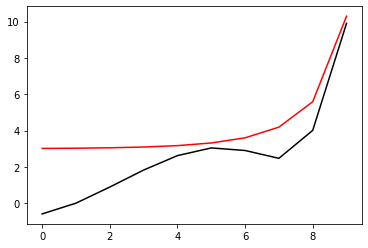

7437 53.642808731789465 -0.6429637929575486 1.018208042524759
[-5.97269203e-01 -3.87588451e-03  8.85111288e-01  1.82336361e+00
  2.61983766e+00  3.04649261e+00  2.90574648e+00  2.47140502e+00
  4.00481458e+00  9.90559699e+00]


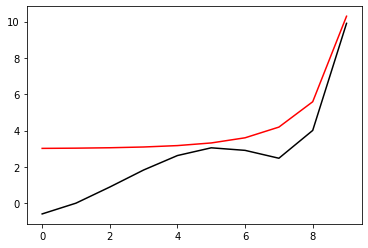

7638 49.95167873724704 -0.6426504709388211 1.0178723390966016
[-6.00259542e-01 -6.48844693e-03  8.83835351e-01  1.82403834e+00
  2.62234334e+00  3.05074294e+00  2.91085413e+00  2.47419313e+00
  4.00038655e+00  9.90550856e+00]


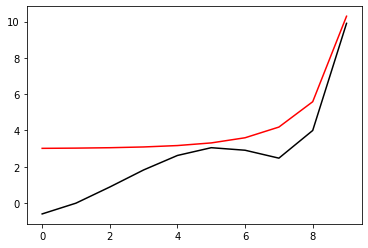

7839 53.50782147734352 -0.6423530587977498 1.0174853792293388
[-6.03199574e-01 -9.05606366e-03  8.82589775e-01  1.82472855e+00
  2.62485786e+00  3.05499568e+00  2.91596137e+00  2.47697539e+00
  3.99593182e+00  9.90545716e+00]


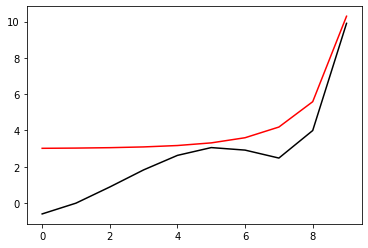

8040 53.00125315942872 -0.6421497741615562 1.0170710721095901
[-0.60624433 -0.01173113  0.88122658  1.82529351  2.6272524   3.05914132
  2.92098738  2.47970898  3.99145064  9.90536879]


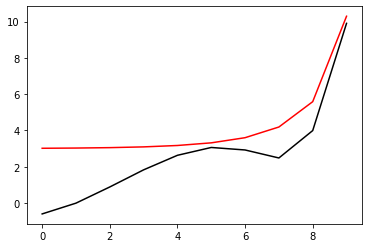

8241 60.37949327151196 -0.6419070404940704 1.0166627668476012
[-0.60922089 -0.01434523  0.87990819  1.82588668  2.62966644  3.06329788
  2.92601909  2.48244059  3.98694469  9.90531389]


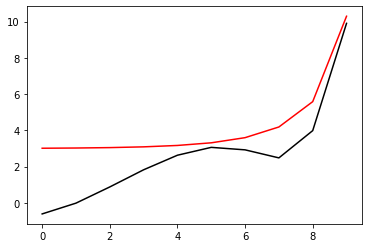

8442 47.414479423026776 -0.6416804592423688 1.0161970843699732
[-0.61212455 -0.0168872   0.87865341  1.82653639  2.63214043  3.06752072
  2.9311281   2.48525666  3.9825103   9.90522891]


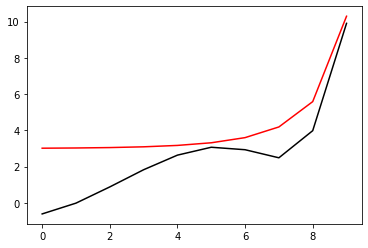

8643 49.467868885852845 -0.6414238108110617 1.0157492374498196
[-0.61498324 -0.01938993  0.87742445  1.82719958  2.63462554  3.07175546
  2.93625598  2.48809779  3.97809112  9.90517367]


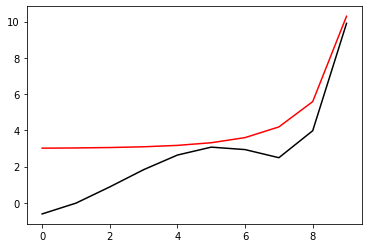

8844 54.33719306339482 -0.6411344831447765 1.015330939783881
[-0.61779012 -0.02184281  0.87623793  1.82790192  2.63716051  3.07605846
  2.94147984  2.49106175  3.97380062  9.90509138]


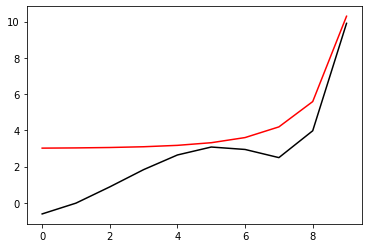

9045 53.35042113227648 -0.6408577990729035 1.0149056546982156
[-0.62059433 -0.02429771  0.87503654  1.82857691  2.63966499  3.08033116
  2.94668076  2.49401163  3.96949176  9.90503997]


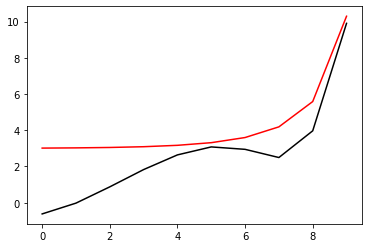

9246 45.38181585453215 -0.640668501982227 1.0144118996563076
[-0.62343245 -0.02679154  0.87378435  1.82919108  2.64211003  3.08455205
  2.95184789  2.49694988  3.96518071  9.90495468]


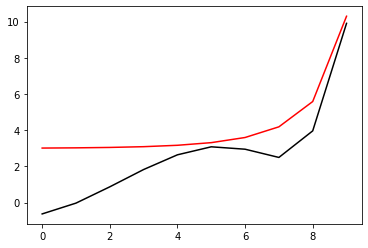

9447 53.64756947371274 -0.6404327766806873 1.0139849398504894
[-0.62627612 -0.02929581  0.87250817  1.82976701  2.64451049  3.0887242
  2.9569684   2.4998453   3.96081873  9.90490415]


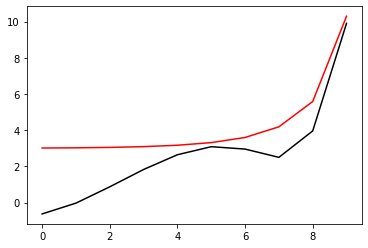

9648 49.967639519416764 -0.6401260326296563 1.013662507523479
[-0.62912238 -0.03180825  0.87121128  1.830311    2.64687822  3.09286806
  2.962074    2.50274214  3.95646129  9.90481683]


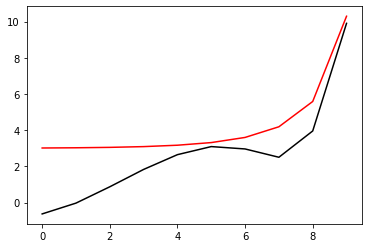

9849 53.492529026469896 -0.639833981451645 1.0132897195390846
[-0.63191852 -0.03427471  0.86994748  1.83087397  2.64925771  3.09701696
  2.96718124  2.50563499  3.95207819  9.90476652]


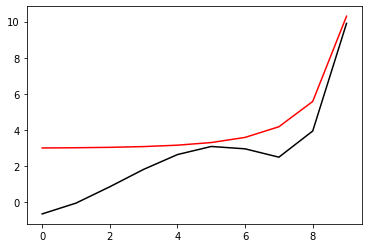

In [163]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, lam2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 60.37948929812633 -0.6395134971362788 1.0126573853948595
[-0.63674273 -0.03849342  0.8678662   1.83207197  2.65381724  3.10494977
  2.9761889   2.51127786  3.94561129  9.90465599]


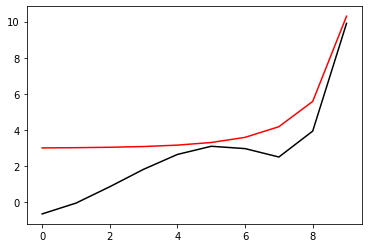

402 47.38442510390277 -0.6392817458843 1.0121944855995566
[-0.63956026 -0.04099376  0.86652549  1.83251058  2.656046    3.10892482
  2.98111175  2.51391346  3.94082133  9.90457679]


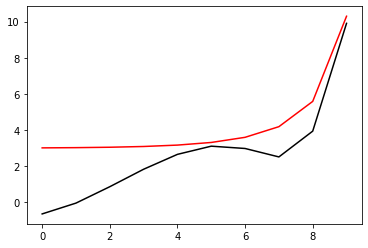

603 49.46427137739363 -0.6390227439730082 1.0117515441552458
[-0.64231998 -0.04343872  0.86523414  1.83299542  2.65832916  3.11296986
  2.98613033  2.51667084  3.93615188  9.90451007]


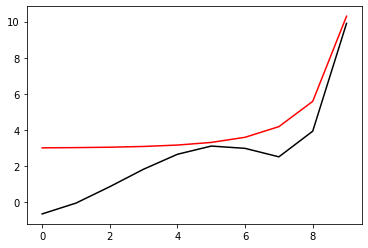

804 54.321941884038154 -0.6387358262825963 1.0113377728013553
[-0.64502184 -0.04582582  0.86399792  1.83353773  2.66068683  3.11711713
  2.99129143  2.51961499  3.93169018  9.90442905]


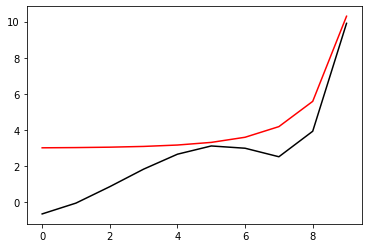

1005 53.34640725613102 -0.6384651250644555 1.0109159701822372
[-0.64771602 -0.04820827  0.86275708  1.83406673  2.66303159  3.1212569
  2.99645968  2.52258807  3.92726754  9.90437488]


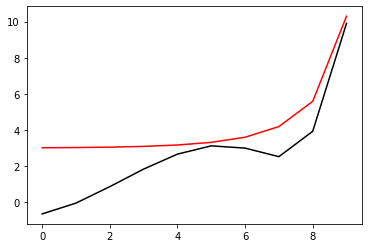

1206 45.3723878876826 -0.6382819478179496 1.0104278356109784
[-0.65044136 -0.05062553  0.86147234  1.83454426  2.66532793  3.12535855
  3.00161212  2.52557753  3.9228835   9.90428869]


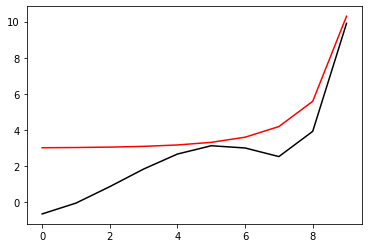

1407 53.6530585775899 -0.6380506842320588 1.0100103323614213
[-0.65317131 -0.05305084  0.86016852  1.83499043  2.66758746  3.12942056
  3.00672936  2.52854323  3.91847866  9.90423731]


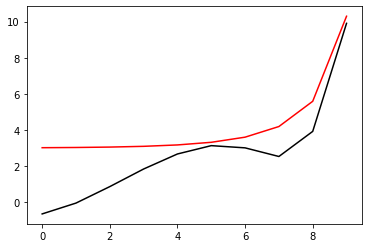

1608 49.9830783362698 -0.6377485911584359 1.0096975776991965
[-0.65590293 -0.05548219  0.85884827  1.83541041  2.66982021  3.13346077
  3.01183949  2.5315244   3.9141019   9.90414979]


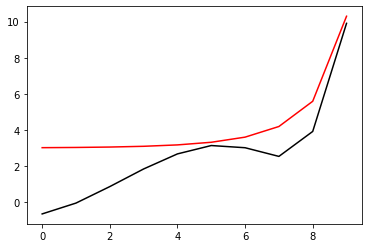

1809 53.478125995561506 -0.637460499033104 1.0093356601874497
[-0.6585826  -0.05786445  0.85756634  1.83585595  2.67207123  3.1375125
  3.01695793  2.53451261  3.90971786  9.90409938]


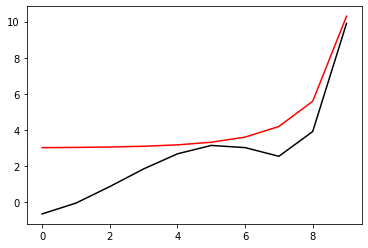

2010 52.979442856577315 -0.6372680725961318 1.0089428414604125
[-0.6613681  -0.06035314  0.856171    1.83618179  2.67420631  3.14146017
  3.02199792  2.53746     3.90532308  9.90401255]


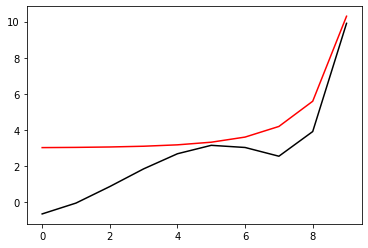

2211 60.37862599015881 -0.6370378714796231 1.0085550495713014
[-0.66408783 -0.06278104  0.85482367  1.83654061  2.67636428  3.14542081
  3.027044    2.54040808  3.90091086  9.90395896]


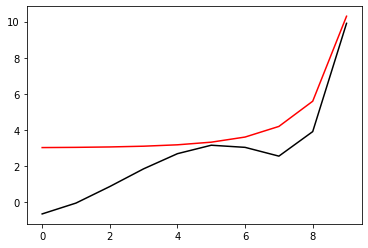

2412 47.3582401515675 -0.6368198654837752 1.008114330722484
[-0.66673508 -0.06513519  0.85354474  1.83696229  2.6785873   3.14945198
  3.03217063  2.54344627  3.89657944  9.9038757 ]


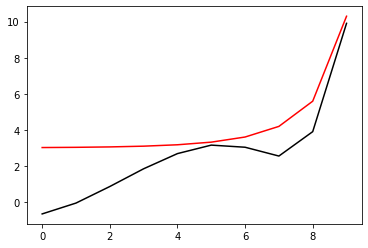

2613 49.46107477840257 -0.6365721998322578 1.0076912820926944
[-0.66934037 -0.06745095  0.85229399  1.83740123  2.68082379  3.15349616
  3.03731585  2.54651135  3.89226878  9.90382215]


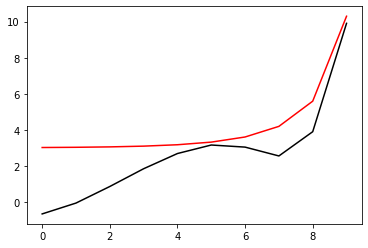

2814 54.30870692229959 -0.6362972176718733 1.0072931077329936
[-0.67189961 -0.06972076  0.85108473  1.8378798   2.68310956  3.15760773
  3.04255634  2.54970214  3.88809393  9.90374159]


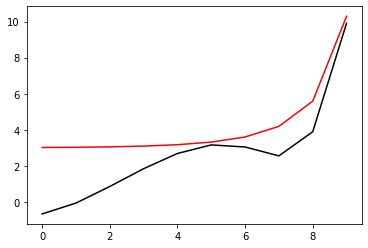

3015 53.34225884628599 -0.6360390623880026 1.006882927430141
[-0.67445881 -0.07199307  0.84986335  1.83833538  2.68536808  3.16169144
  3.04777547  2.5528828   3.88390832  9.90369227]


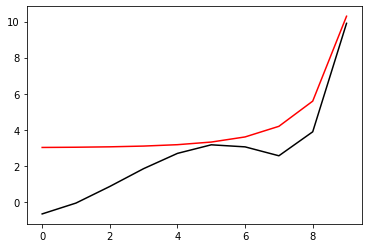

3216 45.36340890637006 -0.6358666063383922 1.0064061318880322
[-0.67705539 -0.07430576  0.8485927   1.83873291  2.6875683   3.16572308
  3.05295923  2.55605216  3.87972385  9.90360886]


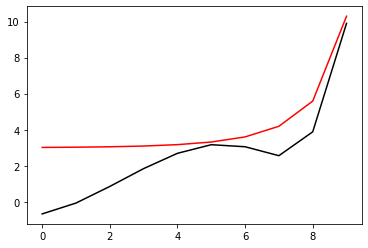

3417 53.65874522094544 -0.635643194338108 1.0060023396207023
[-0.67966211 -0.07663118  0.84729904  1.83909481  2.6897254   3.16970636
  3.05809545  2.55917936  3.87549185  9.90356043]


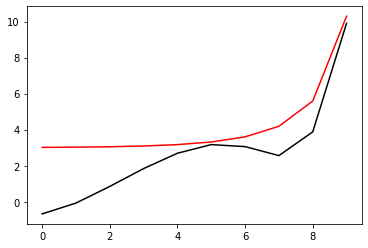

3618 49.99843213117212 -0.6353485116731306 1.005702311707182
[-0.68227446 -0.07896579  0.8459867   1.83942826  2.69185199  3.17366256
  3.06321688  2.56230964  3.87126813  9.90347521]


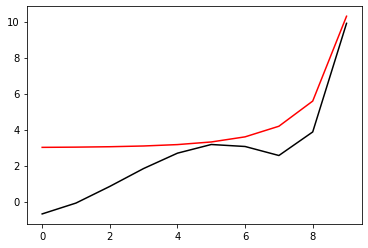

3819 53.46372392478245 -0.6350664810055338 1.0053532162547543
[-0.68483673 -0.08125221  0.84471296  1.839788    2.69399672  3.1776293
  3.06834391  2.56544019  3.86702335  9.90342701]


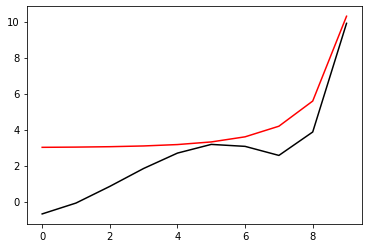

4020 52.9698569718177 -0.6348803537913891 1.004971390706333
[-0.6875072  -0.08364657  0.84332552  1.84002826  2.69602502  3.18149099
  3.07339057  2.56852538  3.86275792  9.90334226]


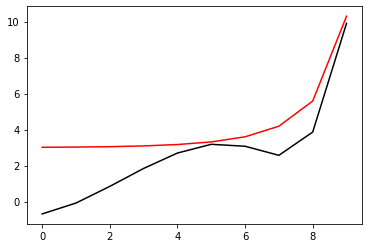

4221 60.37832205935595 -0.6346568022520533 1.004593900278492
[-0.69011463 -0.08598194  0.84198554  1.84030162  2.69807577  3.18536476
  3.07844132  2.57160639  3.85846467  9.90329051]


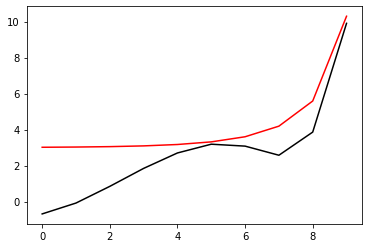

4422 47.33143722813743 -0.6344431212231284 1.0041653444136207
[-0.69265084 -0.088244    0.84071481  1.84063939  2.70019275  3.1893101
  3.08357311  2.57477574  3.85424532  9.90320902]


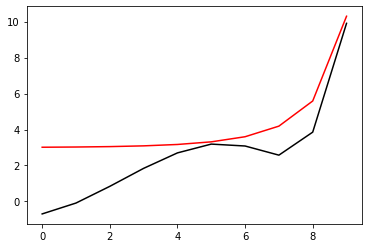

4623 49.45787860063327 -0.6341997810374251 1.003754182529102
[-0.69514754 -0.09046919  0.8394721   1.84099507  2.70232355  3.19326871
  3.08872325  2.57796993  3.8500404   9.90315717]


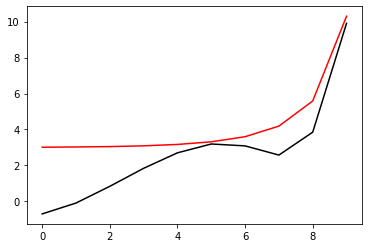

4824 54.29449967248603 -0.6339315394776943 1.0033655511861013
[-0.69760186 -0.09265131  0.83826931  1.84138963  2.70450273  3.19729416
  3.09396844  2.58128891  3.84596711  9.90307813]


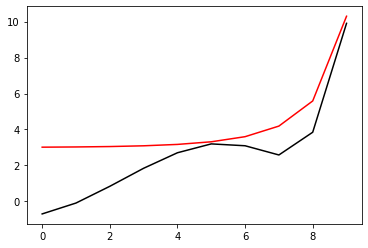

5025 53.33828995420214 -0.6336822492275443 1.002962347759036
[-0.70005829 -0.09483709  0.83705476  1.8417626   2.7066561   3.20129347
  3.09919411  2.58459886  3.84188121  9.90303047]


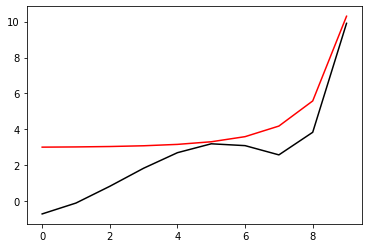

5226 45.35523155503553 -0.633517684349146 1.0024933628688575
[-0.70255398 -0.09706423  0.83579137  1.84207881  2.70875219  3.20524165
  3.10438513  2.58789738  3.83779352  9.90294851]


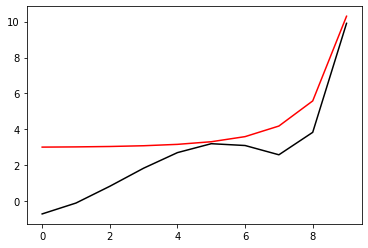

5427 53.66543203111409 -0.6332999797433829 1.0021003564161866
[-0.70506267 -0.09930587  0.83450476  1.84236022  2.71080591  3.2091423
  3.1095293   2.59115376  3.83365596  9.90290162]


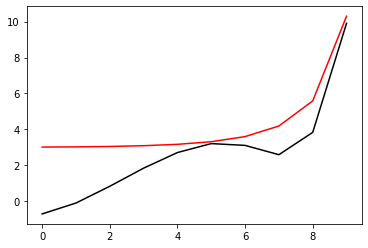

5628 50.013818042574336 -0.633011243720699 1.0018103374959668
[-0.70757904 -0.10155782  0.8331998   1.84261443  2.7128302   3.2130169
  3.11465953  2.59441353  3.82952472  9.90281783]


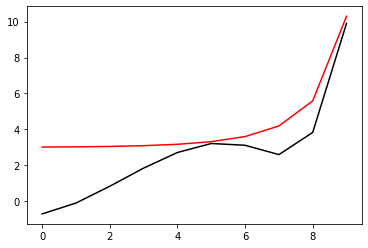

5829 53.44951111335116 -0.6327342681035568 1.0014715317652645
[-0.71004568 -0.10376086  0.83193576  1.84289838  2.71487613  3.21690564
  3.11979866  2.59767593  3.82537205  9.90277105]


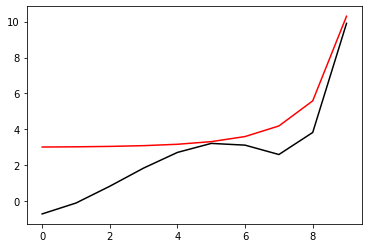

6030 52.96150592498414 -0.6325535738253666 1.0010988435672434
[-0.71262171 -0.10607205  0.83055929  1.84306505  2.71680763  3.22069126
  3.12485933  2.60089489  3.82119923  9.90268783]


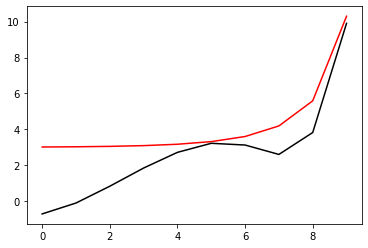

6231 60.37818926486541 -0.632335726998807 1.0007301028775217
[-0.71513646 -0.10832505  0.82923099  1.84326651  2.71876309  3.2244902
  3.12992471  2.60410934  3.81699593  9.90263743]


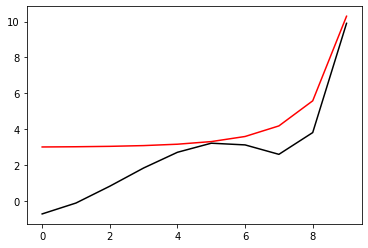

6432 47.30505738164365 -0.6321253780604149 1.0003122969309086
[-0.71758046 -0.11050428  0.82797382  1.84353521  2.7207875   3.22836341
  3.13507354  2.60741386  3.81286589  9.90255739]


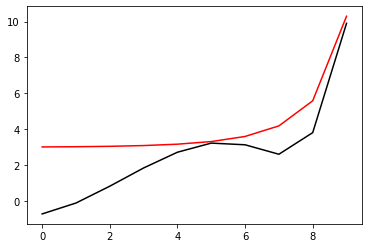

6633 49.454796034689714 -0.6318854197323621 0.9999116729541376
[-0.71998689 -0.11264763  0.82674516  1.84382326  2.722827    3.23225092
  3.14024131  2.61074325  3.80874846  9.90250692]


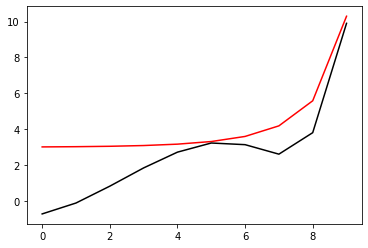

6834 54.27998164676076 -0.6316229885968835 0.9995313473192872
[-0.72235422 -0.11475036  0.82555534  1.84415003  2.72491464  3.23620522
  3.14550444  2.61419821  3.80476237  9.9024292 ]


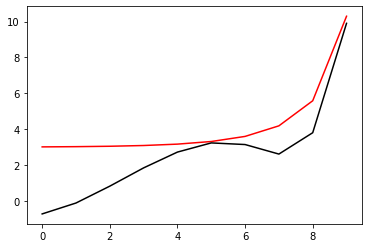

7035 53.33436739115857 -0.6313818541884948 0.9991339271714302
[-0.72472573 -0.11685778  0.82435431  1.8444569   2.72697823  3.24013524
  3.15074995  2.61764623  3.80076478  9.90238301]


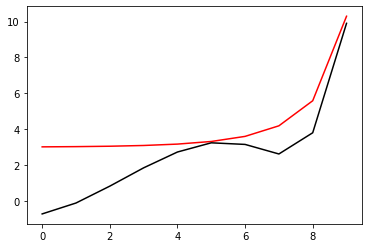

7236 45.34776957939373 -0.6312244429891156 0.9986716725524131
[-0.72713789 -0.11900699  0.82310544  1.84470891  2.72898619  3.24401547
  3.15596173  2.62108365  3.79676511  9.90230237]


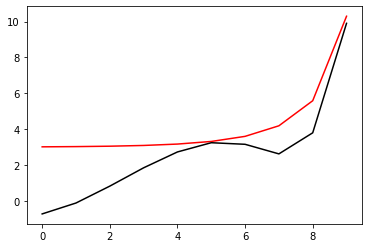

7437 53.67309592250228 -0.631011818918753 0.9982883684100332
[-0.72956585 -0.12117242  0.82183325  1.8449271   2.73095271  3.2478489
  3.16112704  2.62447922  3.79271497  9.9022569 ]


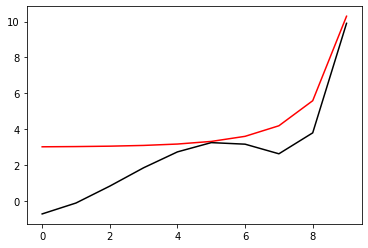

7638 50.02934420505979 -0.6307286784041408 0.9980070876219677
[-0.73200356 -0.12334925  0.82054307  1.84511942  2.73289096  3.25165715
  3.16627891  2.6278786   3.78867056  9.90217446]


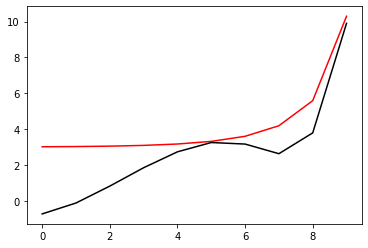

7839 53.435264310652855 -0.6304565697221909 0.997677096957387
[-0.73439184 -0.12547633  0.81929634  1.84534523  2.73485472  3.25548336
  3.17144307  2.6312835   3.78460588  9.90212902]


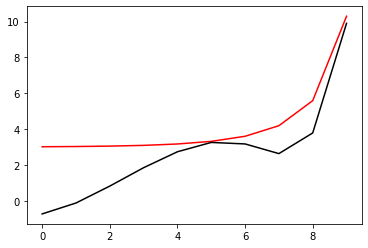

8040 52.95429930215629 -0.6302810457250444 0.997312466308723
[-0.73689052 -0.12771154  0.81793871  1.84545631  2.73670648  3.25920869
  3.17653088  2.63464752  3.78052321  9.90204731]


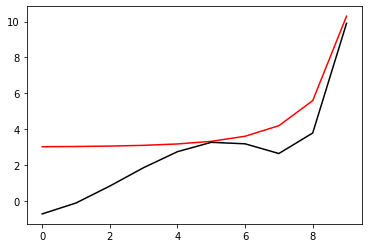

8241 60.37823153841092 -0.6300684314359012 0.9969515165752477
[-0.73932958 -0.12988915  0.81663021  1.8456042   2.73858416  3.26294894
  3.1816242   2.63800711  3.77640854  9.90199823]


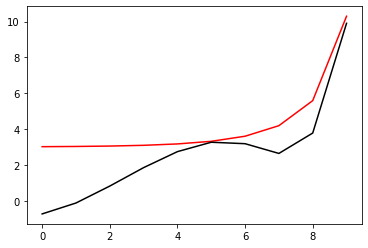

8442 47.27872529540127 -0.6298607437067598 0.9965435268525697
[-0.74169816 -0.13199231  0.81539502  1.84582257  2.74053402  3.26676655
  3.18680371  2.64145905  3.77236754  9.90191963]


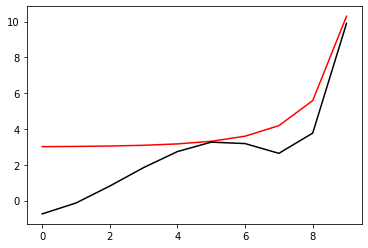

8643 49.451813392973904 -0.6296234683827225 0.9961524732025799
[-0.74403107 -0.13406047  0.81418896  1.84606194  2.74250049  3.27059966
  3.19200275  2.64493606  3.76833802  9.90187055]


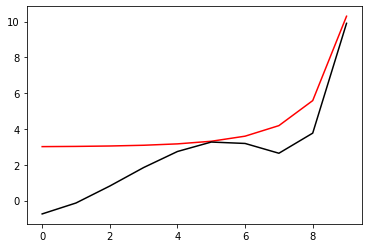

8844 54.264940895990044 -0.6293661525087931 0.99577947677177
[-0.74632824 -0.13609046  0.81302069  1.84633995  2.74451506  3.2744996
  3.19729747  2.64853964  3.76444017  9.90179416]


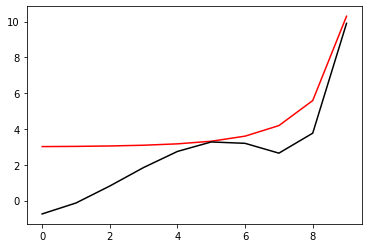

9045 53.330418186893695 -0.6291327218354061 0.9953867907888602
[-0.74863189 -0.13812634  0.81184166  1.84659975  2.74650747  3.27837721
  3.20257651  2.65213857  3.76053259  9.90174947]


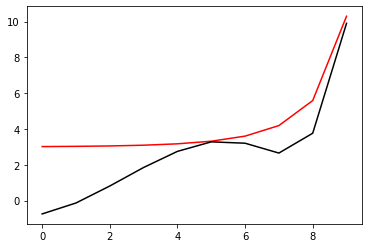

9246 45.34097234482519 -0.6289819080854653 0.9949303128941241
[-0.75097734 -0.14020412  0.81061619  1.84680709  2.74844651  3.28220691
  3.2078232   2.65572824  3.75662338  9.90167019]


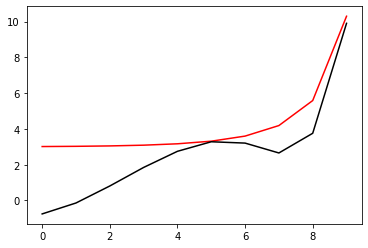

9447 53.6819724323988 -0.6287738763458028 0.9945557703047289
[-0.75334159 -0.14229995  0.80936719  1.84698159  2.75034515  3.28599061
  3.21302374  2.65927637  3.75266335  9.90162619]


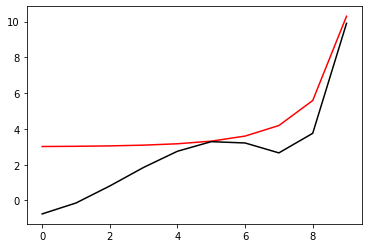

9648 50.04525431151082 -0.6284961028504428 0.9942820932628108
[-0.75571792 -0.14440845  0.80810047  1.84713152  2.75221673  3.28975
  3.21821121  2.66282861  3.74870849  9.90154513]


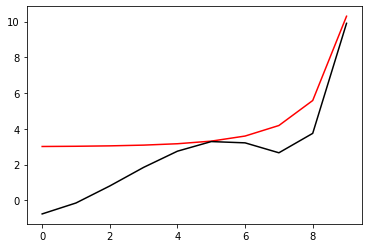

9849 53.42072866326018 -0.6282287987781896 0.9939595138751063
[-0.75804526 -0.14646638  0.80687977  1.84731889  2.7541181   3.29353162
  3.22341482  2.6663897   3.744735    9.90150109]


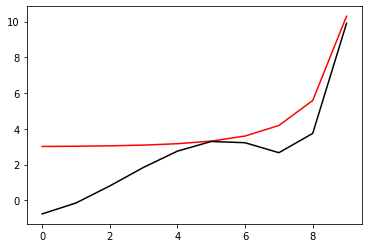

In [164]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, lam2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 60.37871363507767 -0.6278997968742703 0.9933182051577304
[-0.76236497 -0.15027202  0.80460389  1.84762443  2.7576432   3.30069475
  3.23257661  2.67336308  3.73939772  9.90140887]


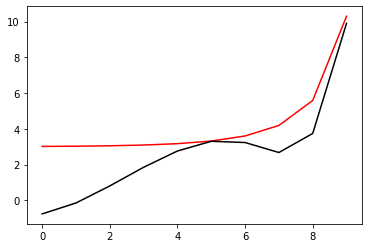

402 47.25118609216456 -0.6276892939948138 0.9929151486751182
[-0.7647076  -0.15234016  0.80335605  1.8477553   2.75946698  3.30438745
  3.23770591  2.67682373  3.73521646  9.90133513]


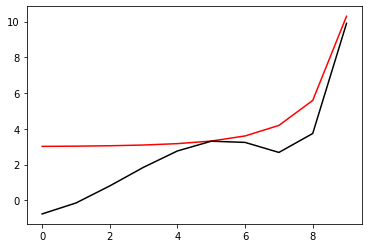

603 49.44886508284812 -0.6274501552948742 0.9925289396700421
[-0.76700687 -0.15436338  0.8021521   1.84792803  2.76133434  3.30813029
  3.24289905  2.6803599   3.73108231  9.90128039]


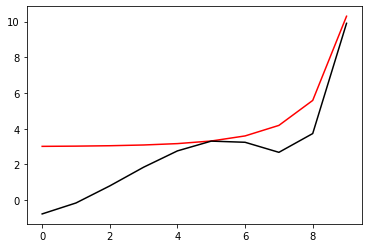

804 54.24850642162883 -0.6271943664407499 0.9921591926210949
[-0.76926861 -0.15634537  0.80099217  1.84814949  2.76326352  3.31195821
  3.24821212  2.68405518  3.72711508  9.90120706]


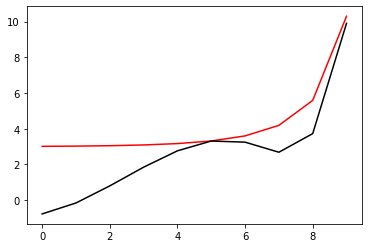

1005 53.326472204605814 -0.6269662078723411 0.9917676297186758
[-0.77153582 -0.15833089  0.79982667  1.84836106  2.76518134  3.31577709
  3.25352569  2.68776862  3.72316763  9.90116094]


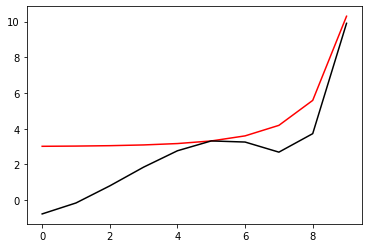

1206 45.334956798108884 -0.6268199868454187 0.9913139986093435
[-0.77384285 -0.16035514  0.79862021  1.84852799  2.76705496  3.3195581
  3.25881795  2.69148892  3.71924182  9.9010816 ]


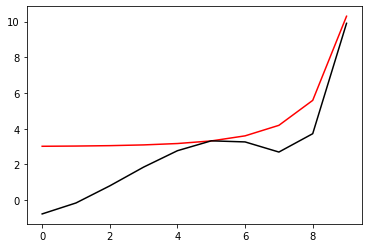

1407 53.69256014140284 -0.6266148022645676 0.9909456800321664
[-0.77617001 -0.16239746  0.79739252  1.84866657  2.76889372  3.32329901
  3.26406991  2.69517746  3.71528223  9.90103748]


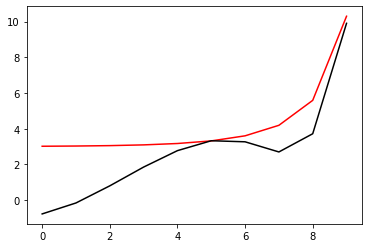

1608 50.06175159187704 -0.6263410703987101 0.9906771324797371
[-0.77851043 -0.1644524   0.79614922  1.84878452  2.77071001  3.32702008
  3.26931277  2.69887743  3.71134163  9.90095671]


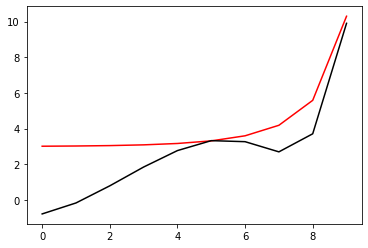

1809 53.4058203444247 -0.6260777055088278 0.9903593897849965
[-0.7808014  -0.16645487  0.79495619  1.84894629  2.77256346  3.33077092
  3.27457864  2.70259527  3.70739623  9.900913  ]


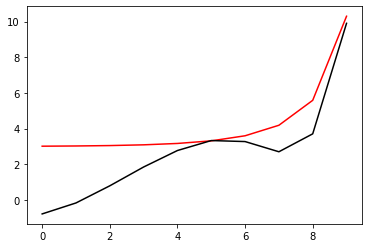

2010 52.94358891746399 -0.6259114670304087 0.9900070107614759
[-0.78320373 -0.1685639   0.79365745  1.84900135  2.77431348  3.334429
  3.27977559  2.70628334  3.70344978  9.90083368]


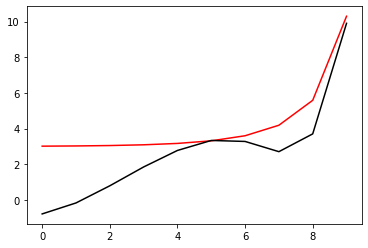

2211 60.37899620569601 -0.6257075383621639 0.9896582612981549
[-0.78554923 -0.17061556  0.79241138  1.84909976  2.77609657  3.33810839
  3.28498219  2.70997126  3.69947753  9.90078663]


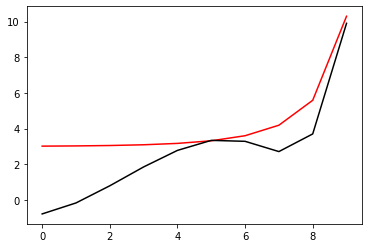

2412 47.22454340267736 -0.6255025672898351 0.9892668036041001
[-0.78782414 -0.17259022  0.7912447   1.84927756  2.77796149  3.34187455
  3.29028304  2.71376013  3.69558814  9.90071056]


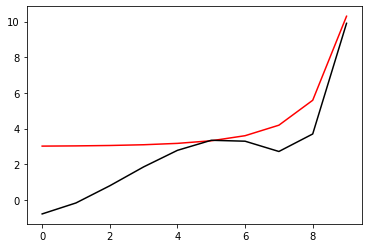

2613 49.446163274839584 -0.6252679938898764 0.9888916792129846
[-0.79006719 -0.1745312   0.79010933  1.84948118  2.77984814  3.34566036
  3.29560548  2.71757637  3.69171378  9.9006639 ]


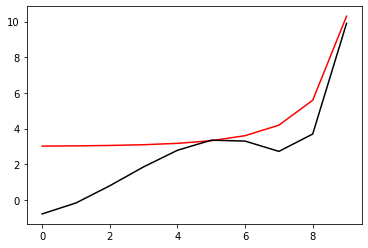

2814 54.232255875061924 -0.6250185239323862 0.9885298829168099
[-0.79228141 -0.1764387   0.78901032  1.84972452  2.78178443  3.34951448
  3.30102499  2.7215231   3.68797737  9.90058993]


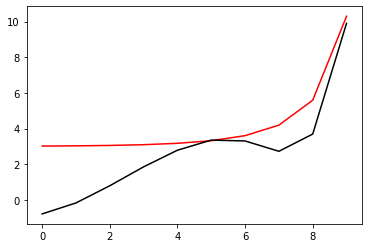

3015 53.3221720061865 -0.6247992638544111 0.9881427635978624
[-0.79450779 -0.17835499  0.78790145  1.84995359  2.78370347  3.3533512
  3.30643306  2.72547113  3.68423949  9.90054807]


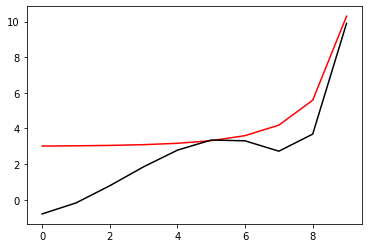

3216 45.329227837203106 -0.6246599513649325 0.9876944150209135
[-0.7967774  -0.18031202  0.78675077  1.8501374   2.78557658  3.35714648
  3.31181346  2.72941502  3.68050592  9.90047142]


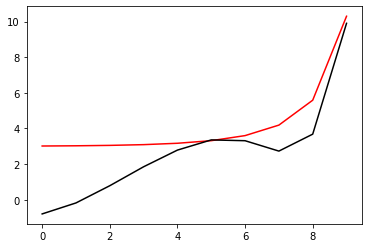

3417 53.704710885447625 -0.62445955408464 0.9873341784498662
[-0.79907281 -0.18229123  0.78557618  1.85029087  2.78741234  3.36089806
  3.31714817  2.73331803  3.67672328  9.90043036]


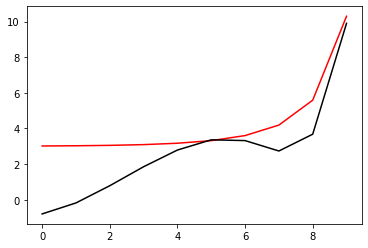

3618 50.0793775566084 -0.6241918229040242 0.9870719000626923
[-0.80138607 -0.18428623  0.78438425  1.85042268  2.78922419  3.36462748
  3.32247008  2.73722546  3.67294631  9.90035202]


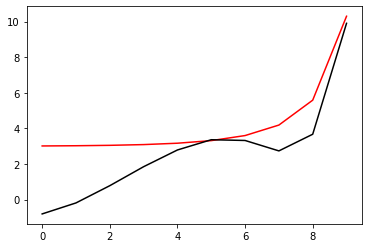

3819 53.38973940918929 -0.6239341015574814 0.9867593122632936
[-0.80365197 -0.18622912  0.78324403  1.85060103  2.79107629  3.36838976
  3.32781744  2.74115016  3.6691571   9.90031078]


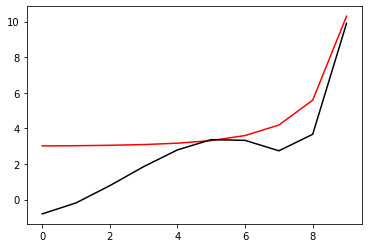

4020 52.93959485422861 -0.6237731737710913 0.9864125546151384
[-0.80603142 -0.18827907  0.78199946  1.85067538  2.79282807  3.37206262
  3.33309926  2.745047    3.66536373  9.90023394]


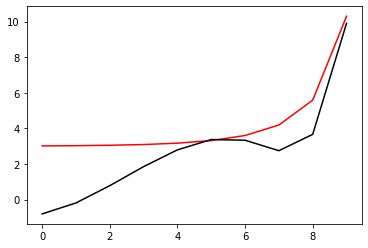

4221 60.379756800818235 -0.6235737505312342 0.9860693714766661
[-0.80835667 -0.19027265  0.7808084   1.85079522  2.79461545  3.37575923
  3.33839247  2.74894269  3.66153741  9.90018912]


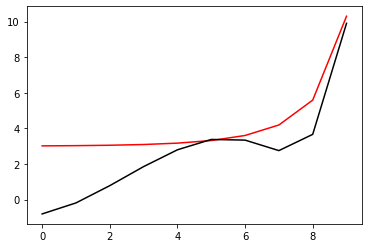

4422 47.195296362872 -0.6233694995099853 0.9856857223922386
[-0.81061214 -0.19218847  0.77969925  1.85099827  2.79648891  3.37954702
  3.34378407  2.75294112  3.65778943  9.90011531]


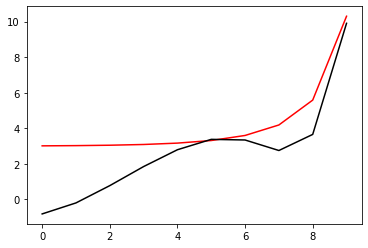

4623 49.4435190459513 -0.6231354979536664 0.98531786448718
[-0.81283875 -0.19407202  0.77862183  1.85122888  2.79838618  3.38335645
  3.34919863  2.7569661   3.65405037  9.90007081]


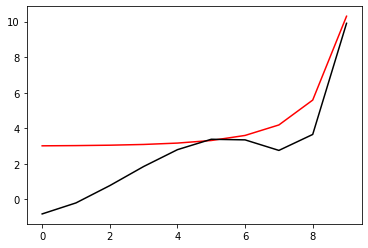

4824 54.213853648888275 -0.6228894101420389 0.9849604731817885
[-0.81504108 -0.19592516  0.77757943  1.85149912  2.80033342  3.3872348
  3.35471125  2.76112185  3.65044536  9.89999882]


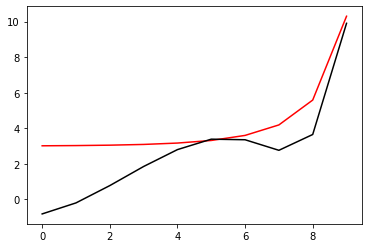

5025 53.31752833805349 -0.6226774148573507 0.9845744078905881
[-0.81725994 -0.19778963  0.77652674  1.85175637  2.80226554  3.39109847
  3.36021552  2.76528134  3.64683786  9.89995911]


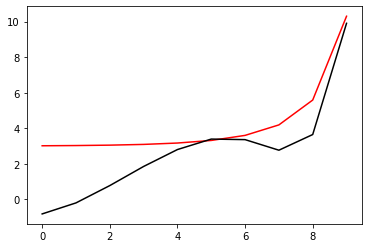

5226 45.32393363972488 -0.6225434805651249 0.9841286817069614
[-0.81952297 -0.19969409  0.77543496  1.85197258  2.80415646  3.39492545
  3.36569649  2.76943972  3.64323369  9.89988442]


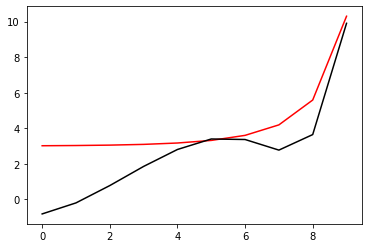

5427 53.719765661099444 -0.62234652278335 0.9837743409764728
[-0.82181655 -0.20162364  0.77431848  1.85215924  2.80601144  3.39871015
  3.3711327   2.77355689  3.63957691  9.89984543]


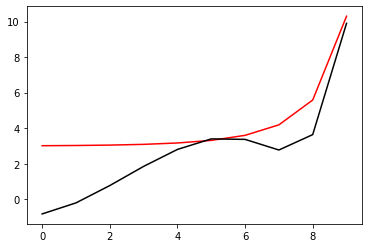

5628 50.098861459339446 -0.6220839982860822 0.9835160267386291
[-0.8241321  -0.20357137  0.77318426  1.8523253   2.80784393  3.40247385
  3.37655652  2.77767753  3.63592158  9.89976894]


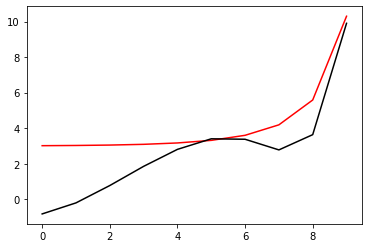

5829 53.37213744313629 -0.6218316148270036 0.9832059851532666
[-0.82640202 -0.20546663  0.77210452  1.85254266  2.80972251  3.40627677
  3.38201194  2.78182004  3.63225453  9.89972957]


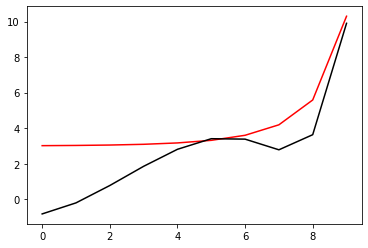

6030 52.936644050553205 -0.6216755805074233 0.9828631745113398
[-0.82878714 -0.20746855  0.7709232   1.85266068  2.81150639  3.40999633
  3.38740812  2.78594096  3.62858763  9.89965484]


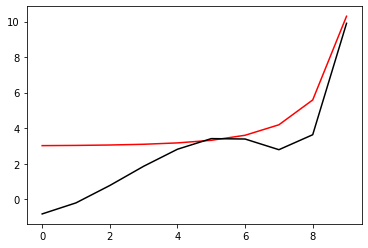

6231 60.380914341443855 -0.6214798974641923 0.9825241226198985
[-0.83112052 -0.20941454  0.76979723  1.85282787  2.81333037  3.41374421
  3.39281934  2.79006242  3.62488576  9.89961189]


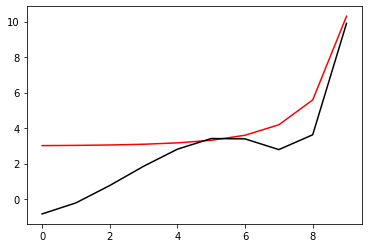

6432 47.16359582160684 -0.6212749885575337 0.9821471897470784
[-0.83338475 -0.21128153  0.76875666  1.85308352  2.81524646  3.41758945
  3.39833457  2.79429046  3.62126187  9.89954009]


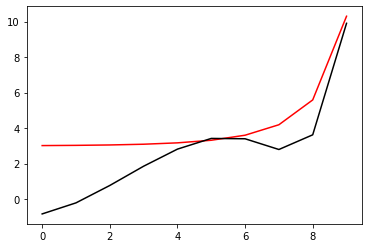

6633 49.44109711570382 -0.6210401734825155 0.9817854360479672
[-0.8356233  -0.21311746  0.7677488   1.85336936  2.81718954  3.42145921
  3.40387448  2.79854491  3.61764353  9.8994975 ]


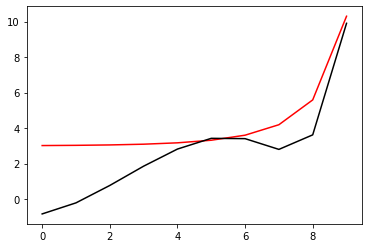

6834 54.19344645901215 -0.6207965214997946 0.9814308386776724
[-0.83784236 -0.21492597  0.76677505  1.85369547  2.81918379  3.42539913
  3.40951351  2.80293079  3.61415778  9.89942731]


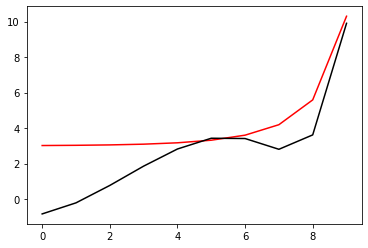

7035 53.31230349334191 -0.620591683215426 0.9810438150593586
[-0.84008301 -0.21674873  0.76579057  1.85401017  2.82116552  3.42932733
  3.41514698  2.8073228   3.61067052  9.89938959]


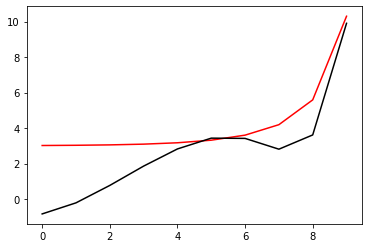

7236 45.31880368921892 -0.6204626030700318 0.9805990887635652
[-0.84236852 -0.21861012  0.7647707   1.85428927  2.82311215  3.43322467
  3.42076191  2.81171704  3.60718752  9.89931673]


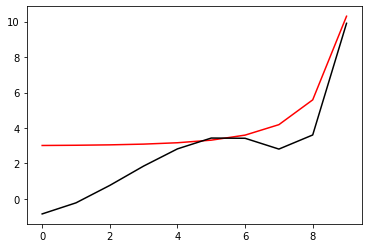

7437 53.7383419602616 -0.6202685146105563 0.9802492966617549
[-0.84468997 -0.22049985  0.76372529  1.85453984  2.8250245   3.43708102
  3.42633206  2.81606856  3.60364886  9.89927969]


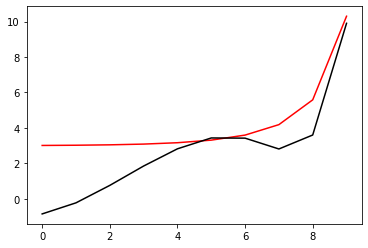

7638 50.12084463279082 -0.620011131542157 0.9799932068168423
[-0.84703819 -0.22241051  0.76266165  1.85477095  2.82691589  3.4409172
  3.43188901  2.82042101  3.60010726  9.89920493]


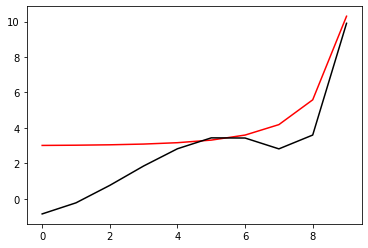

7839 53.35240836271912 -0.6197644084003004 0.979683408148193
[-0.84934304 -0.22426854  0.7616554   1.85505854  2.82885981  3.44479938
  3.43748349  2.82479937  3.59655514  9.8991673 ]


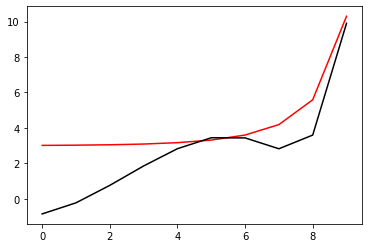

8040 52.934197477816305 -0.6196131505723522 0.979343262792918
[-0.85176492 -0.22623266  0.76055084  1.85525224  2.83071561  3.44860509
  3.44302533  2.82916261  3.59300906  9.89909461]


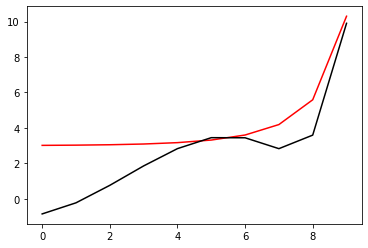

8241 60.38253451197519 -0.6194206381934586 0.9790072056333964
[-0.85413782 -0.22814131  0.75950379  1.85549935  2.83261668  3.45244408
  3.44858553  2.83352715  3.58942611  9.89905343]


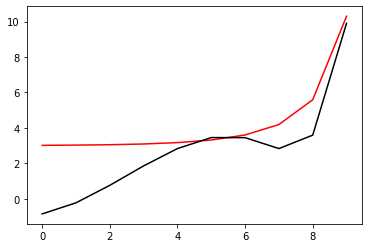

8442 47.12887812328232 -0.6192137045739878 0.9786362099418375
[-0.85644249 -0.22996969  0.75854586  1.85584055  2.83461633  3.45638675
  3.45425469  2.83800074  3.58592019  9.89898355]


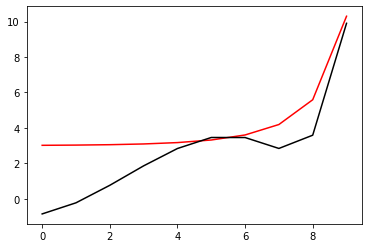

8643 49.43908513203024 -0.6189766635758864 0.9782796449919032
[-0.85872508 -0.23176846  0.75762162  1.85621471  2.83664625  3.46035648
  3.45994898  2.84249849  3.58241528  9.89894276]


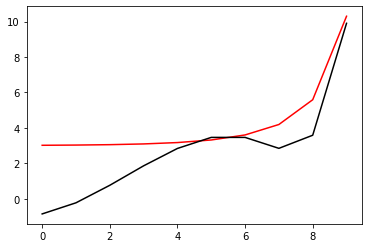

8844 54.17077737030116 -0.6187346339594657 0.9779261929707012
[-0.86099337 -0.23354297  0.75673057  1.85662985  2.83872854  3.46439717
  3.46574211  2.84712622  3.57904023  9.89887422]


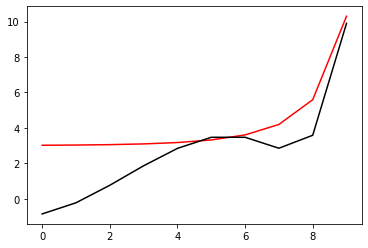

9045 53.30616976207597 -0.618537088142208 0.9775360726331339
[-0.86328919 -0.23533531  0.75582788  1.85703479  2.84080054  3.46842839
  3.47153093  2.8517603   3.57566365  9.89883834]


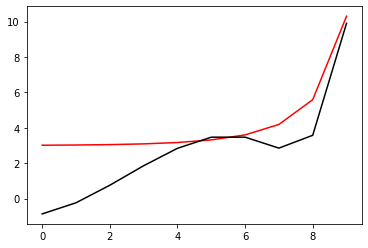

9246 45.313470261846504 -0.6184123823142454 0.9770906845658541
[-0.86563028 -0.2371645   0.75489404  1.85741023  2.84284416  3.47243479
  3.47730525  2.85639825  3.57229132  9.89876715]


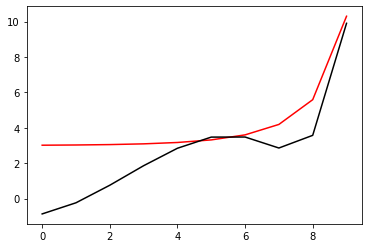

9447 53.76127840581973 -0.6182205718566346 0.9767441052271636
[-0.86801336 -0.23902583  0.75393339  1.85775772  2.84485464  3.47640048
  3.48303266  2.86098884  3.5688582   9.89873188]


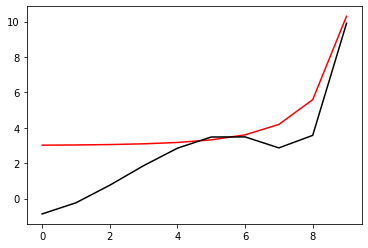

9648 50.14609429251831 -0.6179683588095564 0.9764883466170347
[-0.87042854 -0.24091131  0.75295359  1.85808644  2.84684503  3.48034555
  3.48874361  2.86557415  3.56541503  9.89865859]


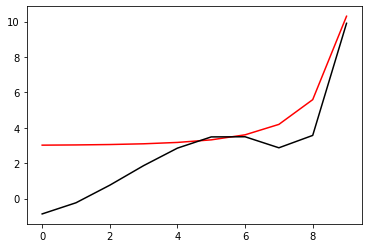

9849 53.3298611991452 -0.6177277497640257 0.9761762929425285
[-0.8728031  -0.2427444   0.75203378  1.85847657  2.8488941   3.48434278
  3.4944965   2.87018692  3.56196093  9.89862241]


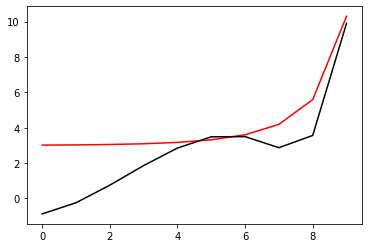

In [165]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, lam2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 60.3843947455475 -0.6173506636155489 0.9754492269415738
[-0.87763713 -0.24662494  0.74978636  1.85860622  2.8521096   3.49129661
  3.50406002  2.87860721  3.55762676  9.89854677]


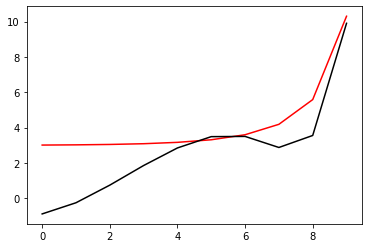

402 47.09213222542338 -0.6171431588676273 0.975088922195628
[-0.87998114 -0.24841251  0.74891665  1.85904004  2.85419903  3.49534247
  3.50990342  2.88334926  3.5543446   9.89848704]


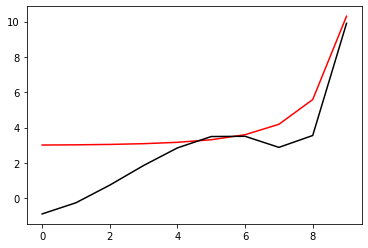

603 49.437745347279645 -0.6169047511747838 0.9747402839520348
[-0.88231229 -0.25017224  0.74808681  1.85952034  2.85633779  3.49943883
  3.51579969  2.88813249  3.55101072  9.89844644]


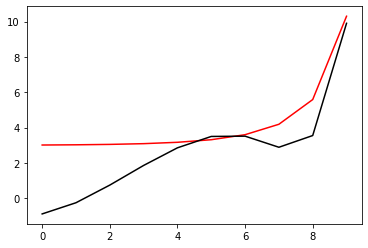

804 54.146606446501124 -0.6166655454023818 0.9743891960919085
[-0.88463882 -0.25191266  0.74729008  1.86004539  2.85853424  3.50361051
  3.52179595  2.89303948  3.54777493  9.89838246]


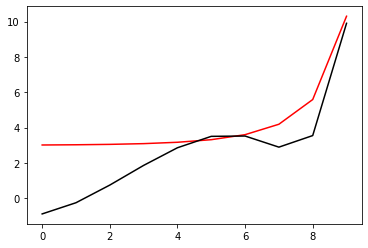

1005 53.29891217920759 -0.6164771294472944 0.9739965436377415
[-0.8870026  -0.25367655  0.74648035  1.86056216  2.86072337  3.50777374
  3.52778362  2.8979423   3.54451702  9.89834765]


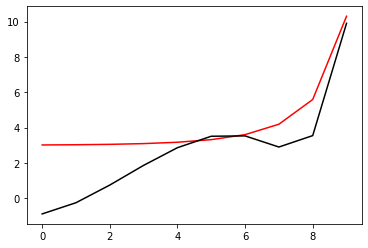

1206 45.30760128591267 -0.6163578748541111 0.9735512222196465
[-0.88941443 -0.25547665  0.74564365  1.86105615  2.86289103  3.51191601
  3.5337536   2.90283859  3.54124722  9.89827835]


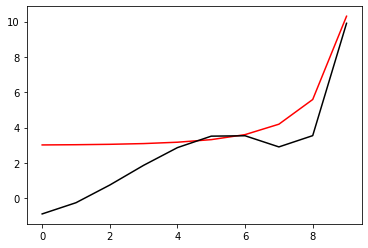

1407 53.78838336609886 -0.6161688233748503 0.9732082588406163
[-0.8918767  -0.2573143   0.74477796  1.8615223   2.86502562  3.51601427
  3.53966584  2.90766988  3.53789802  9.89824431]


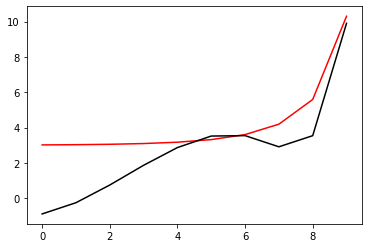

1608 50.17440557386109 -0.6159225752541492 0.9729521551108831
[-0.89437843 -0.25918081  0.74389124  1.86196961  2.8671396   3.5200877
  3.54554966  2.91247718  3.53452014  9.8981721 ]


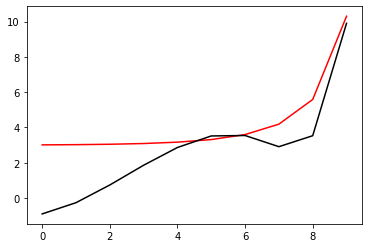

1809 53.30444692496866 -0.6156891260531417 0.972636713769335
[-0.89684444 -0.26099696  0.74306574  1.86248212  2.8693169   3.5242161
  3.55147246  2.91730291  3.53112234  9.89813662]


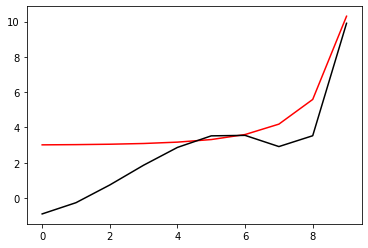

2010 52.92678252595883 -0.6155468678117961 0.9722997849431972
[-0.89943171 -0.26291841  0.74214841  1.86291173  2.87141884  3.52827913
  3.55734805  2.92211465  3.5277356   9.89806683]


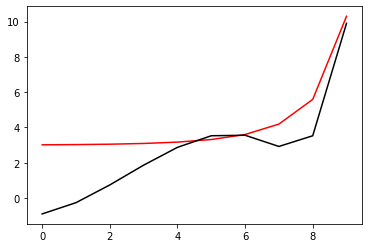

2211 60.38731537375013 -0.6153586129072809 0.9719677584423528
[-0.90197681 -0.2647866   0.7412917   1.86340203  2.87357463  3.53238127
  3.56323908  2.92691464  3.52429853  9.89802773]


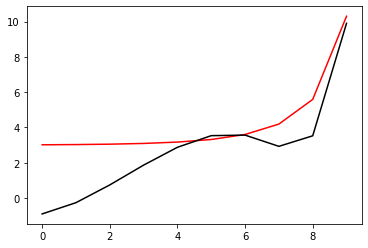

2412 47.051216994788106 -0.6151433222195735 0.9716076984900803
[-0.9044571  -0.26657398  0.74052929  1.86399506  2.87583832  3.53659347
  3.56923707  2.93181139  3.52092384  9.89796003]


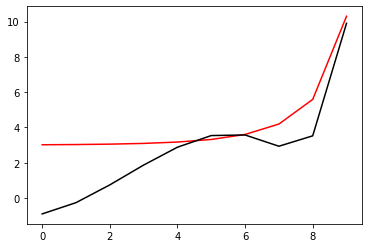

2613 49.43753282436775 -0.6148974121129516 0.9712600327970011
[-0.90692311 -0.26833586  0.73980078  1.86462429  2.87813554  3.54083186
  3.57524951  2.93671109  3.5175298   9.89792103]


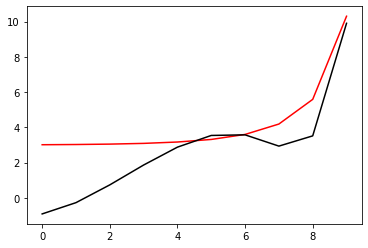

2814 54.119322462701554 -0.6146568130744523 0.9709040886784222
[-0.90938459 -0.27008015  0.73910258  1.86529417  2.88048462  3.54513723
  3.58134932  2.94172206  3.51424935  9.89785378]


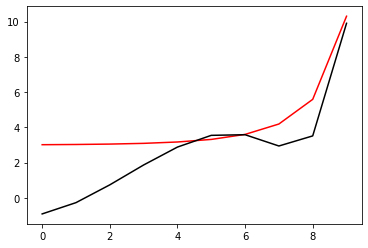

3015 53.289451934893016 -0.6144745898777713 0.9705020605447175
[-0.9118861  -0.27185119  0.73838828  1.86595286  2.88282348  3.54943103
  3.58743623  2.94672477  3.51095872  9.89781943]


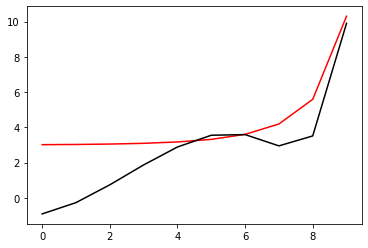

3216 45.30050384177214 -0.61435702586179 0.9700514108959594
[-0.91443142 -0.27365456  0.73765116  1.8665932   2.88514523  3.55370773
  3.59350756  2.95172065  3.50766357  9.89774933]


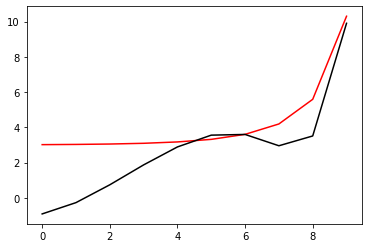

3417 53.821283180904096 -0.614167485947191 0.9697080835157668
[-0.91702994 -0.27549846  0.73688249  1.86720344  2.88743151  3.55793729
  3.59951607  2.95664387  3.50428786  9.89771515]


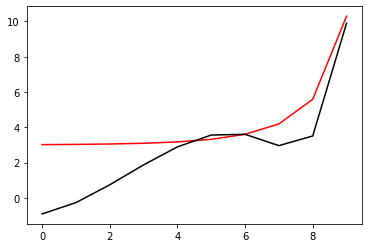

3618 50.20721649325423 -0.6139253517244381 0.9694474769853747
[-0.91966988 -0.27737348  0.73609078  1.86779287  2.88969462  3.56213803
  3.60548933  2.96153239  3.50087688  9.89764227]


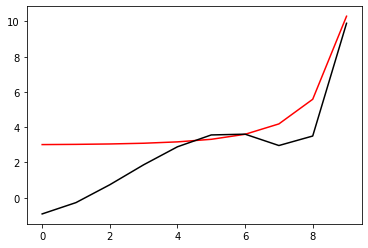

3819 53.2748749275376 -0.6136978319030406 0.969124431823469
[-0.92227378 -0.2791976   0.73536165  1.86844976  2.89202387  3.56639667
  3.61150323  2.96643748  3.49744648  9.89760619]


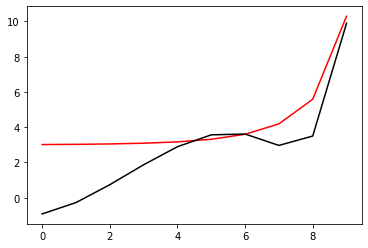

4020 52.91883152746102 -0.6135574316994846 0.9687872020948308
[-0.92499769 -0.28112553  0.7345431   1.86902716  2.8942819   3.57059464
  3.61747449  2.9713318   3.4940344   9.89753614]


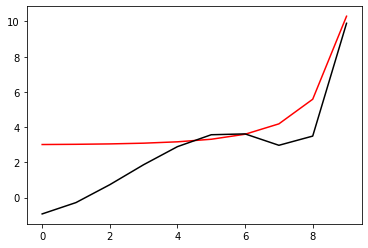

4221 60.39056244770334 -0.613368463497682 0.9684555594626725
[-0.9276786  -0.28299941  0.73378655  1.86966718  2.89659579  3.57483296
  3.6234598   2.97620806  3.49056738  9.89749654]


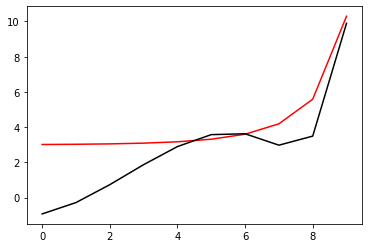

4422 47.009701520233435 -0.6131459545957139 0.9680999465358153
[-0.93029333 -0.28479147  0.7331255   1.87041121  2.89901833  3.57918061
  3.62954791  2.98117088  3.48715279  9.89742819]


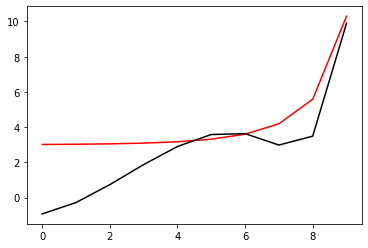

4623 49.43877752957247 -0.6128929174534141 0.9677557055083902
[-0.93289429 -0.28655895  0.73249757  1.8711907   2.90147296  3.58355116
  3.63564326  2.9861236   3.48370775  9.89738846]


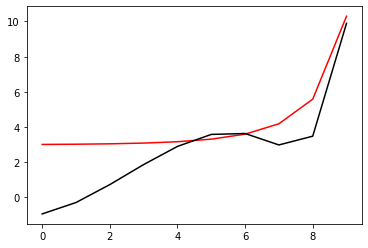

4824 54.09096456095334 -0.6126523579203844 0.9673954706379359
[-0.93549169 -0.28831044  0.73189827  1.87200902  2.90397688  3.58798452
  3.64181875  2.99117568  3.48036661  9.89732012]


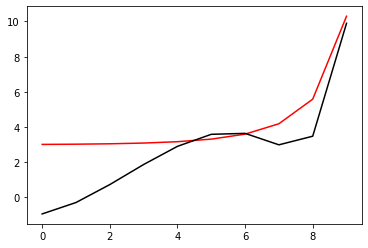

5025 53.27738071021604 -0.6124778238510453 0.9669848461069148
[-0.93813243 -0.29009237  0.73127942  1.87281305  2.90646736  3.59240226
  3.64797508  2.99620996  3.47701042  9.89728483]


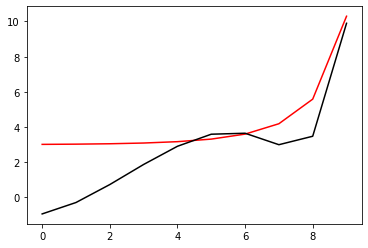

5226 45.292137654300205 -0.6123626086774726 0.9665301200657279
[-0.94081272 -0.29190308  0.73064129  1.87360225  2.90894364  3.59680408
  3.65411322  3.00122916  3.47364363  9.89721357]


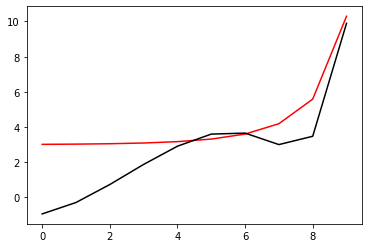

5427 53.85815689366186 -0.6121726258107217 0.9661873555122225
[-0.94354851 -0.29375737  0.72996841  1.87435802  2.91138033  3.60115263
  3.66017832  3.00616054  3.47018599  9.89717815]


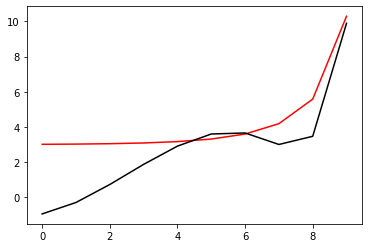

5628 50.242957952939975 -0.611935106224144 0.9659219389623871
[-0.94632687 -0.29564497  0.72926984  1.87508986  2.91378943  3.60546522
  3.6661961   3.0110392   3.46667911  9.89710376]


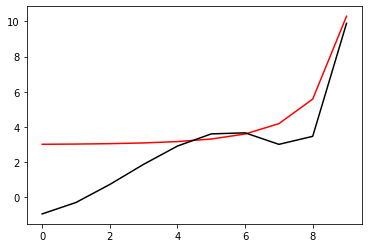

5829 53.24180139958596 -0.6117140604054658 0.9655914609599406
[-0.94906863 -0.2974817   0.72863394  1.87588957  2.91626506  3.60983526
  3.67225114  3.01592607  3.46314803  9.89706592]


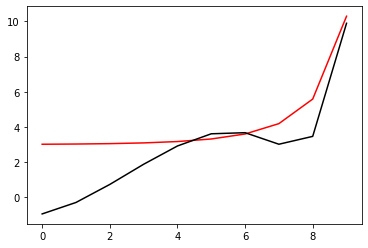

6030 52.906295885203235 -0.6115746111227507 0.9652555595184085
[-0.95192814 -0.29942071  0.72791016  1.87661169  2.91867158  3.61414642
  3.67826394  3.02080038  3.45963903  9.89699452]


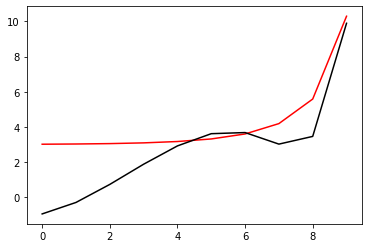

6231 60.394123475334304 -0.6113840566679634 0.9649257160274697
[-0.95474283 -0.30130482  0.727249    1.87739709  2.92113425  3.61849687
  3.68428602  3.02564629  3.45606887  9.89695329]


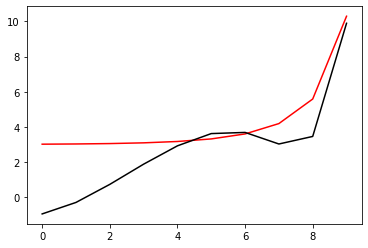

6432 46.96944089711977 -0.6111541296850815 0.9645758352631201
[-0.95748978 -0.30310691  0.7266828   1.87828541  2.92370343  3.62295229
  3.69040195  3.03056303  3.45253814  9.89688307]


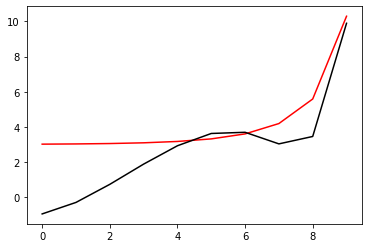

6633 49.441670506705094 -0.61089395736367 0.9642361715204832
[-0.96022206 -0.30488494  0.72614848  1.87920742  2.9263019   3.62742558
  3.69651547  3.03545418  3.4489662   9.8968414 ]


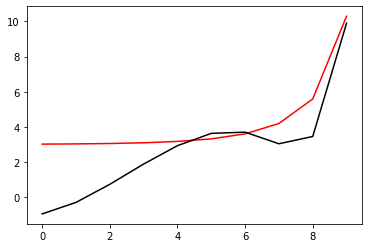

6834 54.061770854372135 -0.6106547285229621 0.9638714061757493
[-0.96294963 -0.30664747  0.72564136  1.88016619  2.92894661  3.63195689
  3.70270101  3.04043191  3.44548974  9.89677083]


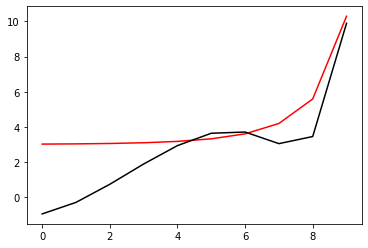

7035 53.2622138614987 -0.6104885158921978 0.9634530674065058
[-0.96572192 -0.30844329  0.72511117  1.88110691  2.93157376  3.63646749
  3.70886001  3.04538179  3.44199545  9.89673343]


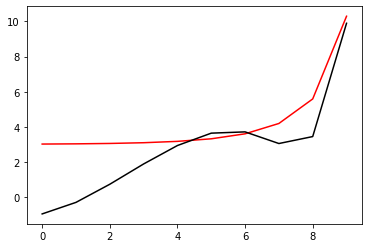

7236 45.28270773775503 -0.61037569709996 0.9629956912377035
[-0.96852799 -0.31026379  0.72456485  1.88203539  2.93418843  3.64096209
  3.71499693  3.05030765  3.43848614  9.8966599 ]


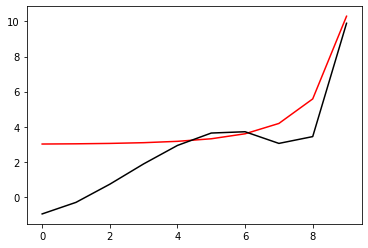

7437 53.89780015785831 -0.6101849900640904 0.9626544880982525
[-0.97138974 -0.31212984  0.72398076  1.88292678  2.93675888  3.64539688
  3.72105059  3.05513172  3.4348797   9.89662216]


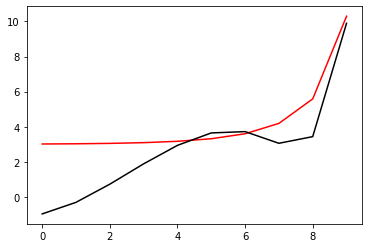

7638 50.280392192794096 -0.6099522748014529 0.9623843162165651
[-0.97429316 -0.31403026  0.72336862  1.88379085  2.93929691  3.64978828
  3.72704492  3.05988632  3.43121373  9.8965453 ]


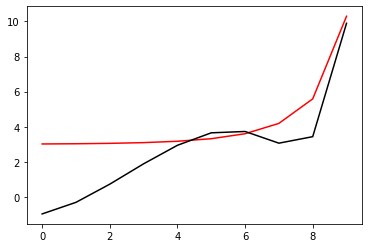

7839 53.20579222755348 -0.6097378060991888 0.9620475064452443
[-0.97715811 -0.31587953  0.72281866  1.88472214  2.9419007   3.6542357
  3.73307266  3.06464159  3.42752203  9.89650475]


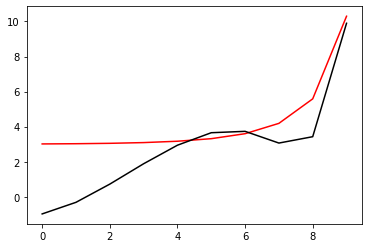

8040 52.88897499828872 -0.6095982062645038 0.9617149956514379
[-0.98013732 -0.31782928  0.72218177  1.88557661  2.94443615  3.658625
  3.73905836  3.06938371  3.42385902  9.89643108]


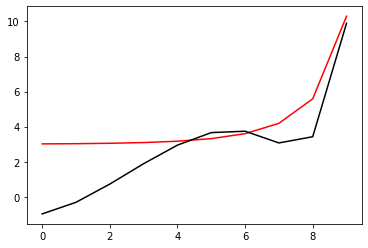

8241 60.397729464890695 -0.6094054224446179 0.9613887864327689
[-0.98306839 -0.31972254  0.72160809  1.88649456  2.94702763  3.66305246
  3.74504935  3.07408952  3.42013319  9.89638742]


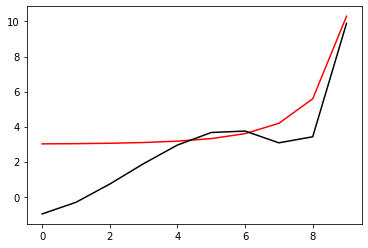

8442 46.932387041233106 -0.6091687769605194 0.9610461036266954
[-0.98592962 -0.32153388  0.72112779  1.88751284  2.9497218   3.66757906
  3.75112422  3.07885072  3.4164361   9.89631452]


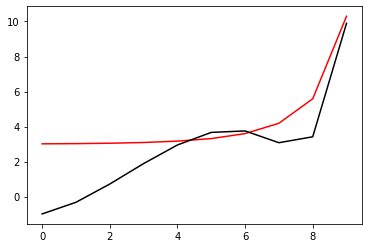

8643 49.4461578646662 -0.6089024539712135 0.9607124606696935
[-0.98877374 -0.32332084  0.72067826  1.88856279  2.95244224  3.67211867
  3.75718825  3.08357389  3.41269198  9.89627019]


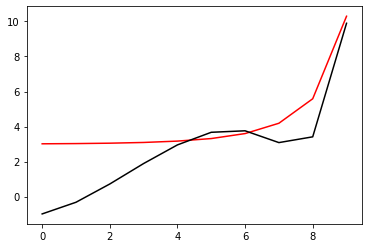

8844 54.03191902749255 -0.608666725668052 0.9603435871132739
[-0.99160999 -0.32509139  0.7202553   1.88964794  2.95520654  3.67671283
  3.76331861  3.0883749   3.40903996  9.89619678]


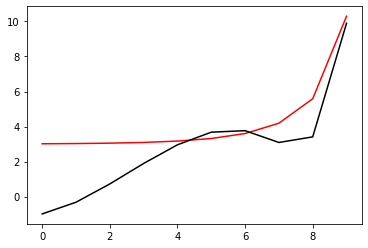

9045 53.24384530844861 -0.6085094747224514 0.9599197290246464
[-0.99449053 -0.32689692  0.71980624  1.89071141  2.95794926  3.68128174
  3.76941668  3.09314151  3.40537196  9.89615668]


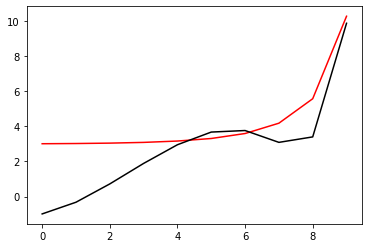

9246 45.27266612468328 -0.608399452803489 0.9594621653620563
[-0.99739814 -0.32872265  0.71934398  1.89176463  2.96068063  3.68583439
  3.77548965  3.09787785  3.4016883   9.89608042]


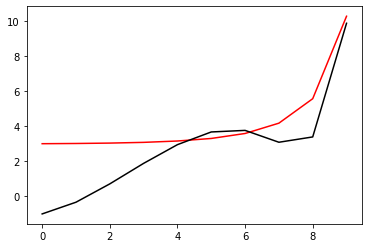

9447 53.93891115128587 -0.6082082457138074 0.9591241921386914
[-1.00035995 -0.33059476  0.71884153  1.8927774   2.96336352  3.69032158
  3.78147129  3.10250297  3.39790696  9.89603991]


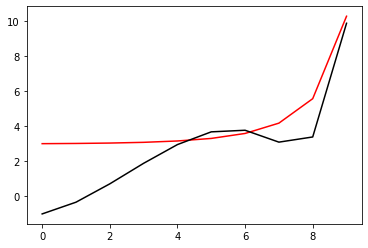

9648 50.31819952121799 -0.6079808502806784 0.9588502379403403
[-1.00336097 -0.33250122  0.71830922  1.89375974  2.96600948  3.69475872
  3.78738352  3.10704594  3.39406089  9.89596028]


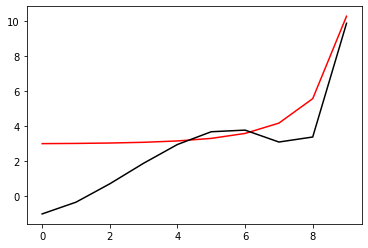

9849 53.16761149435701 -0.607773212814804 0.9585094021467533
[-1.00632093 -0.33435594  0.71783838  1.89480807  2.96871978  3.69925015
  3.79332602  3.11158469  3.39019122  9.89591675]


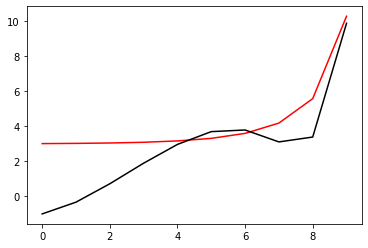

In [166]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, lam2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 60.40058534720753 -0.607396213889261 0.9578147236108064
[-1.01201526 -0.33823227  0.71630545  1.89591206  2.97280338  3.70667212
  3.80370315  3.1192356   3.38446087  9.89581959]


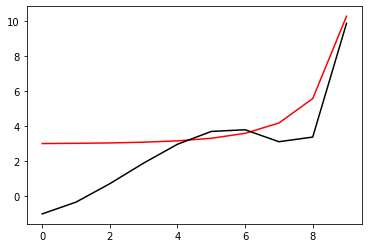

402 46.900910107557955 -0.6071637792235989 0.9574927755114636
[-1.01487376 -0.33999982  0.71591195  1.89703068  2.97558402  3.71124262
  3.8097208   3.12386294  3.38095671  9.89575674]


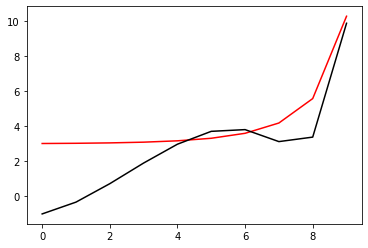

603 49.451710970179136 -0.6069004919416319 0.9571751780858055
[-1.01773301 -0.34175138  0.71554872  1.89818567  2.97839709  3.71583005
  3.81572842  3.12843291  3.37729073  9.89571337]


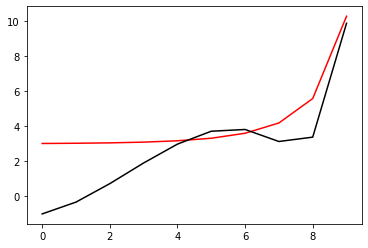

804 54.00235882659756 -0.6066760622308082 0.9568112059087173
[-1.02059353 -0.34349163  0.71521007  1.89937533  2.98125211  3.72046504
  3.82178755  3.13305153  3.37364453  9.89563907]


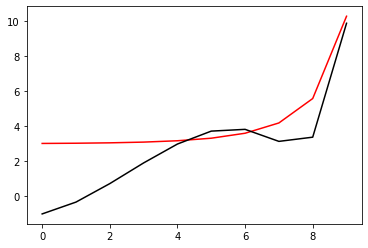

1005 53.22333811259455 -0.6065315700921888 0.9563923261692682
[-1.02350593 -0.34527236  0.7148414   1.90053992  2.98408061  3.72506523
  3.82779806  3.13761173  3.36993783  9.89559841]


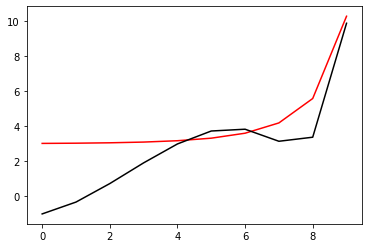

1206 45.26281173849779 -0.6064275138634536 0.955943766088647
[-1.0264462  -0.34707308  0.71446043  1.90169514  2.98689685  3.72964357
  3.8337706   3.14212144  3.36618162  9.8955214 ]


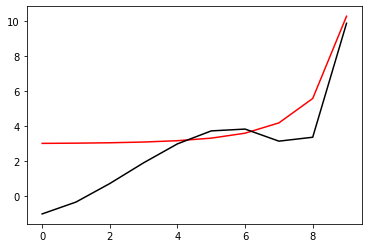

1407 53.9791190154844 -0.6062390895821245 0.955614241481058
[-1.02944388 -0.34892319  0.71403644  1.90280688  2.98966009  3.73414806
  3.83963793  3.1465031   3.36230602  9.89547916]


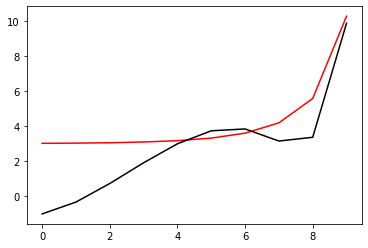

1608 50.354167833858384 -0.6060198544744108 0.9553403728390639
[-1.03248238 -0.35080955  0.7135804   1.90388544  2.99238186  3.73859408
  3.84542188  3.15078559  3.35834549  9.89539794]


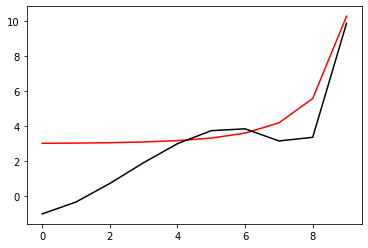

1809 53.129192972433785 -0.6058209743227271 0.9550010060130706
[-1.03548164 -0.35264627  0.71318371  1.905028    2.99516563  3.74309039
  3.85122914  3.15505526  3.35435138  9.89535224]


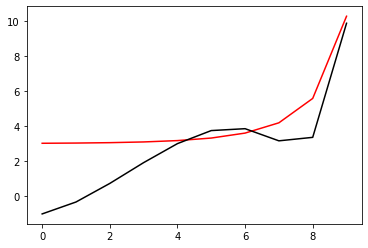

2010 52.84405777321147 -0.6056812706225465 0.9546846146237282
[-1.0385906  -0.35458178  0.71269996  1.9060929   2.99787985  3.74752689
  3.85699252  3.15931246  3.3503935   9.89527413]


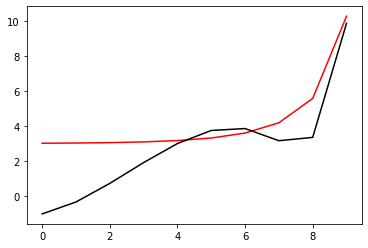

2211 60.403812270316145 -0.6054861522559355 0.9543739317243789
[-1.04164622 -0.35645825  0.71228034  1.90722174  3.00065021  3.75200021
  3.86275621  3.16352644  3.34637438  9.89522601]


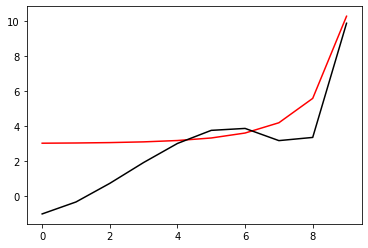

2412 46.87241765441753 -0.6052427329161485 0.9540519539194012
[-1.04463092 -0.35825536  0.71194871  1.90844354  3.00351362  3.75655911
  3.8685835   3.16777005  3.34236513  9.89514803]


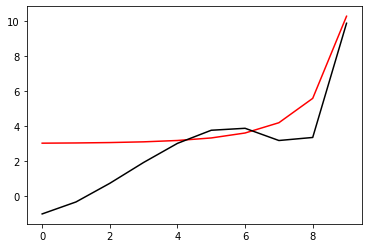

2613 49.45869377118315 -0.6049712217843655 0.9537365574511296
[-1.04759395 -0.36002701  0.71164634  1.90969392  3.00639864  3.76112361
  3.8743881   3.17196245  3.33830599  9.89509876]


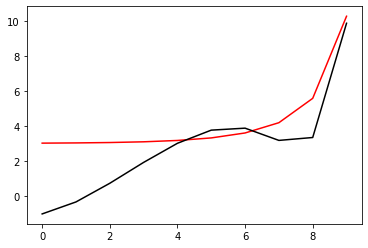

2814 53.96972243772453 -0.6047515514286576 0.9533646708479302
[-1.05054158 -0.36177845  0.71137164  1.91097924  3.00932649  3.76574089
  3.88025596  3.17622901  3.33434161  9.89502043]


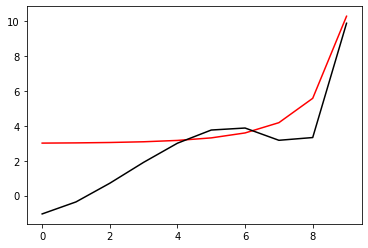

3015 53.19991895048838 -0.6046140896935237 0.9529412298325781
[-1.05353123 -0.36356618  0.71106694  1.91223773  3.01222703  3.77032676
  3.88608537  3.180459    3.33037164  9.89497554]


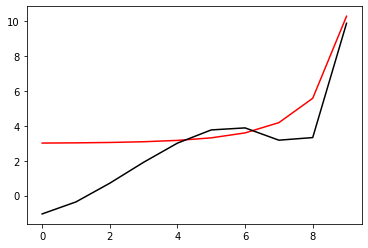

3216 45.25282266814652 -0.60451210140754 0.9524939396080904
[-1.0565362  -0.36536612  0.71075413  1.91348934  3.01511817  3.77489634
  3.89188664  3.18465511  3.32639089  9.89489466]


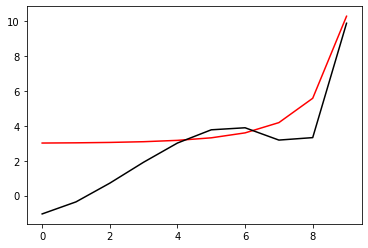

3417 54.02105831684046 -0.6043227036981197 0.9521690154199495
[-1.05959125 -0.36721218  0.71039842  1.91469605  3.01795508  3.77939302
  3.89758759  3.18873518  3.32232257  9.89484957]


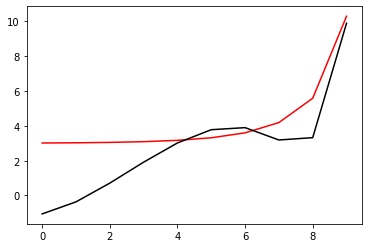

3618 50.39005722682187 -0.6041087230831655 0.9518932190760949
[-1.06267992 -0.36909108  0.71001098  1.91586807  3.0207484   3.78382967
  3.9032052   3.19272032  3.31818914  9.89476555]


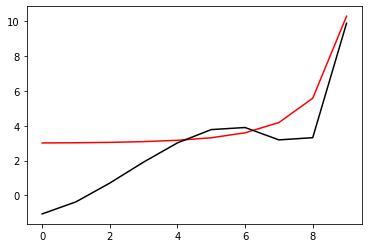

3819 53.08900142510079 -0.6039163523962363 0.9515537490124113
[-1.06572358 -0.3709177   0.709683    1.91710293  3.02360258  3.78831678
  3.90884832  3.19669833  3.31404126  9.89471742]


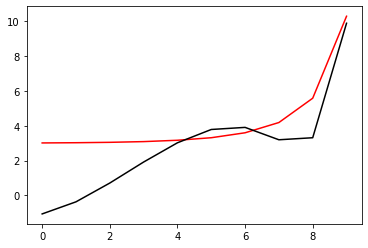

4020 52.81842002502028 -0.6037756637895644 0.9512466486053422
[-1.06887216 -0.37284119  0.70926751  1.91825851  3.02638566  3.79274415
  3.91445086  3.20067185  3.30994903  9.89463716]


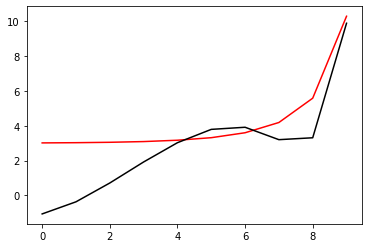

4221 60.40602901844891 -0.6035793488032102 0.9509450863592539
[-1.07196079 -0.37470156  0.70891813  1.91947892  3.02922562  3.79720974
  3.92005597  3.20460656  3.3058105   9.89458729]


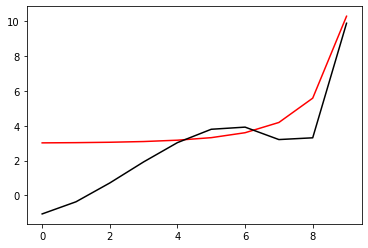

4422 46.848760580307165 -0.6033344700624537 0.9506342087082371
[-1.07497533 -0.37648215  0.70865462  1.92078835  3.03215336  3.80175438
  3.92571648  3.2085625   3.30168299  9.89450737]


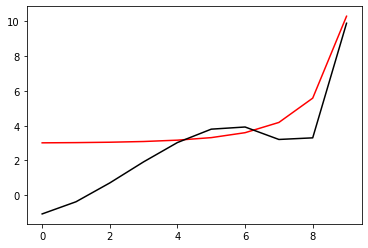

4623 49.46641693545506 -0.6030626523562801 0.9503291028551016
[-1.07796357 -0.37823505  0.70842042  1.92212502  3.0351005   3.80630183
  3.93135094  3.21246535  3.29751307  9.89445632]


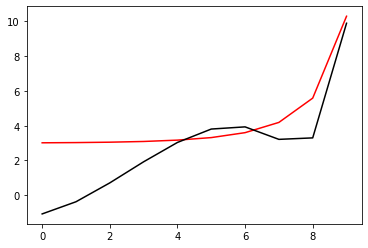

4824 53.93497769041848 -0.6028547560681219 0.9499565427112381
[-1.08093023 -0.37996379  0.70821587  1.92349748  3.03809106  3.81090311
  3.93705046  3.21644525  3.29344739  9.89437645]


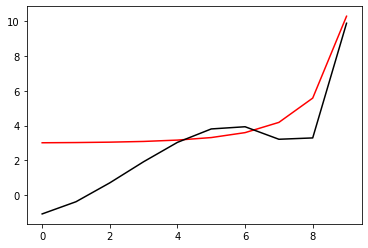

5025 53.17500982943357 -0.6027275420011825 0.9495371400715132
[-1.08393589 -0.3817279   0.70798032  1.92484095  3.04105159  3.81547027
  3.94270948  3.22038923  3.28938513  9.89433006]


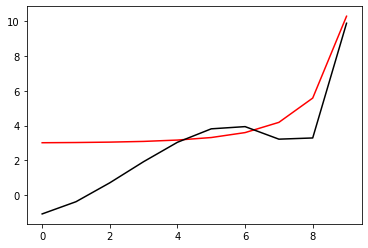

5226 45.243297109660176 -0.6026306131212981 0.9490984418422501
[-1.08695057 -0.38349995  0.707739    1.92617858  3.04400286  3.82002044
  3.94833878  3.2242985   3.28531773  9.89424785]


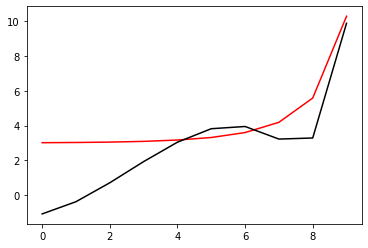

5427 54.06306306071068 -0.6024434614038493 0.9487823891332454
[-1.09001199 -0.38531675  0.7074543   1.92746963  3.04689744  3.82449472
  3.95386485  3.22809206  3.28117168  9.89420151]


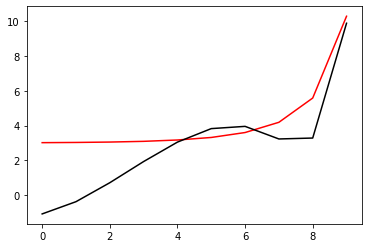

5628 50.424405079671544 -0.6022375591639628 0.948508220333004
[-1.09310331 -0.38716461  0.70713769  1.9287243   3.04974539  3.82890438
  3.9593016   3.23178634  3.27696351  9.89411637]


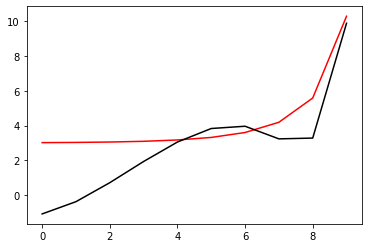

5829 53.04852960686216 -0.6020538073944692 0.9481731889446554
[-1.09614744 -0.38895968  0.70687944  1.93003971  3.05265149  3.8333613
  3.96476016  3.23547156  3.27274633  9.89406708]


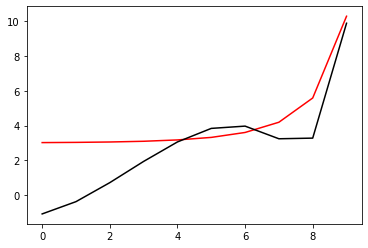

6030 52.79255392356598 -0.6019138362258104 0.9478788056351678
[-1.09929448 -0.39085128  0.70653242  1.93127357  3.05548378  3.83775591
  3.97017681  3.23915421  3.2685927   9.89398582]


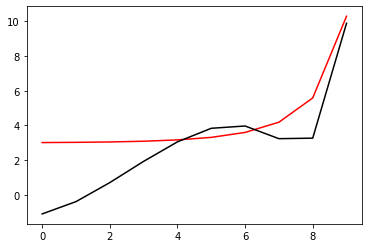

6231 60.407479091393526 -0.601718438252594 0.9475894292211048
[-1.10237757 -0.39267704  0.70625298  1.93257309  3.05837353  3.84218913
  3.97559618  3.24280015  3.26440138  9.89393526]


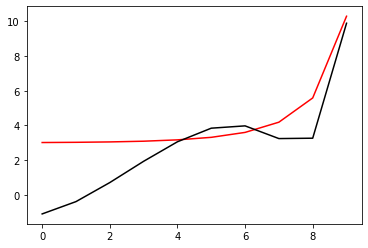

6432 46.82904996036972 -0.6014750593337538 0.9472921398623649
[-1.10538582 -0.39442392  0.70605673  1.93395749  3.06134551  3.8466939
  3.98106092  3.2464575   3.26021783  9.89385438]


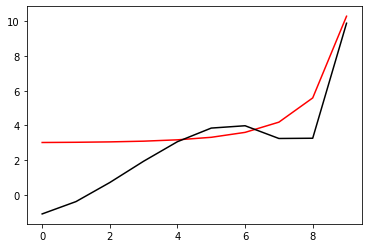

6633 49.474800960776115 -0.6012058717654654 0.9469997171537957
[-1.1083649  -0.39614161  0.70588987  1.93536821  3.06433513  3.85119873
  3.98649593  3.25006009  3.25599657  9.89380246]


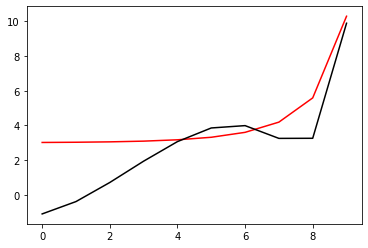

6834 53.896447698618346 -0.6010129980858672 0.9466291138553646
[-1.11131737 -0.39783139  0.70575515  1.93681657  3.06736993  3.85575947
  3.99199859  3.25374369  3.2518873   9.89372201]


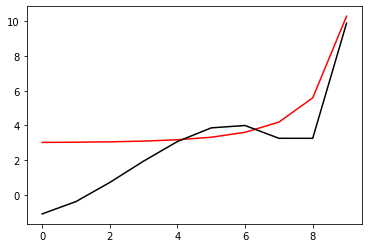

7035 53.14943505925113 -0.6008965145688864 0.9462181592074947
[-1.11430675 -0.39955571  0.70558895  1.93823463  3.07037286  3.86028386
  3.99745879  3.25739234  3.24778794  9.89367495]


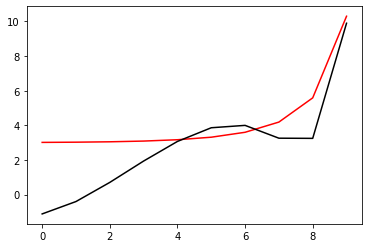

7236 45.23429656657745 -0.6008055271234859 0.9457918502783101
[-1.11730043 -0.40128445  0.70541918  1.93964809  3.07336697  3.86479075
  4.00288781  3.26100626  3.24368785  9.89359227]


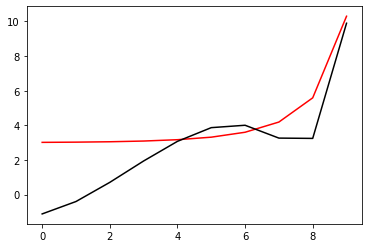

7437 54.105542139229776 -0.6006222600317321 0.9454866637958569
[-1.12033824 -0.40305651  0.7052062   1.94101429  3.07630313  3.86921993
  4.00821214  3.26450695  3.23951781  9.89354553]


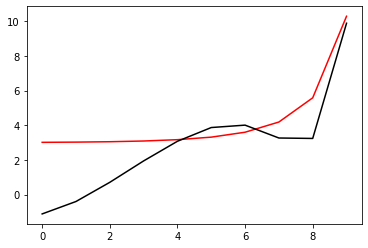

7638 50.457133761790594 -0.600425919392642 0.9452162438212668
[-1.12340311 -0.404858    0.70496155  1.94234322  3.07919062  3.87358099
  4.01344256  3.26790625  3.23528883  9.8934601 ]


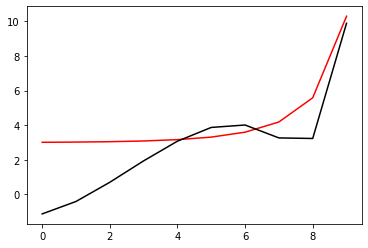

7839 53.00823233328664 -0.6002519297497857 0.9448884250705419
[-1.12641995 -0.40660689  0.70477394  1.9437308   3.08213359  3.87798592
  4.01869087  3.27129502  3.23105527  9.89341054]


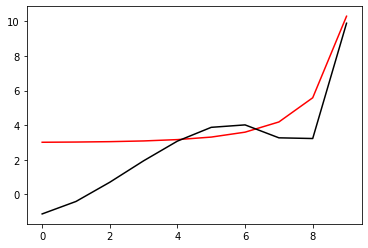

8040 52.76765496119149 -0.6001137180949199 0.9446087245104619
[-1.129539   -0.40845264  0.70449607  1.94503461  3.08500013  3.88232589
  4.02389571  3.27468302  3.2268913   9.89332903]


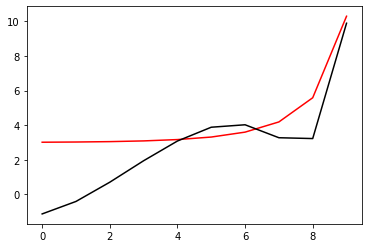

8241 60.408107258845476 -0.599920707167964 0.944333378504932
[-1.13259117 -0.41023022  0.70428737  1.94640531  3.0879253   3.88670552
  4.02910432  3.27803802  3.22269837  9.8932786 ]


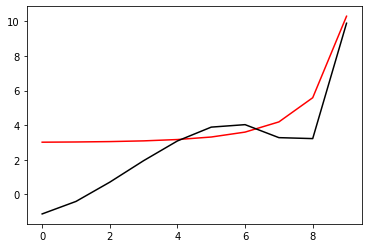

8442 46.81280402665558 -0.5996810156433082 0.9440511367823666
[-1.13556886 -0.4119303   0.70415922  1.94785711  3.09092759  3.89114962
  4.03434891  3.28139616  3.21851051  9.89319758]


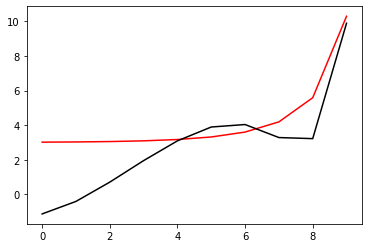

8643 49.483706230719434 -0.5994167181369935 0.943772894449617
[-1.13851535 -0.4135999   0.70406077  1.94933484  3.09394649  3.89559183
  4.03956121  3.28469965  3.21429003  9.89314559]


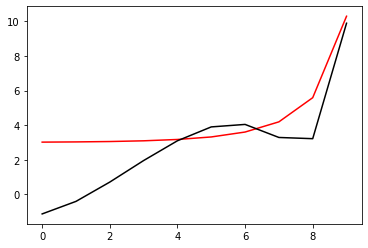

8844 53.85277694826419 -0.5992413859137531 0.9434061845371818
[-1.14143074 -0.41523775  0.70399758  1.95085306  3.09701359  3.90009343
  4.04484528  3.28808977  3.21018967  9.89306543]


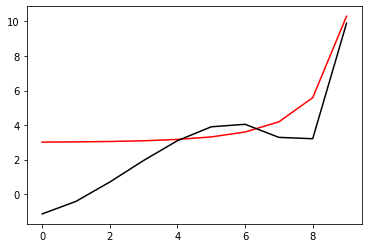

9045 53.12409701661555 -0.5991356466929423 0.9430070984678065
[-1.14438141 -0.41690917  0.70390298  1.95234042  3.10004779  3.90455716
  4.05008548  3.29144634  3.20610456  9.89301847]


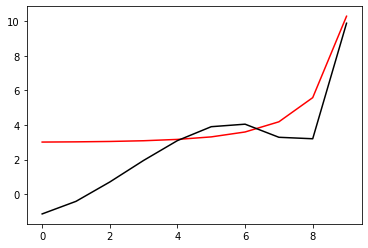

9246 45.22584265428017 -0.5990510754208161 0.9425960532030101
[-1.14733275 -0.41858201  0.70380694  1.95382461  3.10307394  3.90900319
  4.05529356  3.29476895  3.20202277  9.89293614]


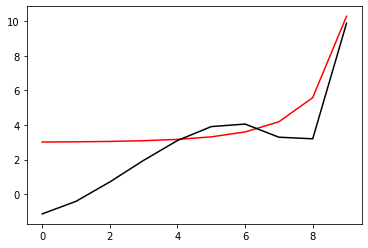

9447 54.14885016263451 -0.5988732077090518 0.9423030324347031
[-1.15032594 -0.42029654  0.70366848  1.95526178  3.10604194  3.91337092
  4.06039698  3.29798235  3.19787954  9.89288979]


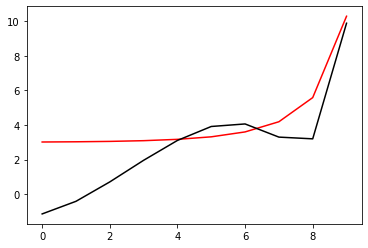

9648 50.48824287572387 -0.5986877455350859 0.9420380299194472
[-1.15334393 -0.42203889  0.70349902  1.95666148  3.10896013  3.91766806
  4.06540331  3.30109389  3.19368076  9.89280487]


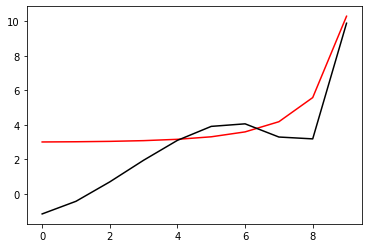

9849 52.968418979461646 -0.5985245611071818 0.9417194943772491
[-1.15631404 -0.42372932  0.70338509  1.95811771  3.11193106  3.92200542
  4.0704233   3.30419335  3.18948085  9.89275585]


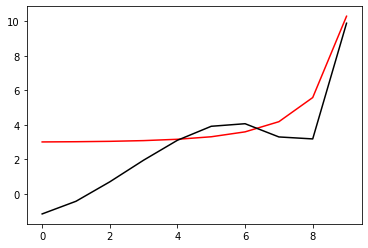

In [167]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, lam2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 60.40767212432371 -0.5982094118281531 0.9412222203335721
[-1.16165996 -0.42699404  0.702758    1.96018461  3.11670137  3.92939996
  4.07948575  3.30940874  3.18220982  9.89263458]


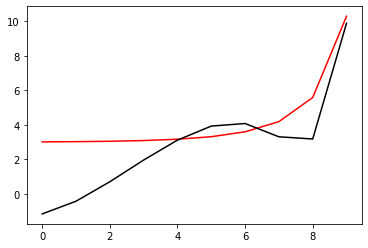

402 46.7999076055241 -0.597985603504943 0.9409675933867391
[-1.16450818 -0.42859004  0.70271333  1.96169314  3.11971414  3.93376585
  4.08449846  3.31254539  3.17838983  9.89257138]


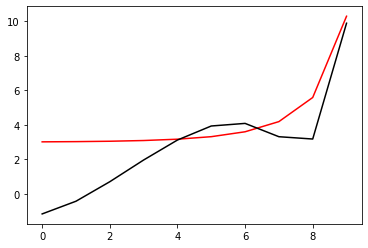

603 49.492864964790165 -0.5977358274143546 0.9407124806393147
[-1.16734537 -0.43016546  0.70269672  1.96323012  3.12274505  3.93812466
  4.08946376  3.31558944  3.17443253  9.89252115]


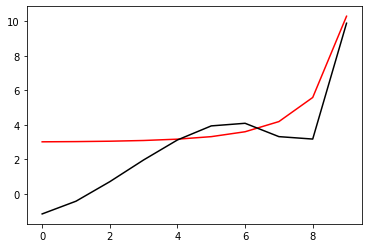

804 53.80316618461461 -0.5975838431541842 0.9403604086464489
[-1.17016043 -0.4317127   0.70271579  1.96480975  3.12582504  3.94253889
  4.09448957  3.31869542  3.17053489  9.89244027]


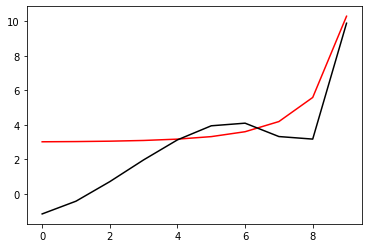

1005 53.10050526802055 -0.5974904208379188 0.9399838047743388
[-1.17301793 -0.43329732  0.70270197  1.96635768  3.12886976  3.94690891
  4.09946101  3.32175134  3.16661307  9.89239759]


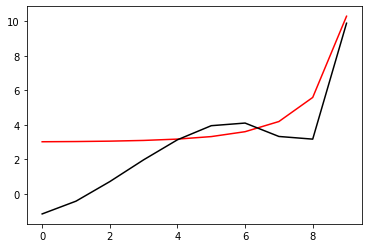

1206 45.21812189373468 -0.597413666830557 0.939596670832081
[-1.17588013 -0.43488487  0.70268692  1.96790321  3.1319061   3.95125798
  4.10439429  3.32476384  3.16266809  9.89231643]


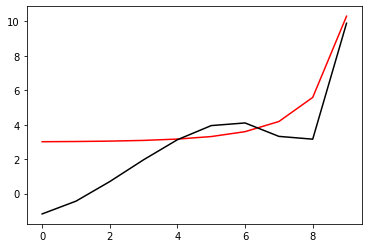

1407 54.19214705637346 -0.5972448446312293 0.9393194803218538
[-1.17878711 -0.43651517  0.70262971  1.96940252  3.13488467  3.9555279
  4.10922242  3.32766733  3.15864909  9.89227183]


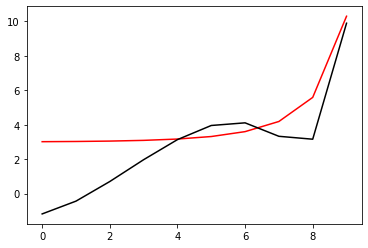

1608 50.51699358015061 -0.597073024196167 0.9390633835603464
[-1.18172142 -0.4381743   0.70254151  1.97086472  3.13781322  3.95972567
  4.11395204  3.33046833  3.15456324  9.8921889 ]


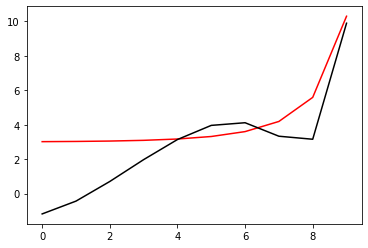

1809 52.930550890221085 -0.596922592861137 0.9387581985671236
[-1.18461286 -0.43978527  0.70250596  1.97238093  3.1407917   3.96395994
  4.1186918   3.33325525  3.15046724  9.89214149]


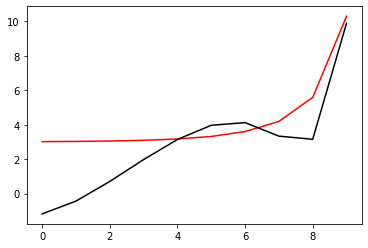

2010 52.725714875076385 -0.5967914226658243 0.9385125648600552
[-1.18761027 -0.44149648  0.70237664  1.97380965  3.14368976  3.96812538
  4.12338694  3.33604437  3.14643847  9.8920619 ]


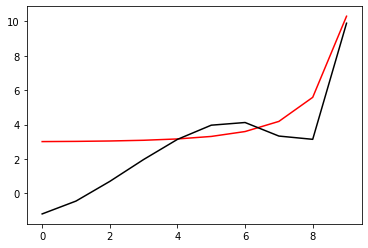

2211 60.40684217242846 -0.5966080894803163 0.9382696414612701
[-1.19054041 -0.44313787  0.70231887  1.97530841  3.14665028  3.97233471
  4.12809201  3.33881195  3.14239066  9.89201406]


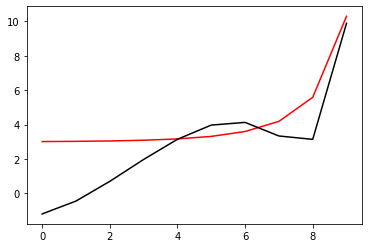

2412 46.78924267650804 -0.5963822673050018 0.9380209418592548
[-1.19340153 -0.44470699  0.70233592  1.97688163  3.14967948  3.9765968
  4.132819    3.34157202  3.13833859  9.89193507]


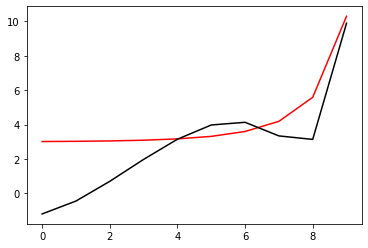

2613 49.502565818963376 -0.5961343709151631 0.9377744881563598
[-1.19623137 -0.44624496  0.70238336  1.97848135  3.15272546  3.98085637
  4.13751418  3.34428327  3.13425947  9.89188509]


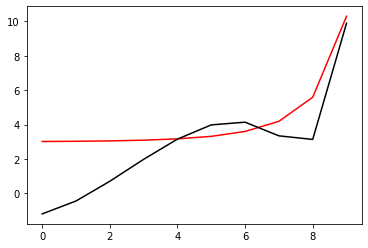

2814 53.74491951096797 -0.5959991871098631 0.937421939596714
[-1.19902412 -0.4477444   0.70247326  1.98012958  3.15582898  3.98518638
  4.14229434  3.34709605  3.13031167  9.89180768]


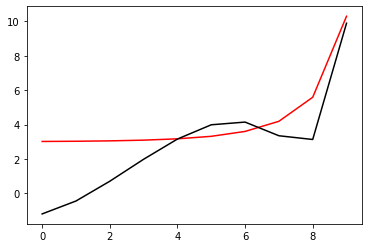

3015 53.07843785245406 -0.5959133213576829 0.9370557495160763
[-1.20185163 -0.44927646  0.70253256  1.9817475   3.15889973  3.98947806
  4.14703144  3.34987999  3.12638252  9.8917629 ]


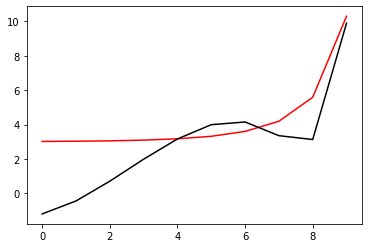

3216 45.21066712712315 -0.5958412663866689 0.936682548718455
[-1.20467634 -0.45080605  0.70259409  1.9833656   3.16196515  3.99375364
  4.15173808  3.35263461  3.12246021  9.89168322]


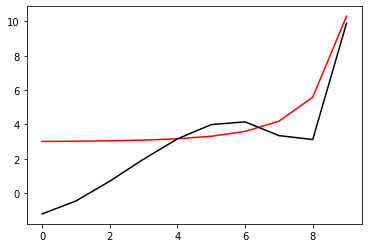

3417 54.23799038907767 -0.5956784504756026 0.9364159603545111
[-1.20753992 -0.45237413  0.70261614  1.98493942  3.16497501  3.99795365
  4.15634586  3.35529229  3.11848884  9.89163951]


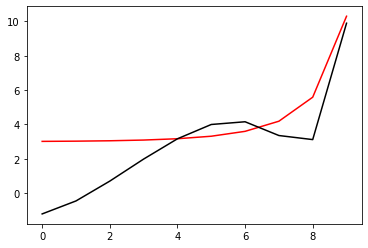

3618 50.544929948289415 -0.5955177869538384 0.936165480609043
[-1.21042619 -0.45396769  0.70260907  1.986477    3.16793522  4.0020818
  4.16085617  3.3578524   3.11446631  9.8915574 ]


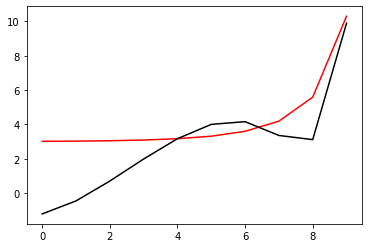

3819 52.8924061734901 -0.5953783712551988 0.9358697209514385
[-1.21326811 -0.4555128   0.70265353  1.98806637  3.17094231  4.00624254
  4.16537234  3.36039773  3.11044406  9.89151129]


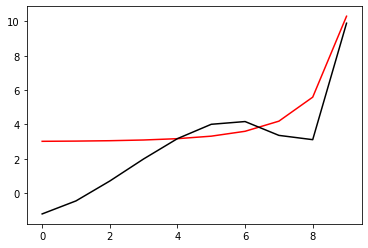

4020 52.70974076201539 -0.5952504076513967 0.935639722035795
[-1.21621587 -0.45715888  0.70260235  1.98956557  3.17386587  4.01033124
  4.16984108  3.36294476  3.10649679  9.89143279]


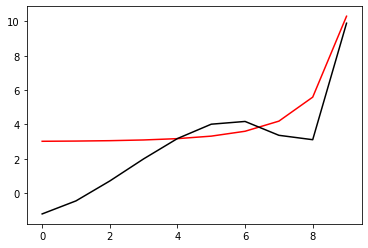

4221 60.40487857098655 -0.5950719138447347 0.9354118271559143
[-1.21909308 -0.45873231  0.70262481  1.99113636  3.17685308  4.01446455
  4.17432018  3.36547323  3.10254132  9.89138659]


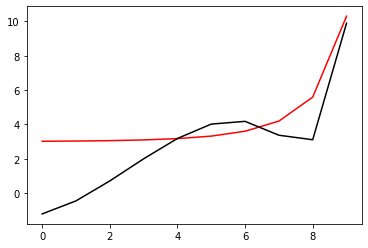

4422 46.78084628148114 -0.5948535644851176 0.9351785321662363
[-1.22190149 -0.46023446  0.70271988  1.9927781   3.17990382  4.01864307
  4.17881139  3.36798625  3.09858191  9.89130899]


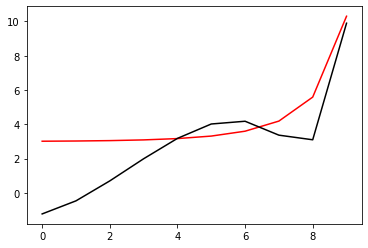

4623 49.51270133072574 -0.594614710250904 0.9349468552540181
[-1.22467684 -0.46170412  0.70284585  1.99444603  3.18297014  4.02281663
  4.18326761  3.37044935  3.09460056  9.89126044]


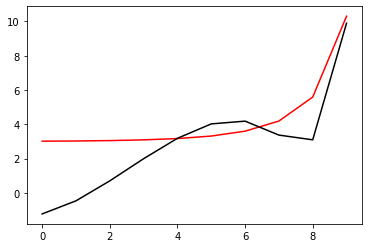

4824 53.67587102227972 -0.5945002485851253 0.934600847455336
[-1.22741038 -0.46313075  0.7030183   1.99616627  3.1860978   4.02706433
  4.18781183  3.3730172   3.09075797  9.89118488]


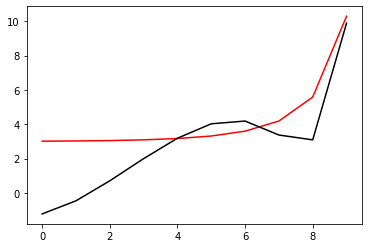

5025 53.05919862480236 -0.594422634089308 0.9342518517568027
[-1.23017764 -0.46458926  0.70316019  1.99785546  3.18919099  4.03127069
  4.1923089   3.37555291  3.08693464  9.89114162]


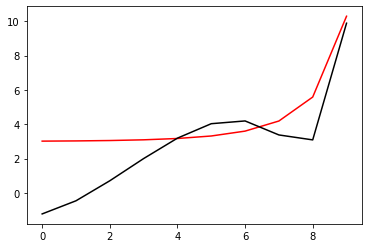

5226 45.2036121003553 -0.5943557176811869 0.933897982630403
[-1.23293979 -0.46604329  0.7033056   1.99954532  3.19227833  4.03545893
  4.19677229  3.37805677  3.08311897  9.89106369]


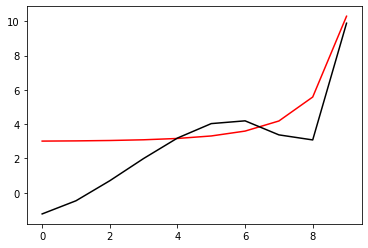

5427 54.28570947957588 -0.5942013846857109 0.9336439029915795
[-1.2357381  -0.46753348  0.70341317  2.00119183  3.19531029  4.03957104
  4.20113647  3.38046511  3.07925819  9.89102168]


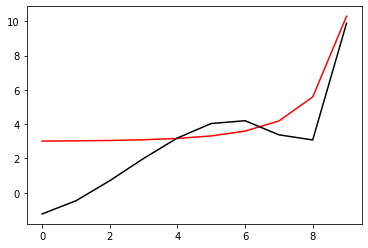

5628 50.57150472318624 -0.594053480735193 0.9334009774104987
[-1.23855739 -0.46904779  0.70349225  2.0028019   3.19829135  4.04360881
  4.20540048  3.38277463  3.07534708  9.89094134]


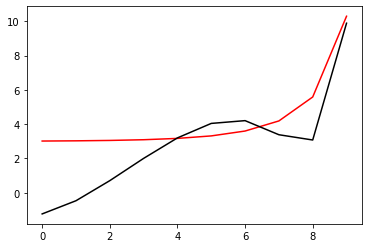

5829 52.85510867928319 -0.5939259850459333 0.9331167905547372
[-1.24133385 -0.47051565  0.70362001  2.00445987  3.20131403  4.0476721
  4.20966241  3.38506352  3.07143444  9.89089704]


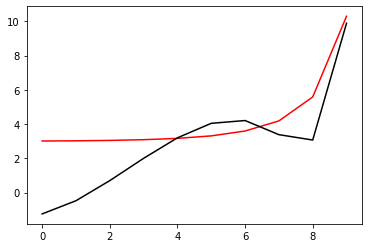

6030 52.69862235914986 -0.5938020592802387 0.9329029333244382
[-1.24421773 -0.47208647  0.70364944  2.00602427  3.20424906  4.05165864
  4.21387228  3.38735008  3.067594    9.89082005]


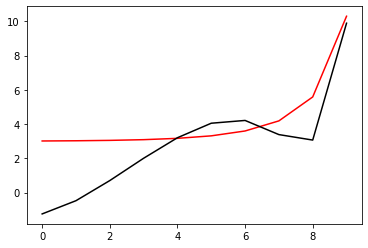

6231 60.40195267657641 -0.5936296370878261 0.9326903936482778
[-1.24703005 -0.47358368  0.70375315  2.00766051  3.20724748  4.05568882
  4.21809177  3.38961938  3.06374869  9.89077575]


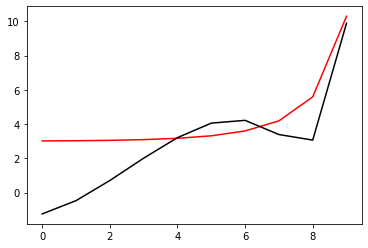

6432 46.7744969999394 -0.5934202003413251 0.9324725858321865
[-1.24977561 -0.47501215  0.70392602  2.00936308  3.21030315  4.05975572
  4.22231364  3.39186535  3.05989429  9.89069975]


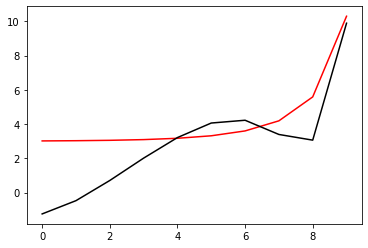

6633 49.5232506637111 -0.5931917243441756 0.9322556566431124
[-1.25248778 -0.47640811  0.70412922  2.01109057  3.21337223  4.06381451
  4.22649773  3.39406048  3.05601791  9.89065276]


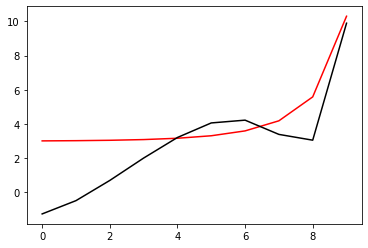

6834 53.594979897993205 -0.5930970452368529 0.9319179135612714
[-1.25515473 -0.47775782  0.70438184  2.01287314  3.21650537  4.06795011
  4.23077236  3.39636265  3.05228212  9.89057905]


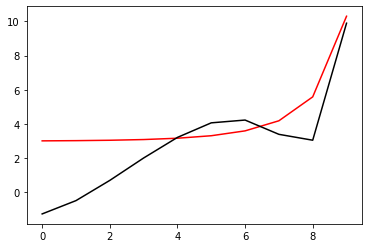

7035 53.043994357187024 -0.5930254082528349 0.9315879253087124
[-1.25785558 -0.47913996  0.70460272  2.01462271  3.2196012   4.07204057
  4.23499611  3.39862957  3.04856166  9.89053726]


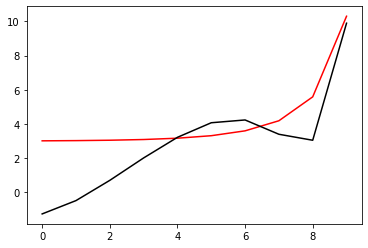

7236 45.19700071484501 -0.5929617131647417 0.9312545062467922
[-1.26055012 -0.48051689  0.70482713  2.01637218  3.22268939  4.07611012
  4.23918341  3.40086258  3.04484579  9.89046099]


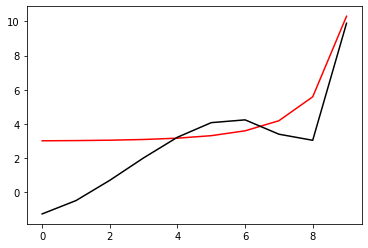

7437 54.33424342684887 -0.5928157118576299 0.9310124908512473
[-1.26327848 -0.48192832  0.7050146   2.01807841  3.22572159  4.08010263
  4.243272    3.40300193  3.04108471  9.8904205 ]


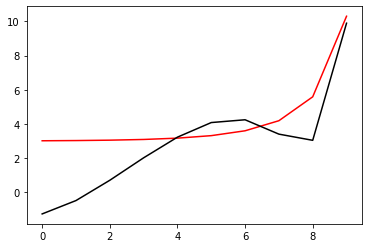

7638 50.59618825253693 -0.5926796110820819 0.9307772832824842
[-1.26602683 -0.48336353  0.70517311  2.01974687  3.22870065  4.08401807
  4.24725898  3.40504244  3.03727127  9.89034171]


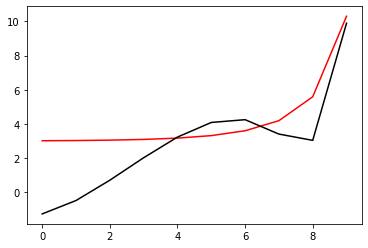

7839 52.819224558011484 -0.5925627082997625 0.9305046452820218
[-1.26873464 -0.48475553  0.70537598  2.02145773  3.23171445  4.08795088
  4.25123626  3.407057    3.03345117  9.89029895]


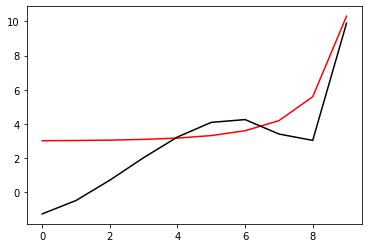

8040 52.692585682641706 -0.5924423074896359 0.9303054179394584
[-1.27155154 -0.4862531   0.70547698  2.02307062  3.23463552  4.09180178
  4.25515745  3.4090654   3.0296969   9.89022315]


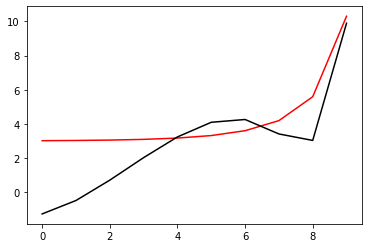

8241 60.39797219896433 -0.5922755959168612 0.9301066993618632
[-1.27429653 -0.48767733  0.70565134  2.02475385  3.23761797  4.09569421
  4.25908773  3.41105822  3.02593804  9.89018037]


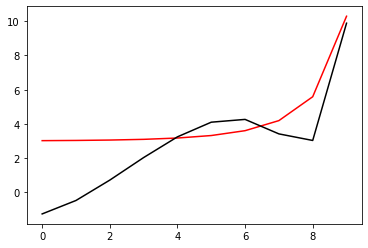

8442 46.769948406857296 -0.5920746422679817 0.9299026894913078
[-1.27697711 -0.48903629  0.7058902   2.02649743  3.24065012  4.09961438
  4.26301202  3.41302152  3.02216317  9.89010556]


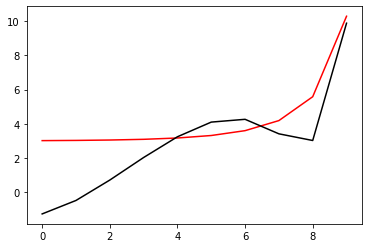

8643 49.533867762905054 -0.5918559088554458 0.9296988354662721
[-1.27962431 -0.49036375  0.70615743  2.02826308  3.24369201  4.10352263
  4.26689656  3.41493398  3.01836388  9.89005971]


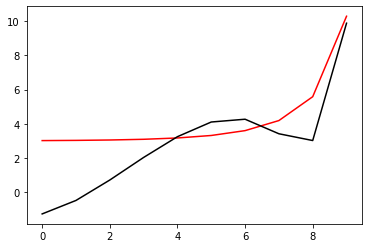

8844 53.5050824665571 -0.5917774947909289 0.929369639981682
[-1.28222344 -0.49164301  0.7064753   2.03008457  3.24679868  4.10750876
  4.27087367  3.41695542  3.01470376  9.88998735]


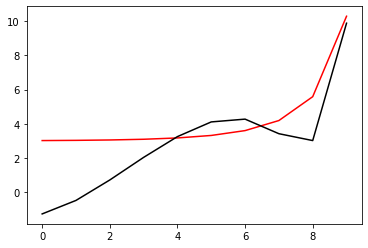

9045 53.03366247966 -0.5917083942692438 0.9290583198097835
[-1.28485713 -0.49295644  0.70675867  2.0318694   3.24986358  4.11144528
  4.27479707  3.41893955  3.01105307  9.88994652]


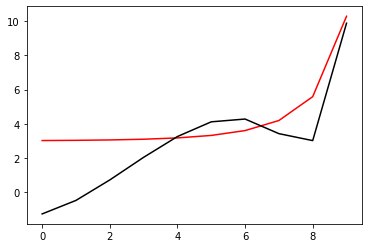

9246 45.19100235500353 -0.591645057915033 0.9287443651436605
[-1.28748357 -0.49426504  0.70704405  2.03365157  3.25291748  4.11535744
  4.27868227  3.42088897  3.00740227  9.88987136]


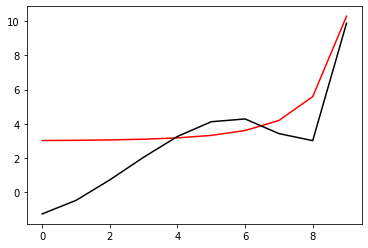

9447 54.38096980844375 -0.5915055655972081 0.9285130083527775
[-1.2901413  -0.49560708  0.7072923   2.03538934  3.25591364  4.11919143
  4.28247038  3.42274754  3.00370409  9.8898318 ]


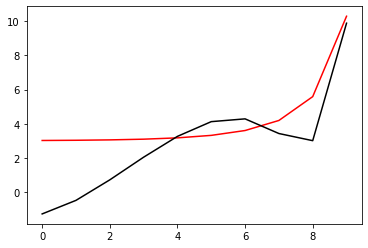

9648 50.61808703692674 -0.5913786058335967 0.9282848830278624
[-1.2928181  -0.49697345  0.7075098   2.03708656  3.2588533   4.12294568
  4.28615723  3.42450916  2.99995062  9.88975398]


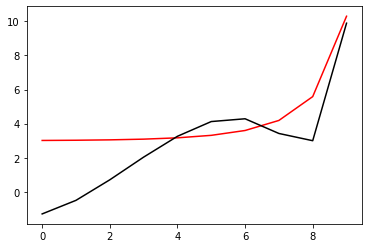

9849 52.78557047259371 -0.5912694727260183 0.9280226550355352
[-1.29545654 -0.49830058  0.70776616  2.03881934  3.26181979  4.12670926
  4.28982873  3.42624172  2.99618475  9.88971215]


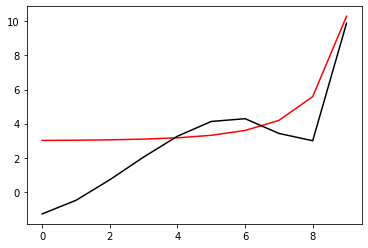

In [168]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, lam2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 60.39306231651536 -0.5910638980864015 0.9277683892919218
[-1.2998339  -0.50053958  0.70817172  2.04173455  3.26689892  4.13331891
  4.2965728   3.42954863  2.98883703  9.88958931]


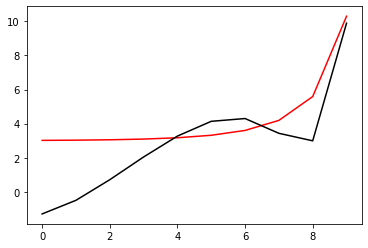

402 46.76706903500922 -0.5908739844763757 0.9275802001228982
[-1.30239333 -0.50181639  0.70844291  2.04344337  3.26979021  4.13693242
  4.30002106  3.43110416  2.9851568   9.8895203 ]


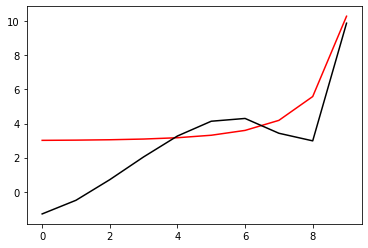

603 49.54403831061024 -0.5906666019603101 0.9273905913244311
[-1.30493129 -0.50306752  0.70874397  2.0451832   3.272709    4.14056421
  4.30347262  3.43264465  2.98144446  9.88947845]


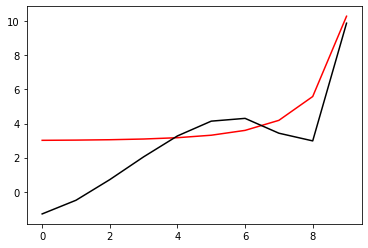

804 53.41421192245666 -0.590599079002843 0.9270760012858027
[-1.30742658 -0.50427326  0.70909646  2.04698364  3.27570245  4.14429138
  4.30704167  3.43431368  2.97786191  9.88940387]


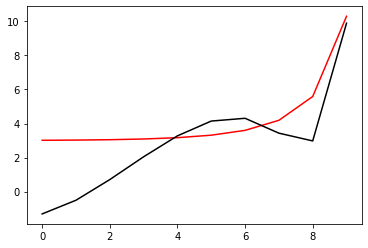

1005 53.028142613201766 -0.590529045275245 0.9267861752525921
[-1.30996185 -0.50551743  0.70941226  2.04874767  3.27865808  4.14797952
  4.31057579  3.43596139  2.97428047  9.88936356]


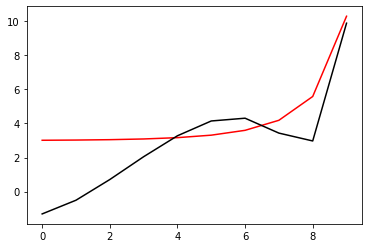

1206 45.18601772187598 -0.5904635165266404 0.9264930966070394
[-1.31249344 -0.50675984  0.70972831  2.05050901  3.2816055   4.15165159
  4.31408728  3.43758826  2.97069205  9.88929364]


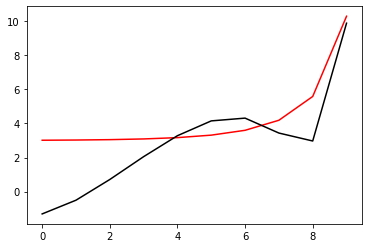

1407 54.42135479709748 -0.5903292312117425 0.9262725887815668
[-1.31505712 -0.50803656  0.71000715  2.0522272   3.28449905  4.15525486
  4.31751857  3.4391399   2.96705237  9.88925526]


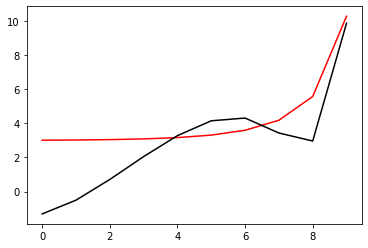

1608 50.635884475574905 -0.5902089983567504 0.9260523229405714
[-1.3176421  -0.50934003  0.71025343  2.05390415  3.28733777  4.15878525
  4.32086284  3.44060835  2.96335381  9.88917745]


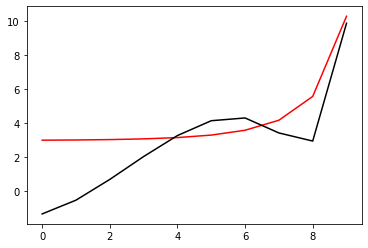

1809 52.75620906717064 -0.5901051034164639 0.9258006693197584
[-1.32019353 -0.51060973  0.71053317  2.05561184  3.29020003  4.16232561
  4.32419863  3.44205536  2.95963676  9.88913666]


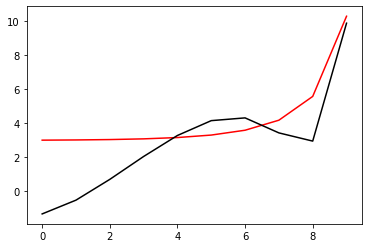

2010 52.68973753070755 -0.5899888083283454 0.9256231538028402
[-1.3228571  -0.51199066  0.71070399  2.05721418  3.29296376  4.16578361
  4.32748579  3.44350207  2.95597108  9.88906197]


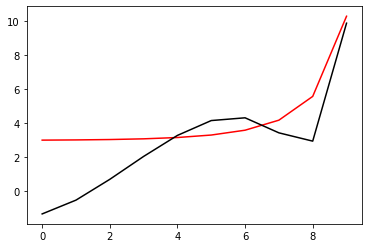

2211 60.38726925749237 -0.5898301435358321 0.9254449104145285
[-1.32545066 -0.51330213  0.71094342  2.05888222  3.29578601  4.1692856
  4.3307941   3.4449489   2.95230056  9.88902082]


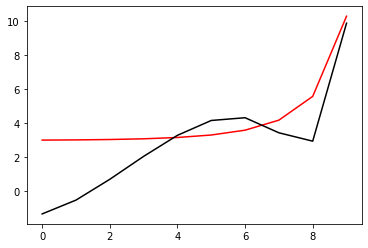

2412 46.76464959832179 -0.5896415848765614 0.9252612466858634
[-1.32798546 -0.51455686  0.71123696  2.06059911  3.29864666  4.17280749
  4.33409683  3.44637047  2.94860414  9.88894714]


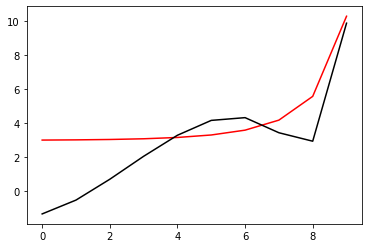

2613 49.552917098471745 -0.5894367384173335 0.9250766980217102
[-1.33048823 -0.51578407  0.71155337  2.06233215  3.30151249  4.17631807
  4.33736993  3.44775428  2.94488056  9.88890241]


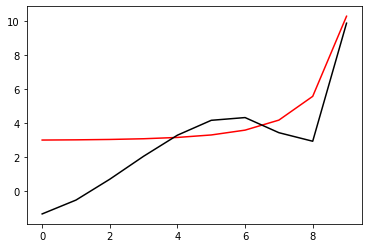

2814 53.3311897903125 -0.5893760502869287 0.924764057961801
[-1.33294033 -0.51696299  0.7119193   2.06412     3.3044441   4.17991255
  4.34074824  3.4492595   2.94129291  9.8888314 ]


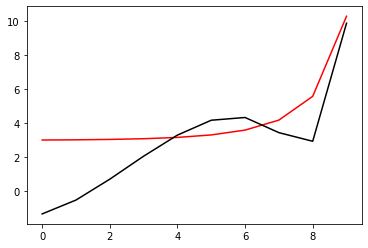

3015 53.02525678162593 -0.5893032502496541 0.9244842920805032
[-1.33542905 -0.51818082  0.71224441  2.06586448  3.30732878  4.18345761
  4.34408178  3.45073768  2.93770888  9.88879138]


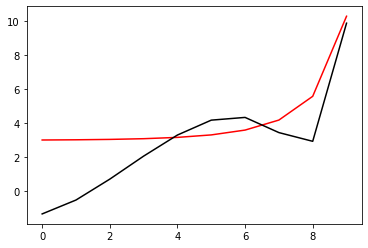

3216 45.181774445254874 -0.5892342410866005 0.9242017784742442
[-1.3379098  -0.51939611  0.71256741  2.06760156  3.310199    4.18697982
  4.34738707  3.45219284  2.93412122  9.88871741]


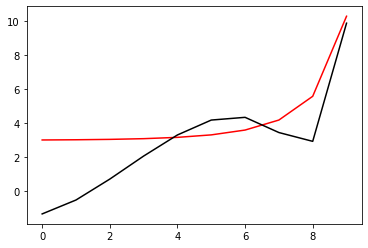

3417 54.455955357832224 -0.5891011134703594 0.9239866350628784
[-1.34041738 -0.52064359  0.71285255  2.06929291  3.31301175  4.19042983
  4.35061055  3.45357395  2.93048659  9.88867869]


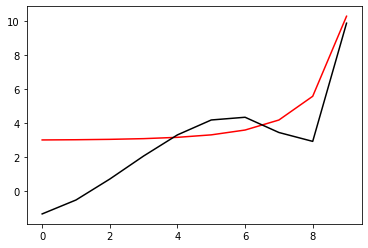

3618 50.65048742309925 -0.5889839506120386 0.9237697915916487
[-1.34294289 -0.52191732  0.71310322  2.07093953  3.31576559  4.19380369
  4.35374624  3.45487404  2.92679756  9.88860197]


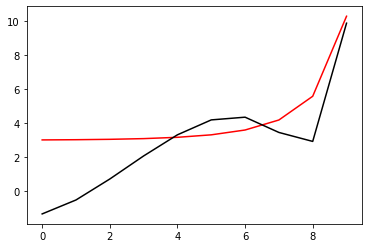

3819 52.72879918775878 -0.5888824022428952 0.9235233816774201
[-1.34543359 -0.52315881  0.71338341  2.07261131  3.31853669  4.19718188
  4.35687035  3.45615311  2.92309306  9.8885612 ]


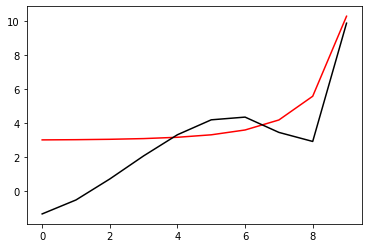

4020 52.68789731097938 -0.5887662921318043 0.9233519334093407
[-1.34803499 -0.52451259  0.71355159  2.07417351  3.32120497  4.20047484
  4.35994544  3.45743336  2.919442    9.88848663]


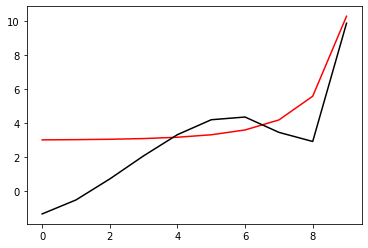

4221 60.38075879532614 -0.5886087951729991 0.923179478906329
[-1.3505637  -0.52579638  0.71378722  2.07579941  3.32392999  4.20381166
  4.36304472  3.45871972  2.91579268  9.88844594]


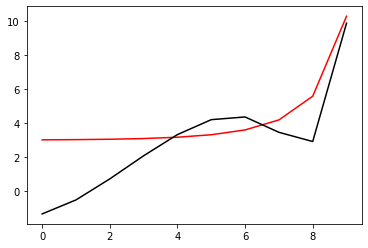

4422 46.76277418184743 -0.5884228468710909 0.9230016208824671
[-1.35303309 -0.52702511  0.71407341  2.07746947  3.32668845  4.20716453
  4.36613739  3.45998267  2.91211978  9.88837258]


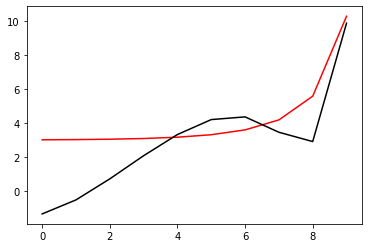

4623 49.56099713655057 -0.5882211663273205 0.9228227101931018
[-1.35546884 -0.52822666  0.71438059  2.07915305  3.32944976  4.21050554
  4.36920309  3.46121289  2.908424    9.88832826]


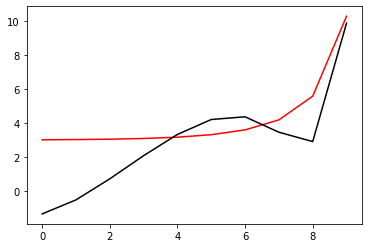

4824 53.256844987836374 -0.5881646965414103 0.9225149965458647
[-1.35785152 -0.52937927  0.71473666  2.08089038  3.33227639  4.21393183
  4.37237781  3.46256973  2.90486824  9.88825782]


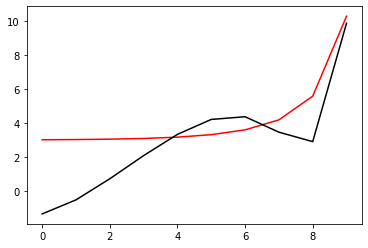

5025 53.02387195404597 -0.5880886073912327 0.9222459061573339
[-1.36027018 -0.53057172  0.71504978  2.08258176  3.33505411  4.21730877
  4.37551091  3.46390421  2.90131883  9.88821828]


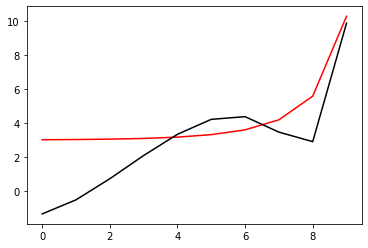

5226 45.1783253464255 -0.5880161448262844 0.921973934315662
[-1.3626794  -0.53176176  0.71535946  2.08426394  3.33781609  4.22066352
  4.37861937  3.46522076  2.89776875  9.88814496]


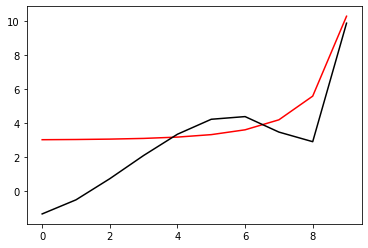

5427 54.48421962568712 -0.5878841117877205 0.9217642112851075
[-1.36511249 -0.53298258  0.71563153  2.08590024  3.34052109  4.22394864
  4.38165162  3.46646988  2.8941753   9.88810684]


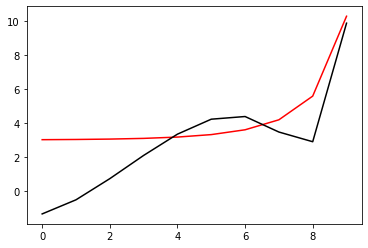

5628 50.662161173408855 -0.5877694953122373 0.9215511394126434
[-1.3675622  -0.53422967  0.71586811  2.08749053  3.34316668  4.22715945
  4.38460126  3.46764453  2.89053108  9.88803085]


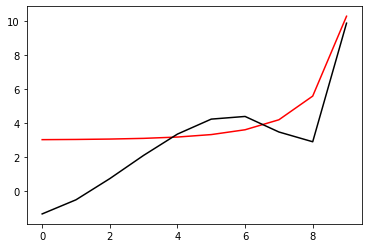

5829 52.70429098514189 -0.587669830622259 0.921309911826503
[-1.36997739 -0.53544627  0.71613137  2.08910274  3.34582679  4.23037374
  4.38754157  3.46880232  2.88687368  9.88799085]


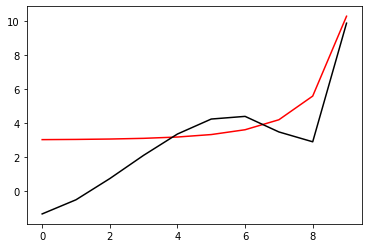

6030 52.684339202856975 -0.5875544429354659 0.9211436128782289
[-1.37250291 -0.53677605  0.71628082  2.09060337  3.34838297  4.23350392
  4.3904367   3.46996561  2.88327088  9.88791695]


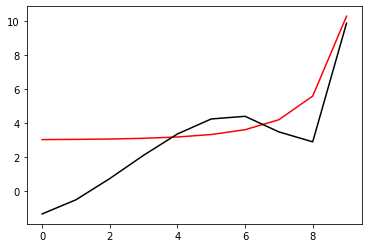

6231 60.373885645925895 -0.5873983932543033 0.9209761321145002
[-1.37495477 -0.53803582  0.7164971   2.09216717  3.35099639  4.23668085
  4.39336216  3.47114281  2.8796751   9.8878772 ]


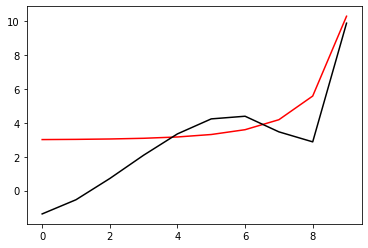

6432 46.76119641563076 -0.5872149745750568 0.9208032810064742
[-1.37734792 -0.53924228  0.71676132  2.09377221  3.35364088  4.23987323
  4.39628325  3.47230046  2.87605736  9.88780466]


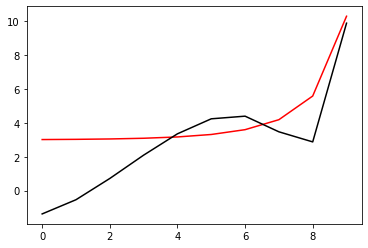

6633 49.56819388740408 -0.5870161415131451 0.9206292743490043
[-1.37970703 -0.54042207  0.71704537  2.09538958  3.35628789  4.24305556
  4.39918212  3.47343132  2.87241985  9.88776125]


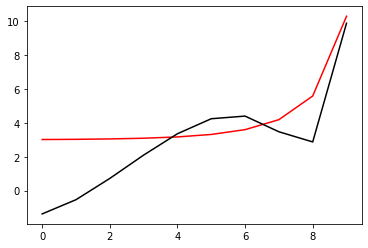

6834 53.19317680894364 -0.586962454646381 0.9203265654092346
[-1.38201221 -0.54155286  0.71737783  2.09706036  3.35900085  4.24632575
  4.40219472  3.47469399  2.86892477  9.88769181]


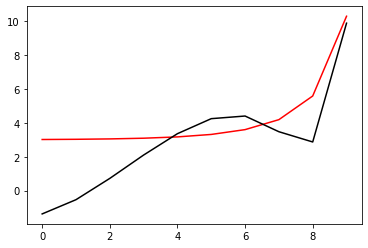

7035 53.02292406445862 -0.5868833901042909 0.9200667466430716
[-1.38435329 -0.54272411  0.71766624  2.09868417  3.36166487  4.24954872
  4.40517043  3.47593959  2.86543808  9.88765319]


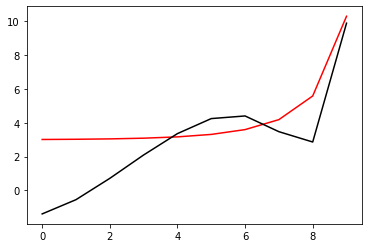

7236 45.17554351015788 -0.5868080652012567 0.9198037366199494
[-1.38668443 -0.54389319  0.71795041  2.10029802  3.36431324  4.25275152
  4.40812598  3.47717241  2.86195283  9.88758096]


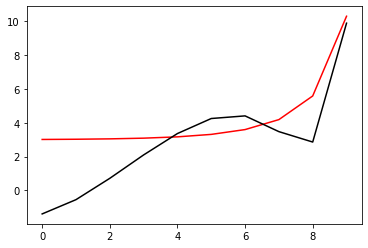

7437 54.50707455198335 -0.5866769990451864 0.9195987229545306
[-1.3890375  -0.54509185  0.71819765  2.10186668  3.36690615  4.25588817
  4.41101114  3.4783439   2.85842673  9.88754384]


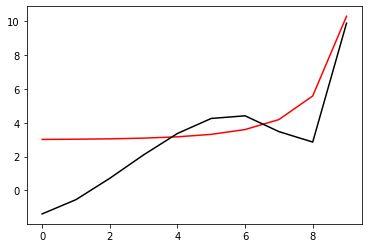

7638 50.671540280841114 -0.5865645676929211 0.9193889971588454
[-1.39140661 -0.54631682  0.71840891  2.10338895  3.36944019  4.25895309
  4.41381886  3.47944668  2.85485244  9.88746898]


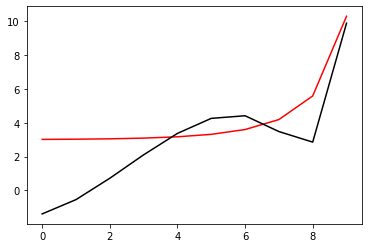

7839 52.68233914949373 -0.5864665569264579 0.9191521582950224
[-1.3937419  -0.54751269  0.71864489  2.10493111  3.37198736  4.2620218
  4.4166199   3.48053635  2.85126646  9.88743014]


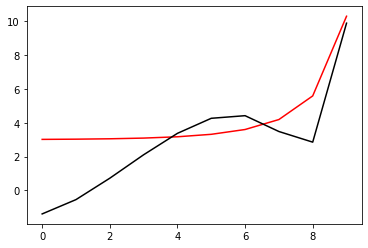

8040 52.678981613294866 -0.5863522023549105 0.9189901375305478
[-1.39618764 -0.54882249  0.71876586  2.10636058  3.37443039  4.26500803
  4.41937936  3.48163514  2.84773565  9.8873573 ]


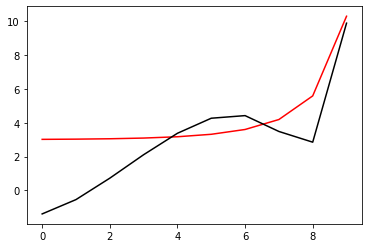

8241 60.3668421704243 -0.5861975965439556 0.9188268246710766
[-1.39855921 -0.55006213  0.71895356  2.10785339  3.37693186  4.2680442
  4.42217477  3.48275439  2.84421598  9.88731881]


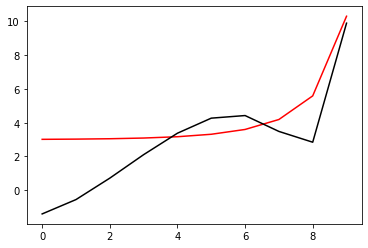

8442 46.75982421017409 -0.5860164098654722 0.9186581731260358
[-1.40087297 -0.55124989  0.7191873   2.10938549  3.37946298  4.27109579
  4.42496779  3.48385703  2.84067519  9.88724745]


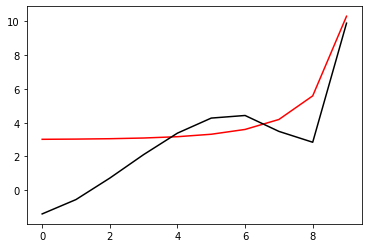

8643 49.574660091606546 -0.5858199871099752 0.9184883121162233
[-1.40315267 -0.55241138  0.71944015  2.1109293   3.38199678  4.27413913
  4.42774243  3.48493736  2.83711665  9.88720528]


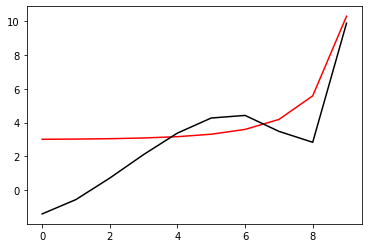

8844 53.139089783361285 -0.5857683450403484 0.9181900683958282
[-1.40537822 -0.55352397  0.71974104  2.11252634  3.38459718  4.27727245
  4.43063431  3.48615314  2.83370189  9.88713715]


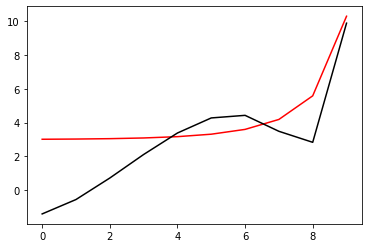

9045 53.02193675356575 -0.5856868094645283 0.9179380204254194
[-1.40763965 -0.55467726  0.71999742  2.11407616  3.38714919  4.28036066
  4.43349314  3.48735583  2.83029683  9.88709976]


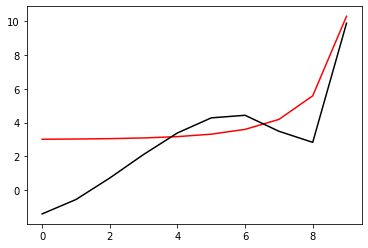

9246 45.17327746658422 -0.5856092557405557 0.9176824489801204
[-1.40989102 -0.55582857  0.72024908  2.11561563  3.38968585  4.28343044
  4.43633522  3.48854945  2.82689454  9.88702889]


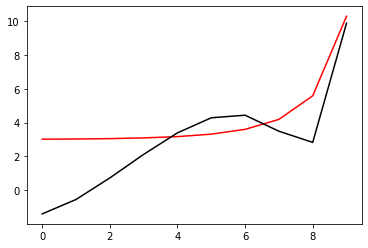

9447 54.52577399453527 -0.5854790918657781 0.9174814464672961
[-1.41216287 -0.55700833  0.72046463  2.11711082  3.39216861  4.28643699
  4.4391113   3.48968609  2.82345299  9.88699305]


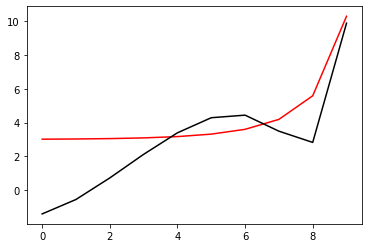

9648 50.679247604761 -0.5853686380650976 0.9172745904251153
[-1.41445053 -0.55821438  0.72064399  2.11855956  3.39459317  4.28937393
  4.44181374  3.49075809  2.81996489  9.88691957]


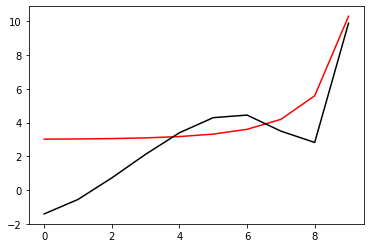

9849 52.66254638896739 -0.5852721850227266 0.9170414052702082
[-1.41670506 -0.55939237  0.7208467   2.12002678  3.39702996  4.29231491
  4.44451132  3.49181945  2.81646593  9.88688213]


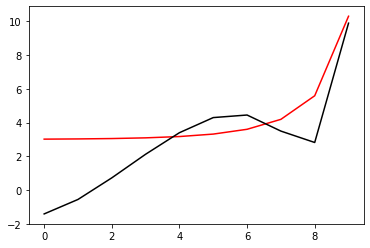

In [169]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, lam2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 60.35978892173451 -0.5850952600395071 0.9168677741276549
[-1.42030089 -0.56126494  0.72125707  2.12255117  3.40119904  4.29739872
  4.44929612  3.49366933  2.81023398  9.88677619]


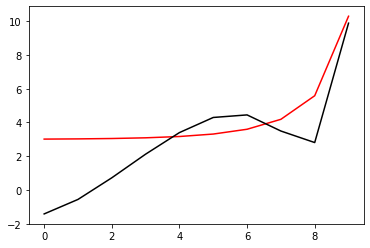

402 46.7588842001133 -0.5849131485963653 0.9167001566937395
[-1.42253496 -0.56244669  0.72142852  2.12395732  3.40353657  4.3001923
  4.45180732  3.49454966  2.80660967  9.88671039]


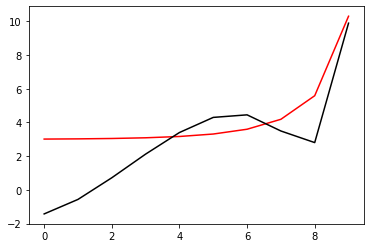

603 49.580489503324074 -0.5847170605081273 0.9165316197353162
[-1.42473157 -0.56359435  0.72163347  2.12539936  3.40591626  4.30303928
  4.4543835   3.49549803  2.80304819  9.88667128]


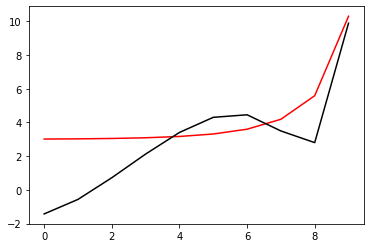

804 53.09415079756962 -0.5846656743279234 0.9162367694832121
[-1.42687451 -0.56469141  0.72189156  2.126905    3.4083815   4.30600777
  4.45712118  3.49663092  2.79967422  9.88660784]


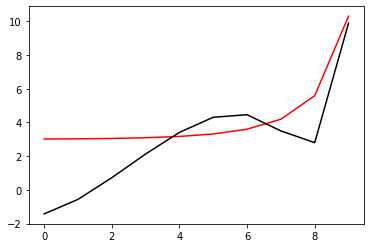

1005 53.02077187687044 -0.5845816827455232 0.9159908818726478
[-1.42905339 -0.56582784  0.72210848  2.12836992  3.41081013  4.30895091
  4.45985356  3.49778089  2.79633508  9.88656259]


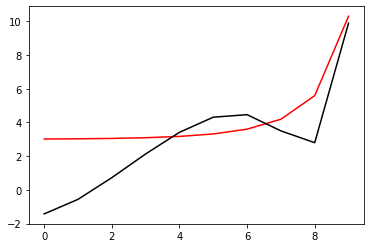

1206 45.17151886679223 -0.5845022728720759 0.9157414420506449
[-1.43122283 -0.56696196  0.72232227  2.12982805  3.41323026  4.31188753
  4.46258625  3.49894028  2.79301301  9.88649577]


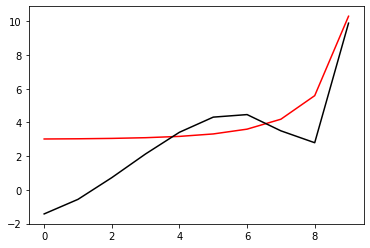

1407 54.540731644750664 -0.5843730532383129 0.9155438687292938
[-1.43341227 -0.56812336  0.72250193  2.13124516  3.41560191  4.31476972
  4.46526512  3.50005523  2.78966008  9.88645985]


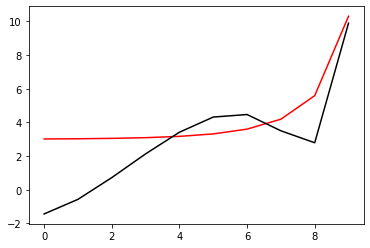

1608 50.68552160470893 -0.5842644816902078 0.915339602160255
[-1.43561803 -0.569311    0.72264605  2.13261735  3.41791848  4.31758795
  4.46787856  3.50111396  2.78626546  9.88639019]


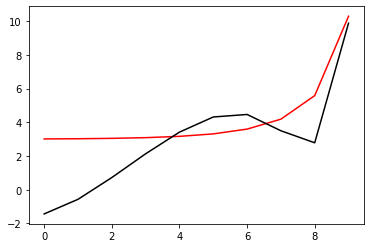

1809 52.6453718576165 -0.584169597910919 0.9151096592747052
[-1.43779197 -0.57047151  0.72281291  2.13400795  3.42024821  4.32041283
  4.47049161  3.50216691  2.78286211  9.88635263]


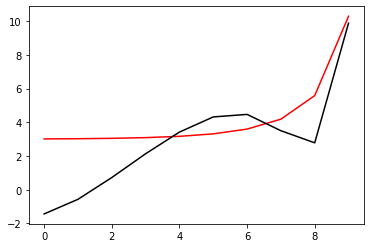

2010 52.66465259808129 -0.5840578864846048 0.9149545257524032
[-1.44007763 -0.57174717  0.7228635   2.13528516  3.42247464  4.3231589
  4.47306934  3.50323481  2.77951458  9.88628274]


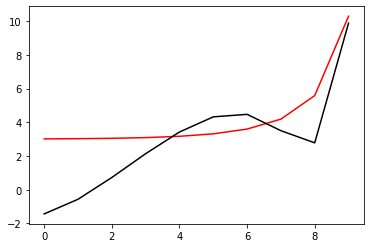

2211 60.35295622196868 -0.5839061338847427 0.9147979831310891
[-1.44228907 -0.57295223  0.72298154  2.13662725  3.42476284  4.32596113
  4.47569232  3.50433324  2.77618404  9.88624749]


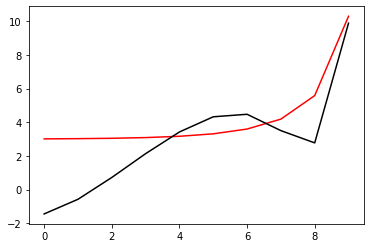

2412 46.7576736405446 -0.5837288049973541 0.9146361410384348
[-1.44444491 -0.57410764  0.72314318  2.13800633  3.42707921  4.32877903
  4.47831548  3.50541839  2.77283227  9.88617906]


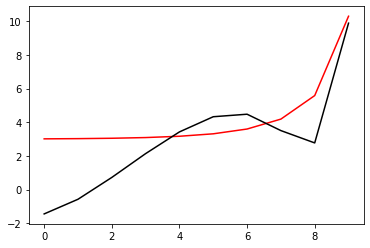

2613 49.58582492057021 -0.5835363487945878 0.9144730450407014
[-1.44656742 -0.57523734  0.7233233   2.13939684  3.42939906  4.33159151
  4.4809253   3.50648662  2.76946432  9.88613987]


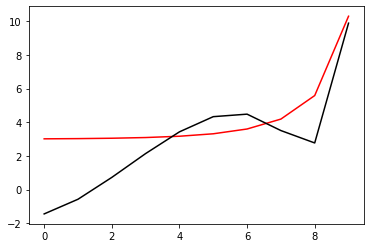

2814 53.05454650367172 -0.583487658668346 0.9141824123709439
[-1.44863651 -0.5763187   0.7235509   2.14084042  3.43178643  4.33449657
  4.48365638  3.5076941   2.76624054  9.88607481]


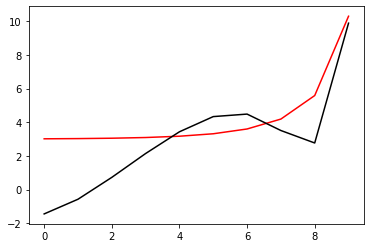

KeyboardInterrupt: 

In [170]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, lam2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, lam2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, lam2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, m2_2, lam2, Positive[i%10], Negative[i%10]).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
for i in range (10):
    [Positive0[i], Positive1[i]]=NN_func_01(h, m2_2, lam2, Positive[i])
    [Negative0[i], Negative1[i]]=NN_func_01(h, m2_2, lam2, Negative[i])
for i in range (10):
    x_data1[i]=[v[0] for v in Positive0[i]]
    y_data1[i]=[v[1] for v in Positive0[i]]
    x_data2[i]=[v[0] for v in Positive1[i]]
    y_data2[i]=[v[1] for v in Positive1[i]]
    x_data3[i]=[v[0] for v in Negative0[i]]
    y_data3[i]=[v[1] for v in Negative0[i]]
    x_data4[i]=[v[0] for v in Negative1[i]]
    y_data4[i]=[v[1] for v in Negative1[i]]
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'co')
    plt.plot(x_data1[i], y_data1[i], 'ro')
    plt.plot(x_data3[i], y_data3[i], 'mo')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.show()